## Summer 2020
### Irem Nesli Erez

#### Setting the environment:

In [1]:
import os 
import numpy as np
import math
import scipy.special
import scipy.stats
import scipy.constants

import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits

path = '/global/homes/i/ineslie/myhack/'
os.chdir(path)

#### Reading the DR14 eBOSS Stripe 82 Data:

In [2]:
fname=path+'/Catalogs/DR14Q_S82.fits'
c=fits.open(fname)
c

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2aaad81f5510>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad822d910>]

In [3]:
h=c[0] 
h.header

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                 7055 / Number of characters                           
EXTEND  =                    T / There are standard extensions                  
VOTMETA =                    T / Table metadata in VOTable format               
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
COMMENT good table, but the 

In [4]:
h.data
print(h.data)

[ 60  63 120 ...  69  62  10]


In [5]:
h=c[1] 
#h.header

In [6]:
hdata=Table(h.data)

In [7]:
RA=h.data['RA']
DEC=h.data['DEC']

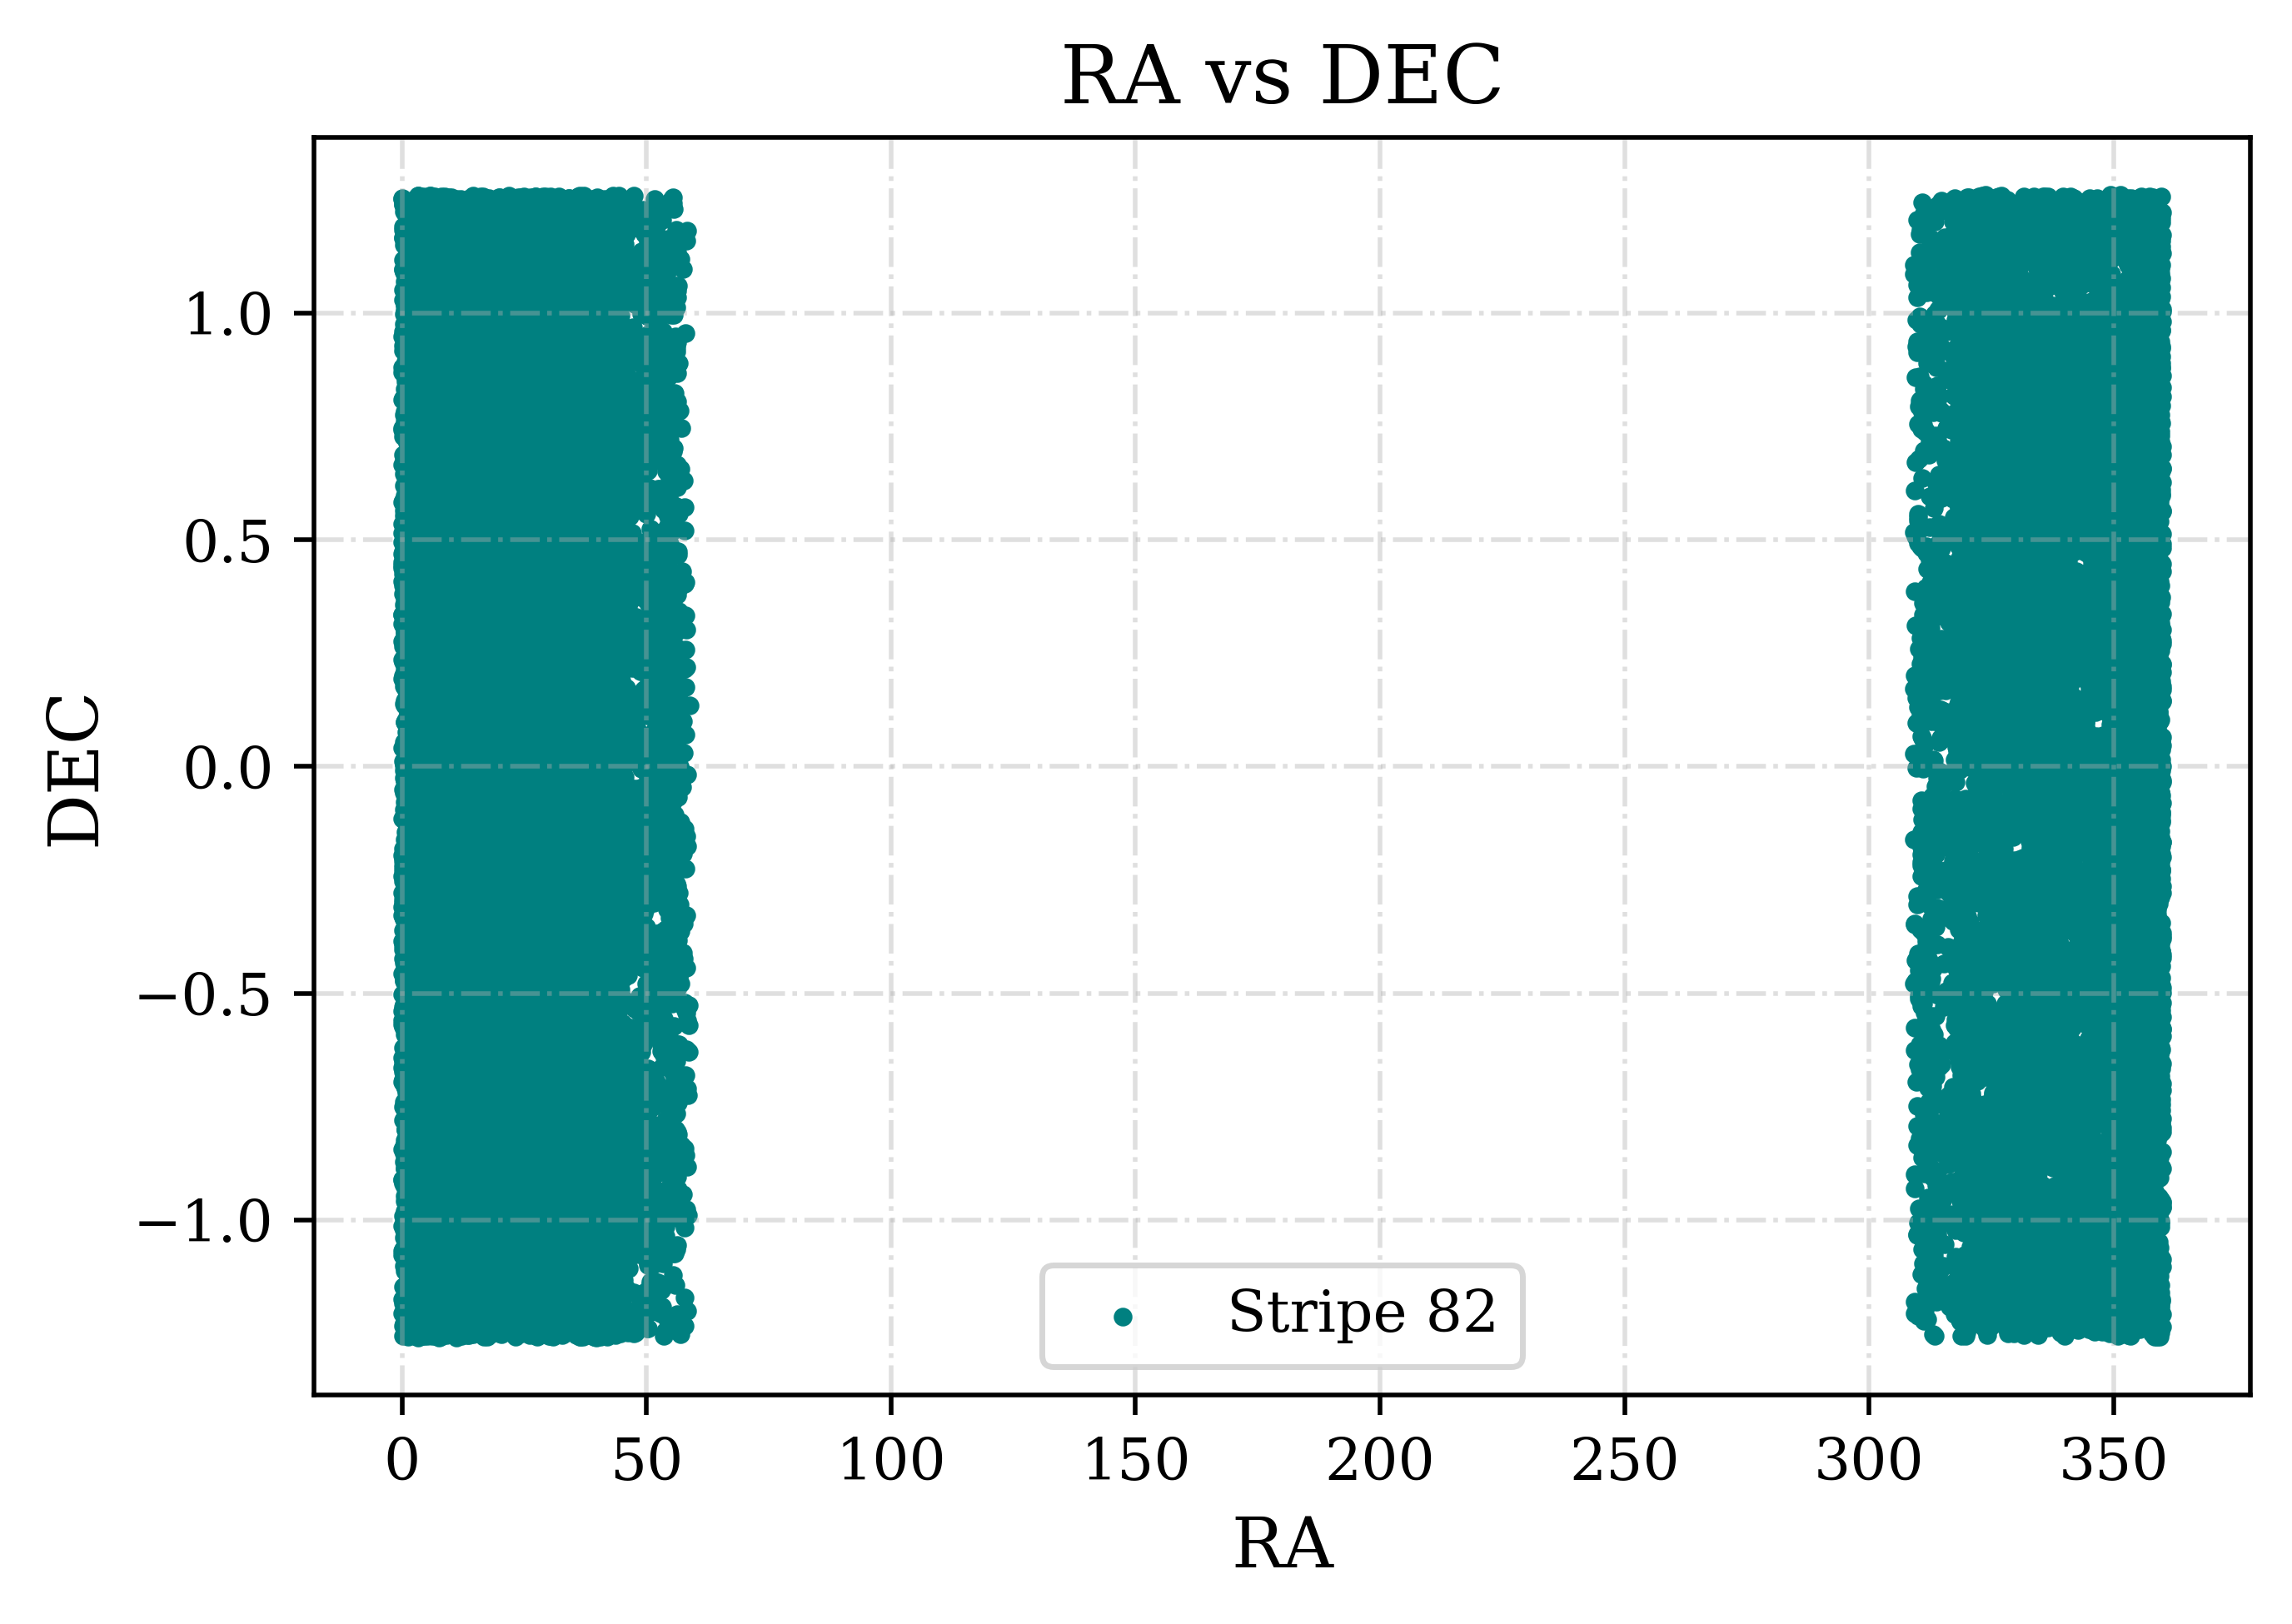

In [8]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(RA,DEC, color='teal', s=5, label='Stripe 82')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

In [9]:
for i in range(len(hdata)):
    if RA[i]>=180:
        hdata['RA'][i]=RA[i]-360
        RA[i]=RA[i]-360

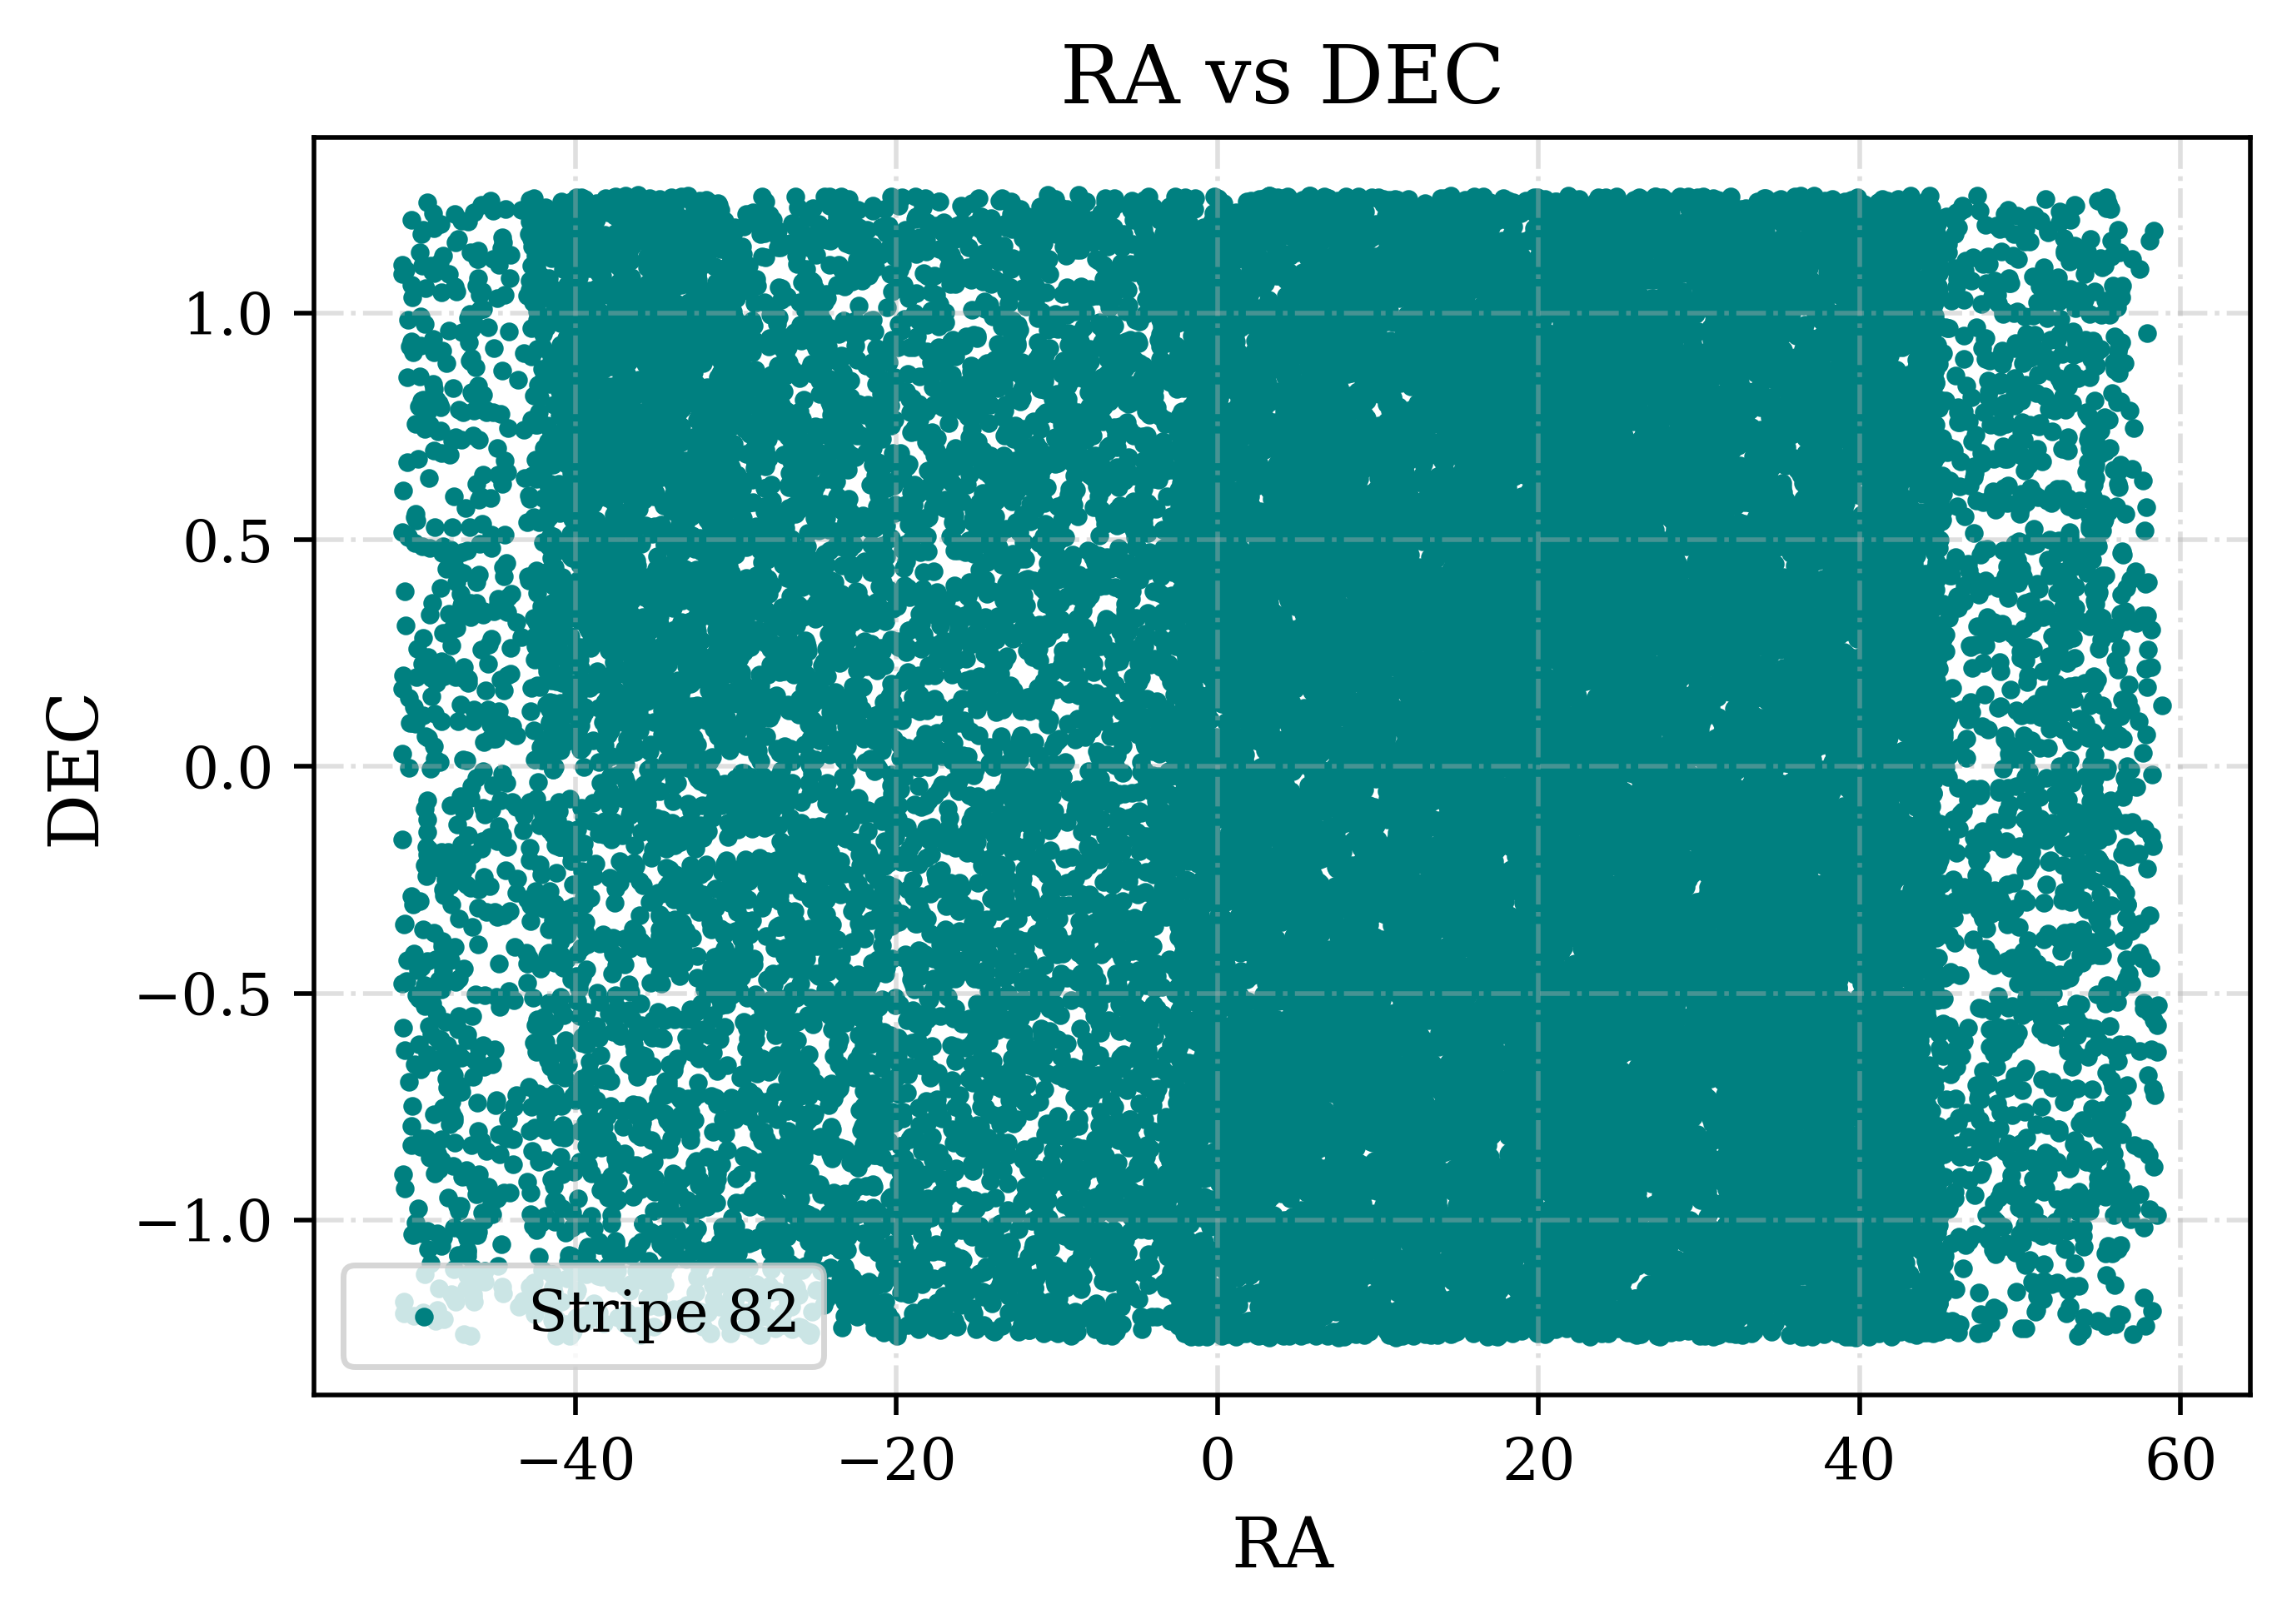

In [10]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(RA,DEC, color='teal', s=5, label='Stripe 82')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

In [11]:
Z=h.data['Z']

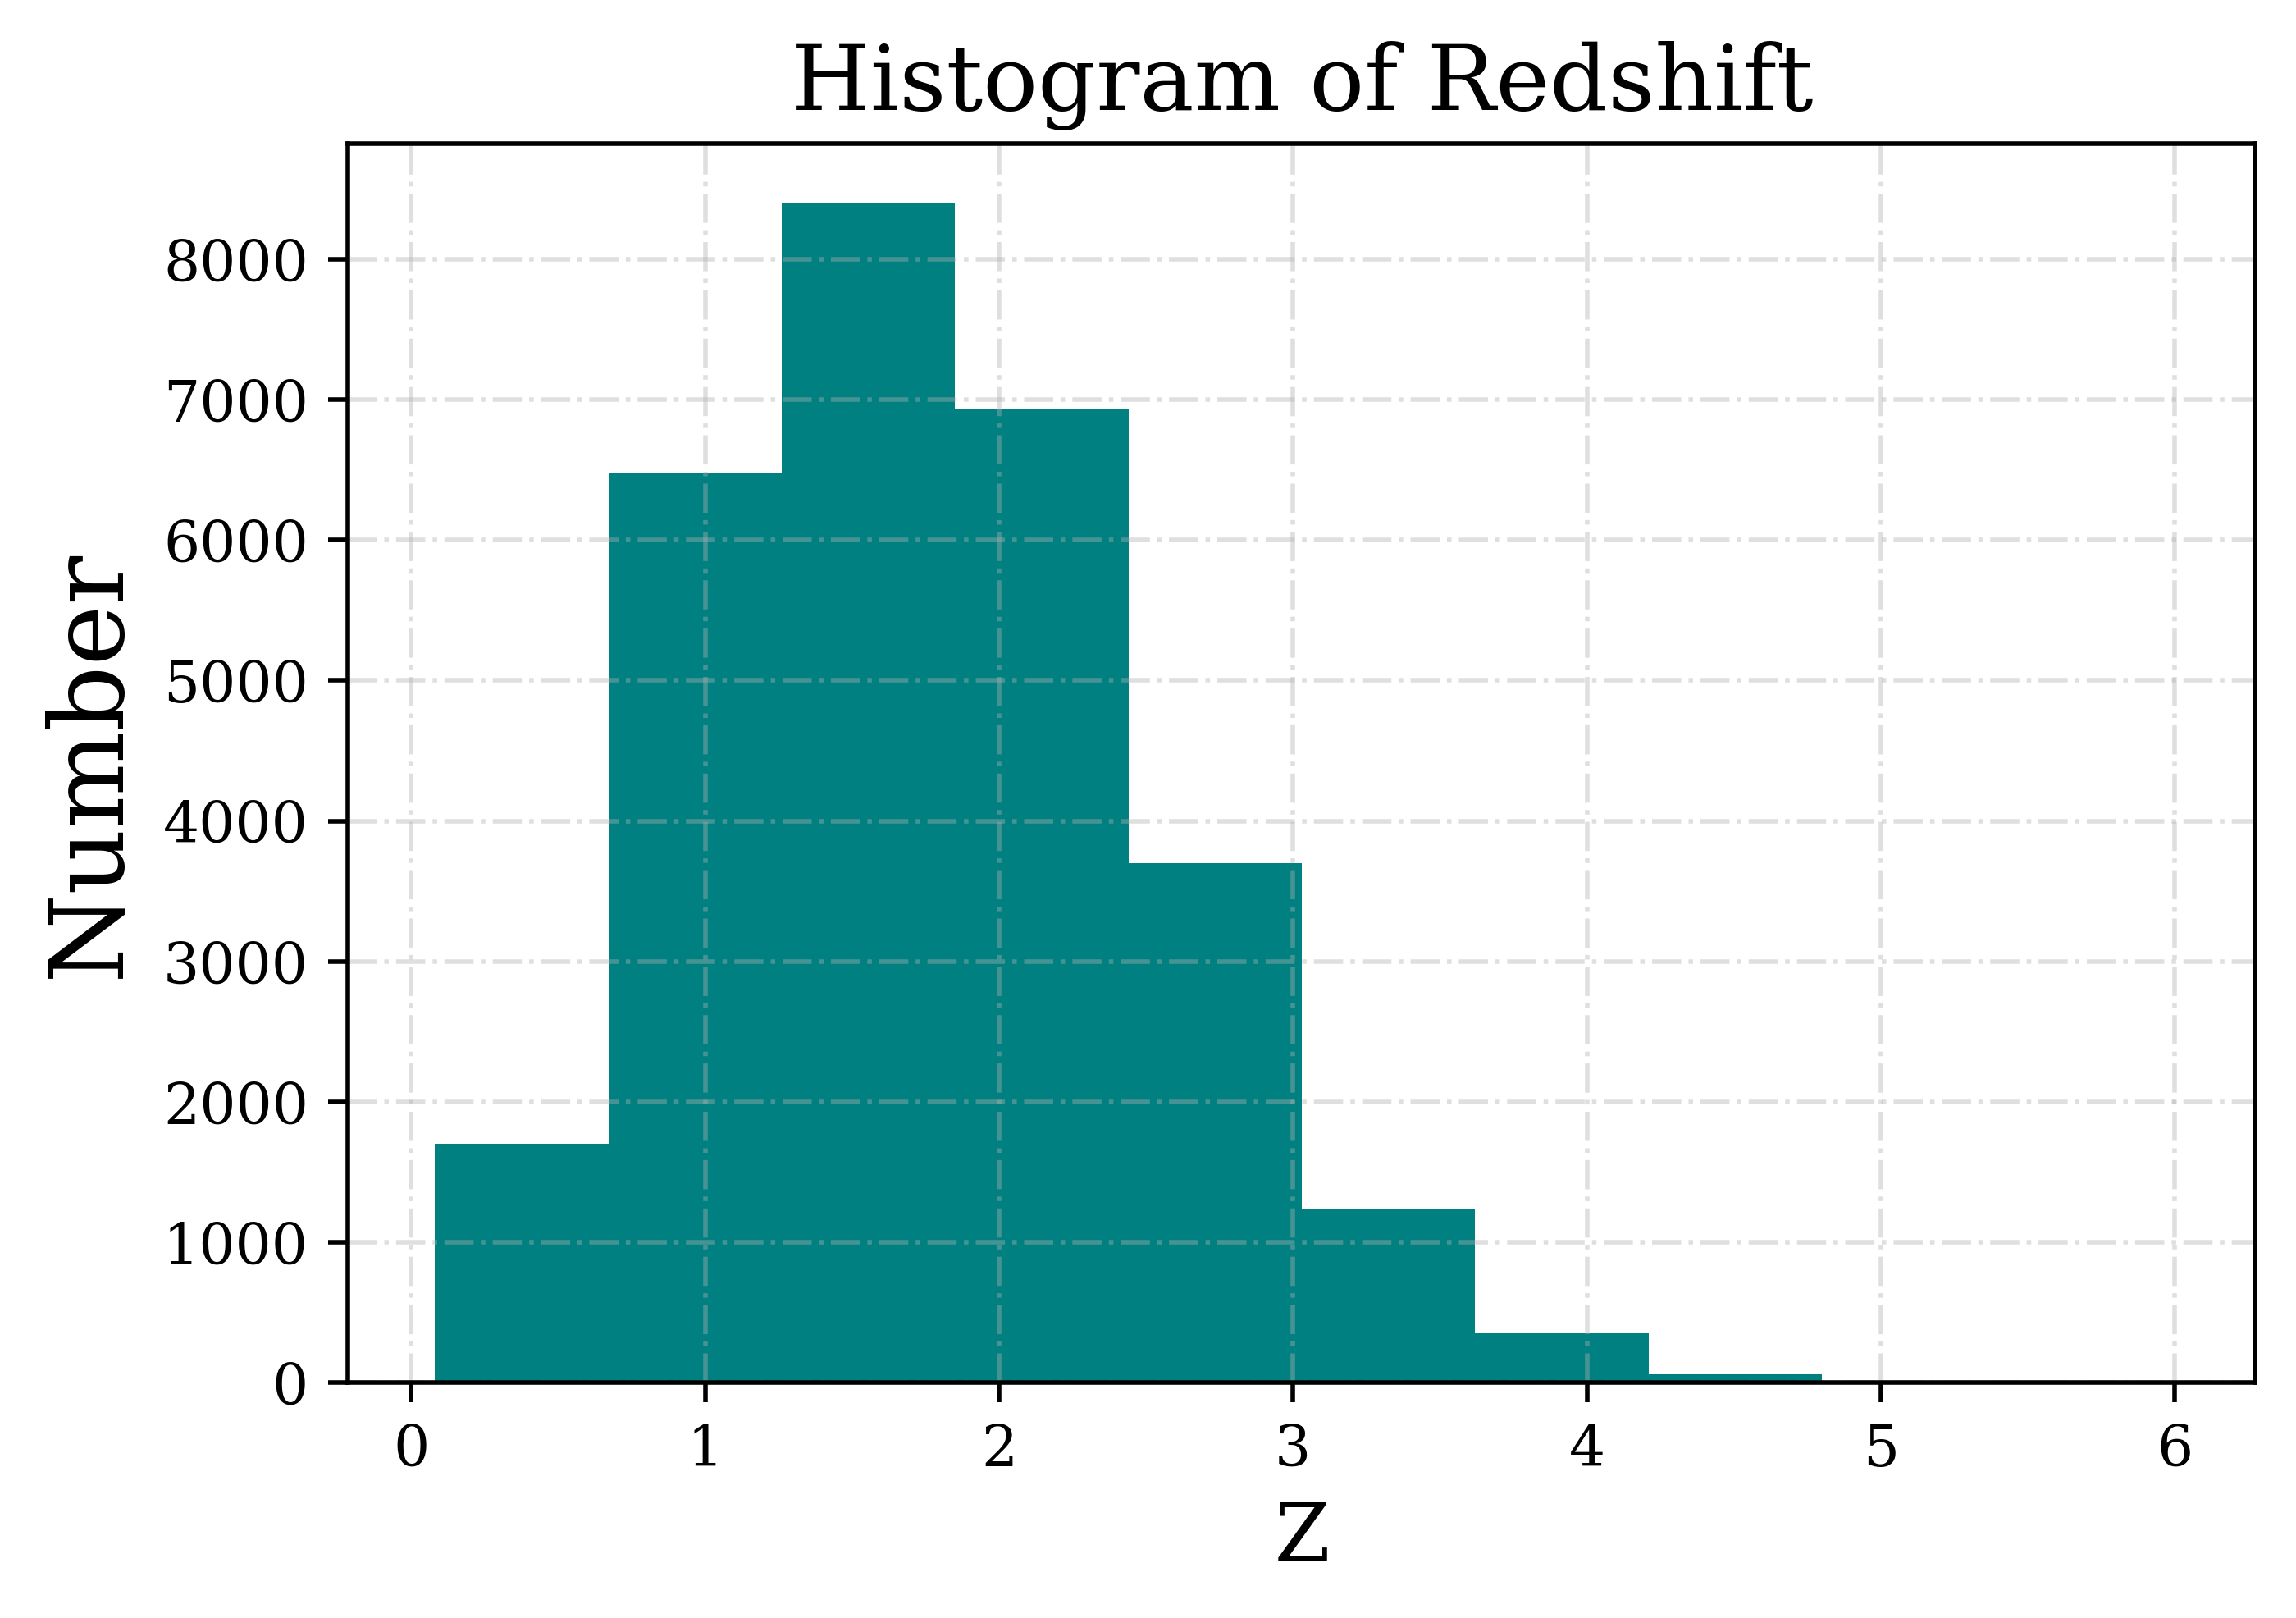

In [12]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(Z, color='teal')

plt.show()

In [13]:
#hdata

<Table length=28874>
    SDSS_NAME                RA          ... FIRST_SNR SDSS2FIRST_SEP
      str18               float64        ...  float64     float64    
------------------ --------------------- ... --------- --------------
000001.55-003332.6  0.006463516241467461 ...      -1.0           -1.0
000001.64+003459.4  0.006855391014397583 ...      -1.0           -1.0
000001.93-001427.4  0.008066690579690672 ...      -1.0           -1.0
000003.17+011510.6  0.013228995209772164 ...      -1.0           -1.0
000003.27+001132.8  0.013630253212241428 ...      -1.0           -1.0
000004.78-005434.6   0.01994309883036749 ...      -1.0           -1.0
00004.967-001642.0  0.020695853049522484 ...      -1.0           -1.0
000005.02-003829.0  0.020928563291278124 ...      -1.0           -1.0
000005.41+002638.0  0.022563266250813285 ...      -1.0           -1.0
000006.15-003009.6   0.02563828062710627 ...      -1.0           -1.0
               ...                   ... ...       ...            ...
235956.96+000245.7 -0.012646460103326262 ...      -1.0           -1.0
235957.06-002243.7 -0.012245357742131091 ...      -1.0           -1.0
235957.42+010033.7 -0.010749438523475874 ...      -1.0           -1.0
235957.55+003919.8 -0.010183649378802784 ...      -1.0           -1.0
235958.21+005139.8      -0.0074462890625 ...      -1.0           -1.0
235958.62+002551.4 -0.005726834141853487 ...      -1.0           -1.0
235958.66-011225.3     -0.00555419921875 ...      -1.0           -1.0
235958.72+003345.3     -0.00531005859375 ...      -1.0           -1.0
235959.44+000841.5      -0.0023193359375 ...      -1.0           -1.0
235959.64-003921.1 -0.001480043843855583 ...      -1.0           -1.0

In [14]:
path_spectra='/global/project/projectdirs/cosmo/data/sdss/dr14/eboss/spectro/redux/v5_10_0/spectra/'

In [15]:
SNR_S82 = list()
SNR_S82_LyA=list()

for i in range(len(hdata)):
    if hdata['PLATE'][i]>3000:
        fname=path_spectra+str(hdata['PLATE'][i])+'/spec-'+str(hdata['PLATE'][i])+'-'+str(hdata['MJD'][i])+'-'+str(hdata['FIBERID'][i]).zfill(4)+'.fits'
        fits_read=fits.open(fname)
        SNR_S82.append(np.mean(fits_read[1].data['flux']*fits_read[1].data['ivar']))
        #just taking the LyA SNR 
    else:
        SNR_S82.append(-9999)

In [16]:
for i in range(len(hdata)):
    if hdata['PLATE'][i]>3000:
        fname=path_spectra+str(hdata['PLATE'][i])+'/spec-'+str(hdata['PLATE'][i])+'-'+str(hdata['MJD'][i])+'-'+str(hdata['FIBERID'][i]).zfill(4)+'.fits'
        fits_read=fits.open(fname)
        spectra_read=Table(fits_read[1].data)
        in_LyA=Table.Column(-1*np.ones(len(fits_read[1].data['loglam'])), name='in_LyA')
        spectra_read.add_column(in_LyA)
        SNR_S82.append(np.mean(fits_read[1].data['flux']*fits_read[1].data['ivar']))
        #SNR for just the LyA forest
        for j in range(len(fits_read[1].data['loglam'])):
            lambda_obs=10**(fits_read[1].data['loglam'][j])
            lambda_ref=lambda_obs/(hdata['Z'][i]+1)
            if lambda_ref>1040 and lambda_ref<1200:
                spectra_read['in_LyA'][j]=1  # rest frame chenge the name
            else:
                spectra_read['in_LyA'][j]=0
        #np.where(lambda_ref>1040 and lambda_ref<1200, )
        SNR_S82_LyA.append(np.sum(fits_read[1].data['flux']*fits_read[1].data['ivar']*spectra_read['in_LyA'])/np.sum(spectra_read['in_LyA']))
    else:
        SNR_S82.append(-9999)
        SNR_S82_LyA.append(-9999)

In [46]:
len(SNR_S82_LyA)
#spectra_read['in_LyA']

28874

In [18]:
len(hdata)

28874

In [19]:
len(SNR_S82)

28874

In [20]:
snr=Table.Column(SNR_S82, name='SNR')
hdata.add_column(snr)

In [21]:
mask = (hdata['SNR']==-9999 )
h_mask = hdata[mask]
len(h_mask)  #DOESNT HAVE SPECTRA FOR

7154

In [47]:
snr_lya=Table.Column(SNR_S82_LyA, name='SNR_LYA')
hdata.add_column(snr_lya)

In [48]:
mask = (hdata['SNR_LYA']==-9999 )
h_mask = hdata[mask]
len(h_mask)  #DOESNT HAVE SPECTRA FOR

7154

In [22]:
len(hdata)

28874

#### Cut 1: SNR>1

In [23]:
mask = (hdata['SNR']>1 )
h_masked = hdata[mask]

In [24]:
len(h_masked)

21633

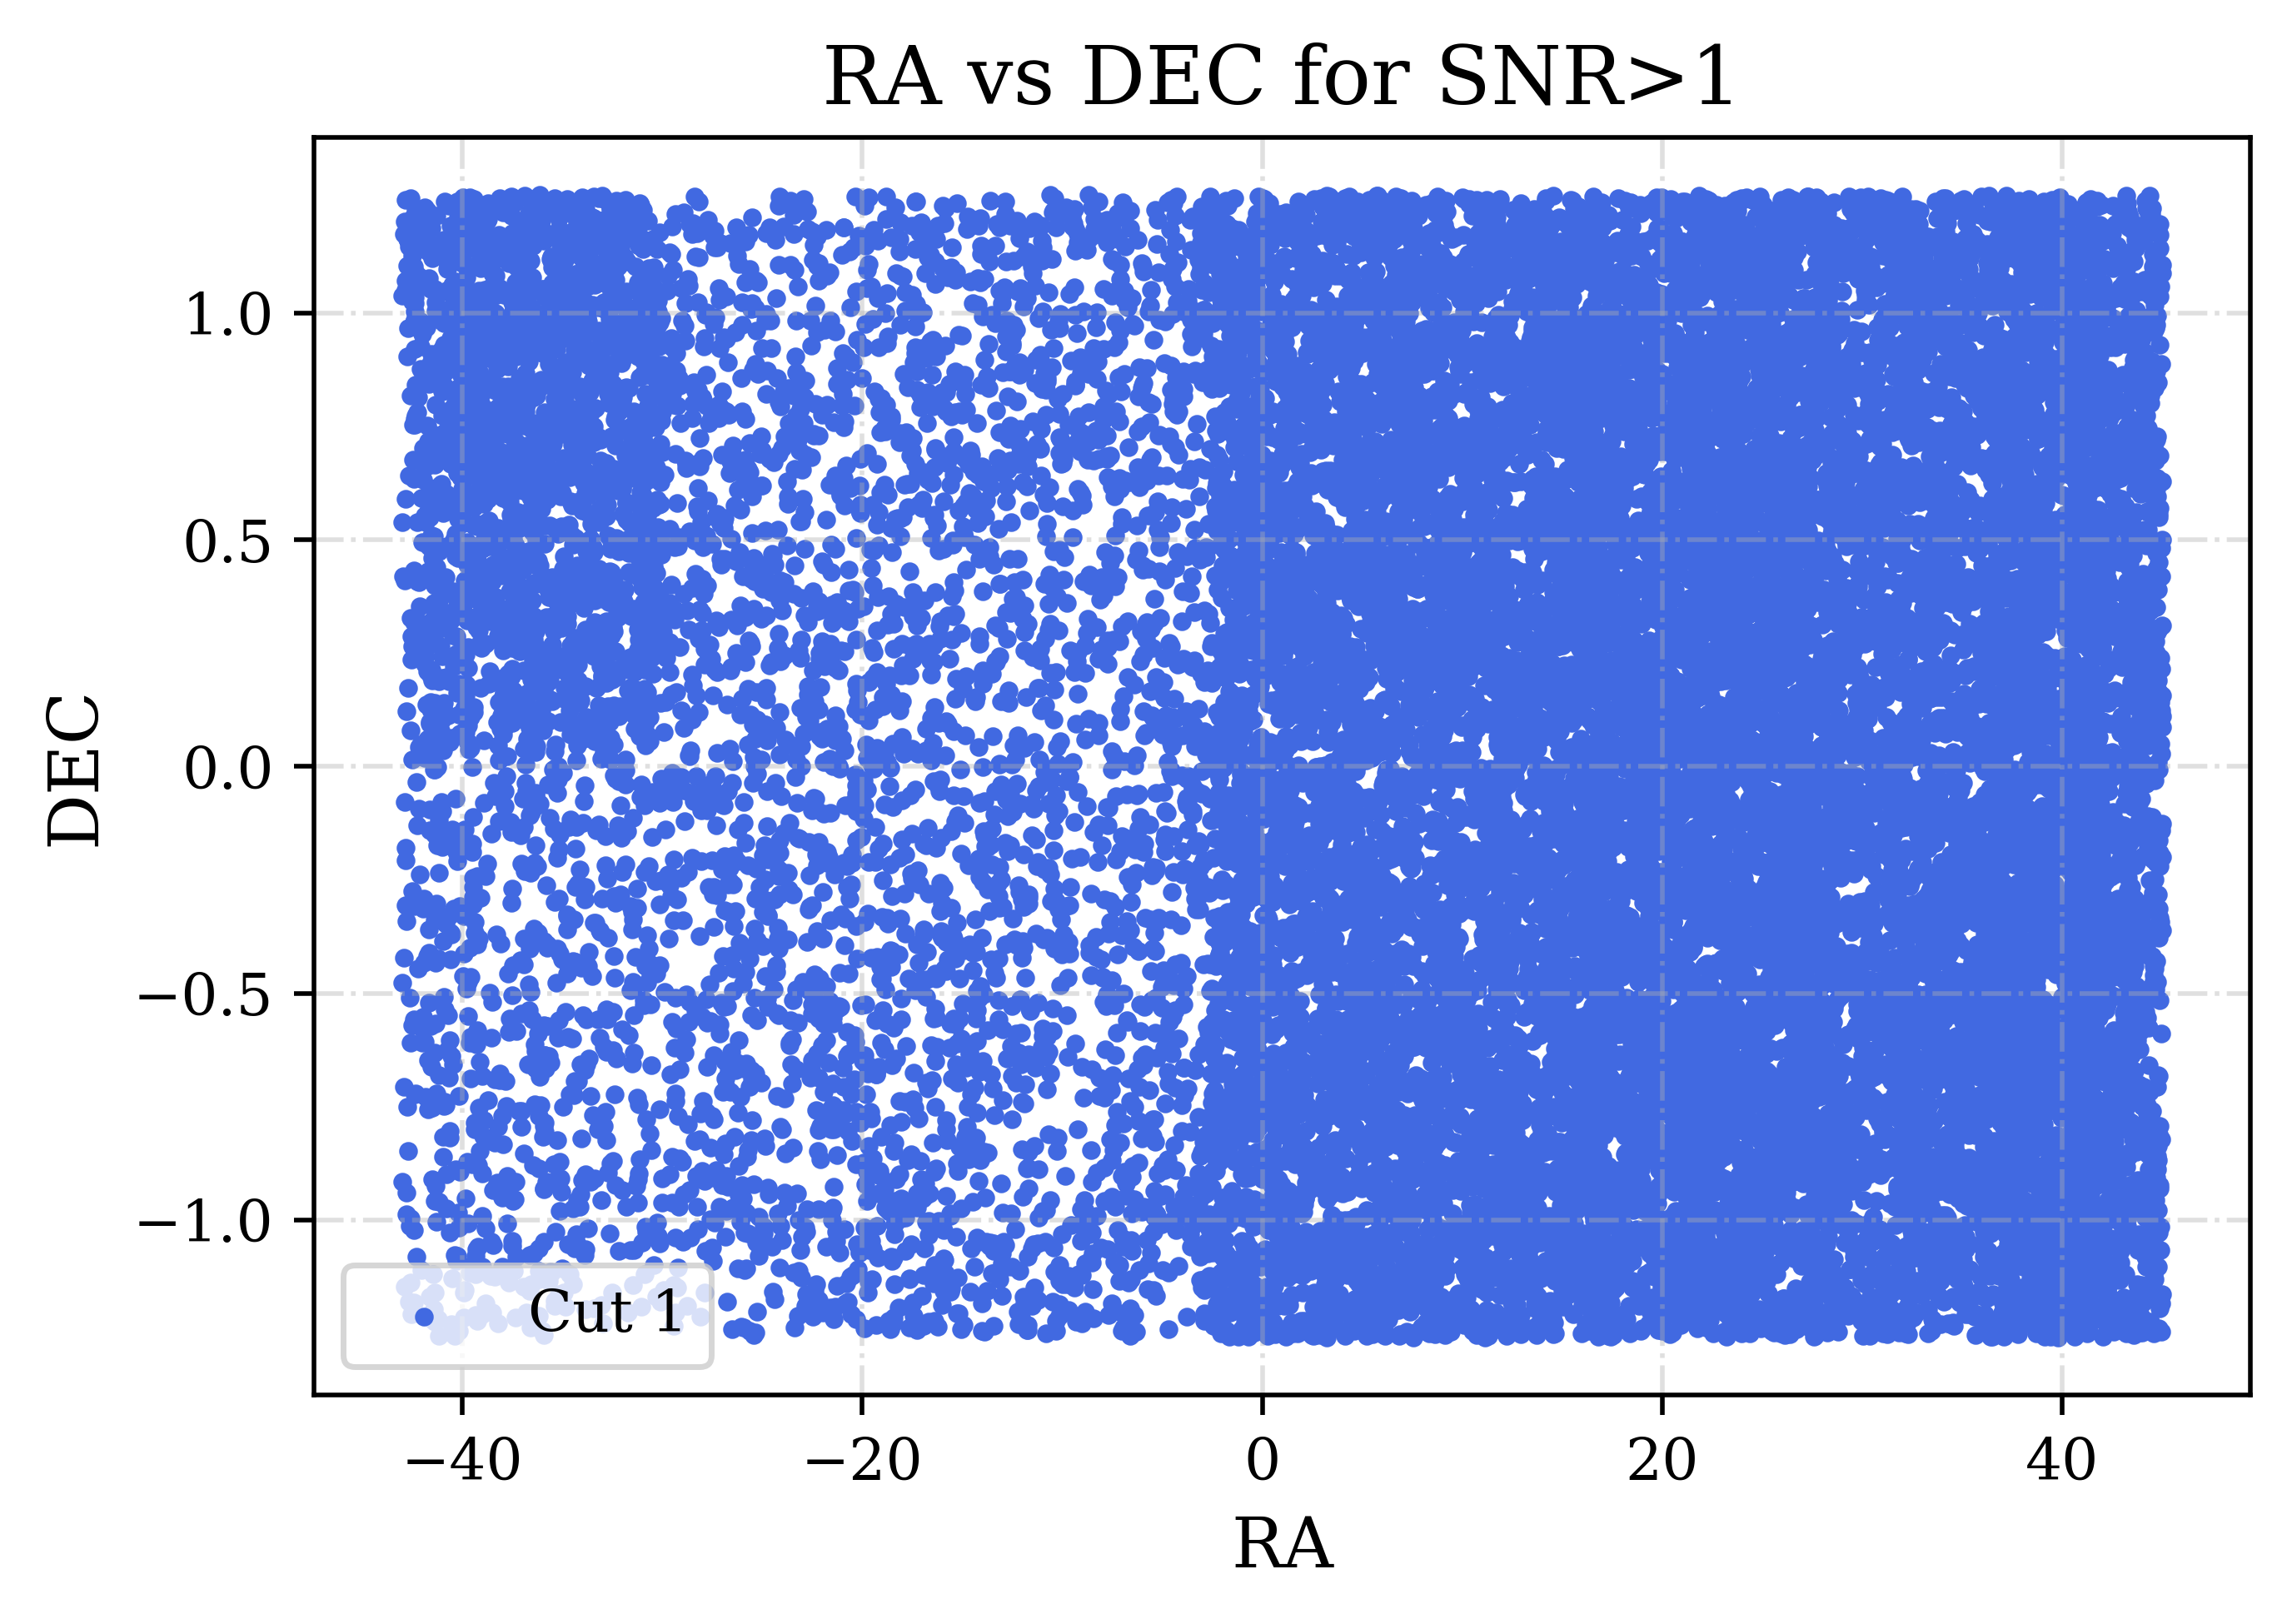

In [25]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>1',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked['RA'],h_masked['DEC'], color='royalblue', s=5, label='Cut 1')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

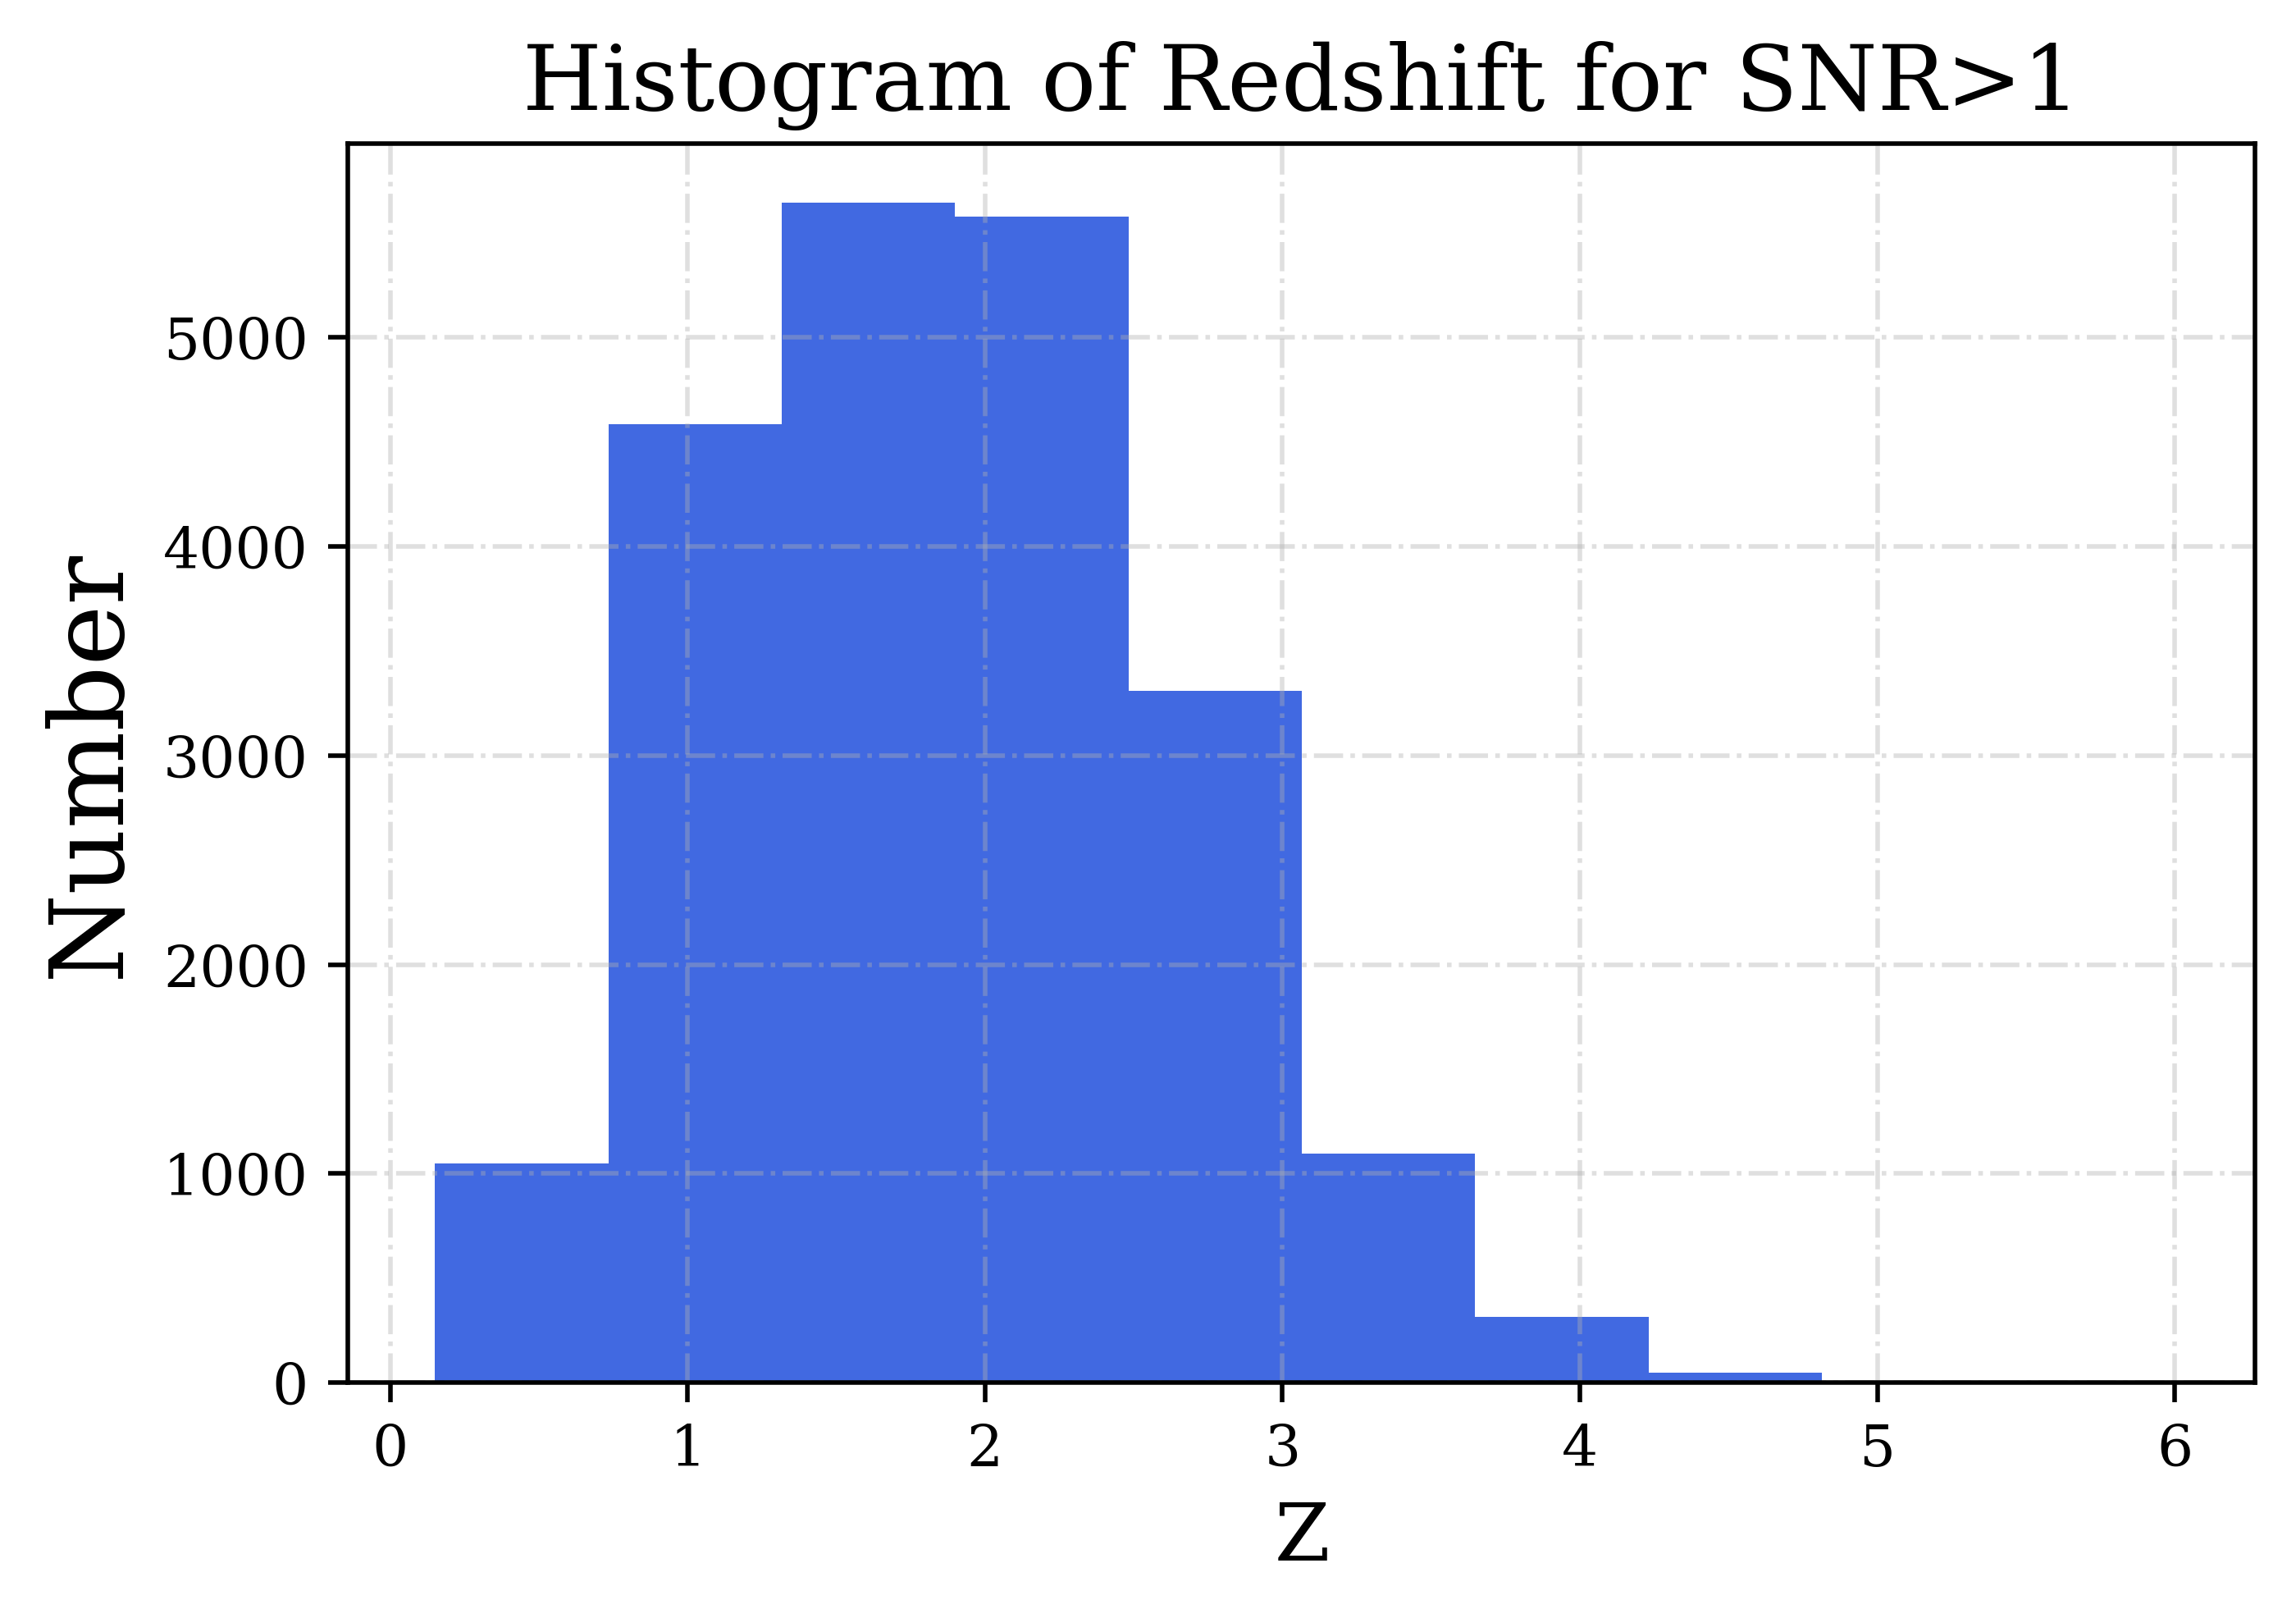

In [26]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>1',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='royalblue')

plt.show()

In [49]:
mask = (hdata['SNR_LYA']>1 )
h_masked = hdata[mask]

In [50]:
len(h_masked)

21638

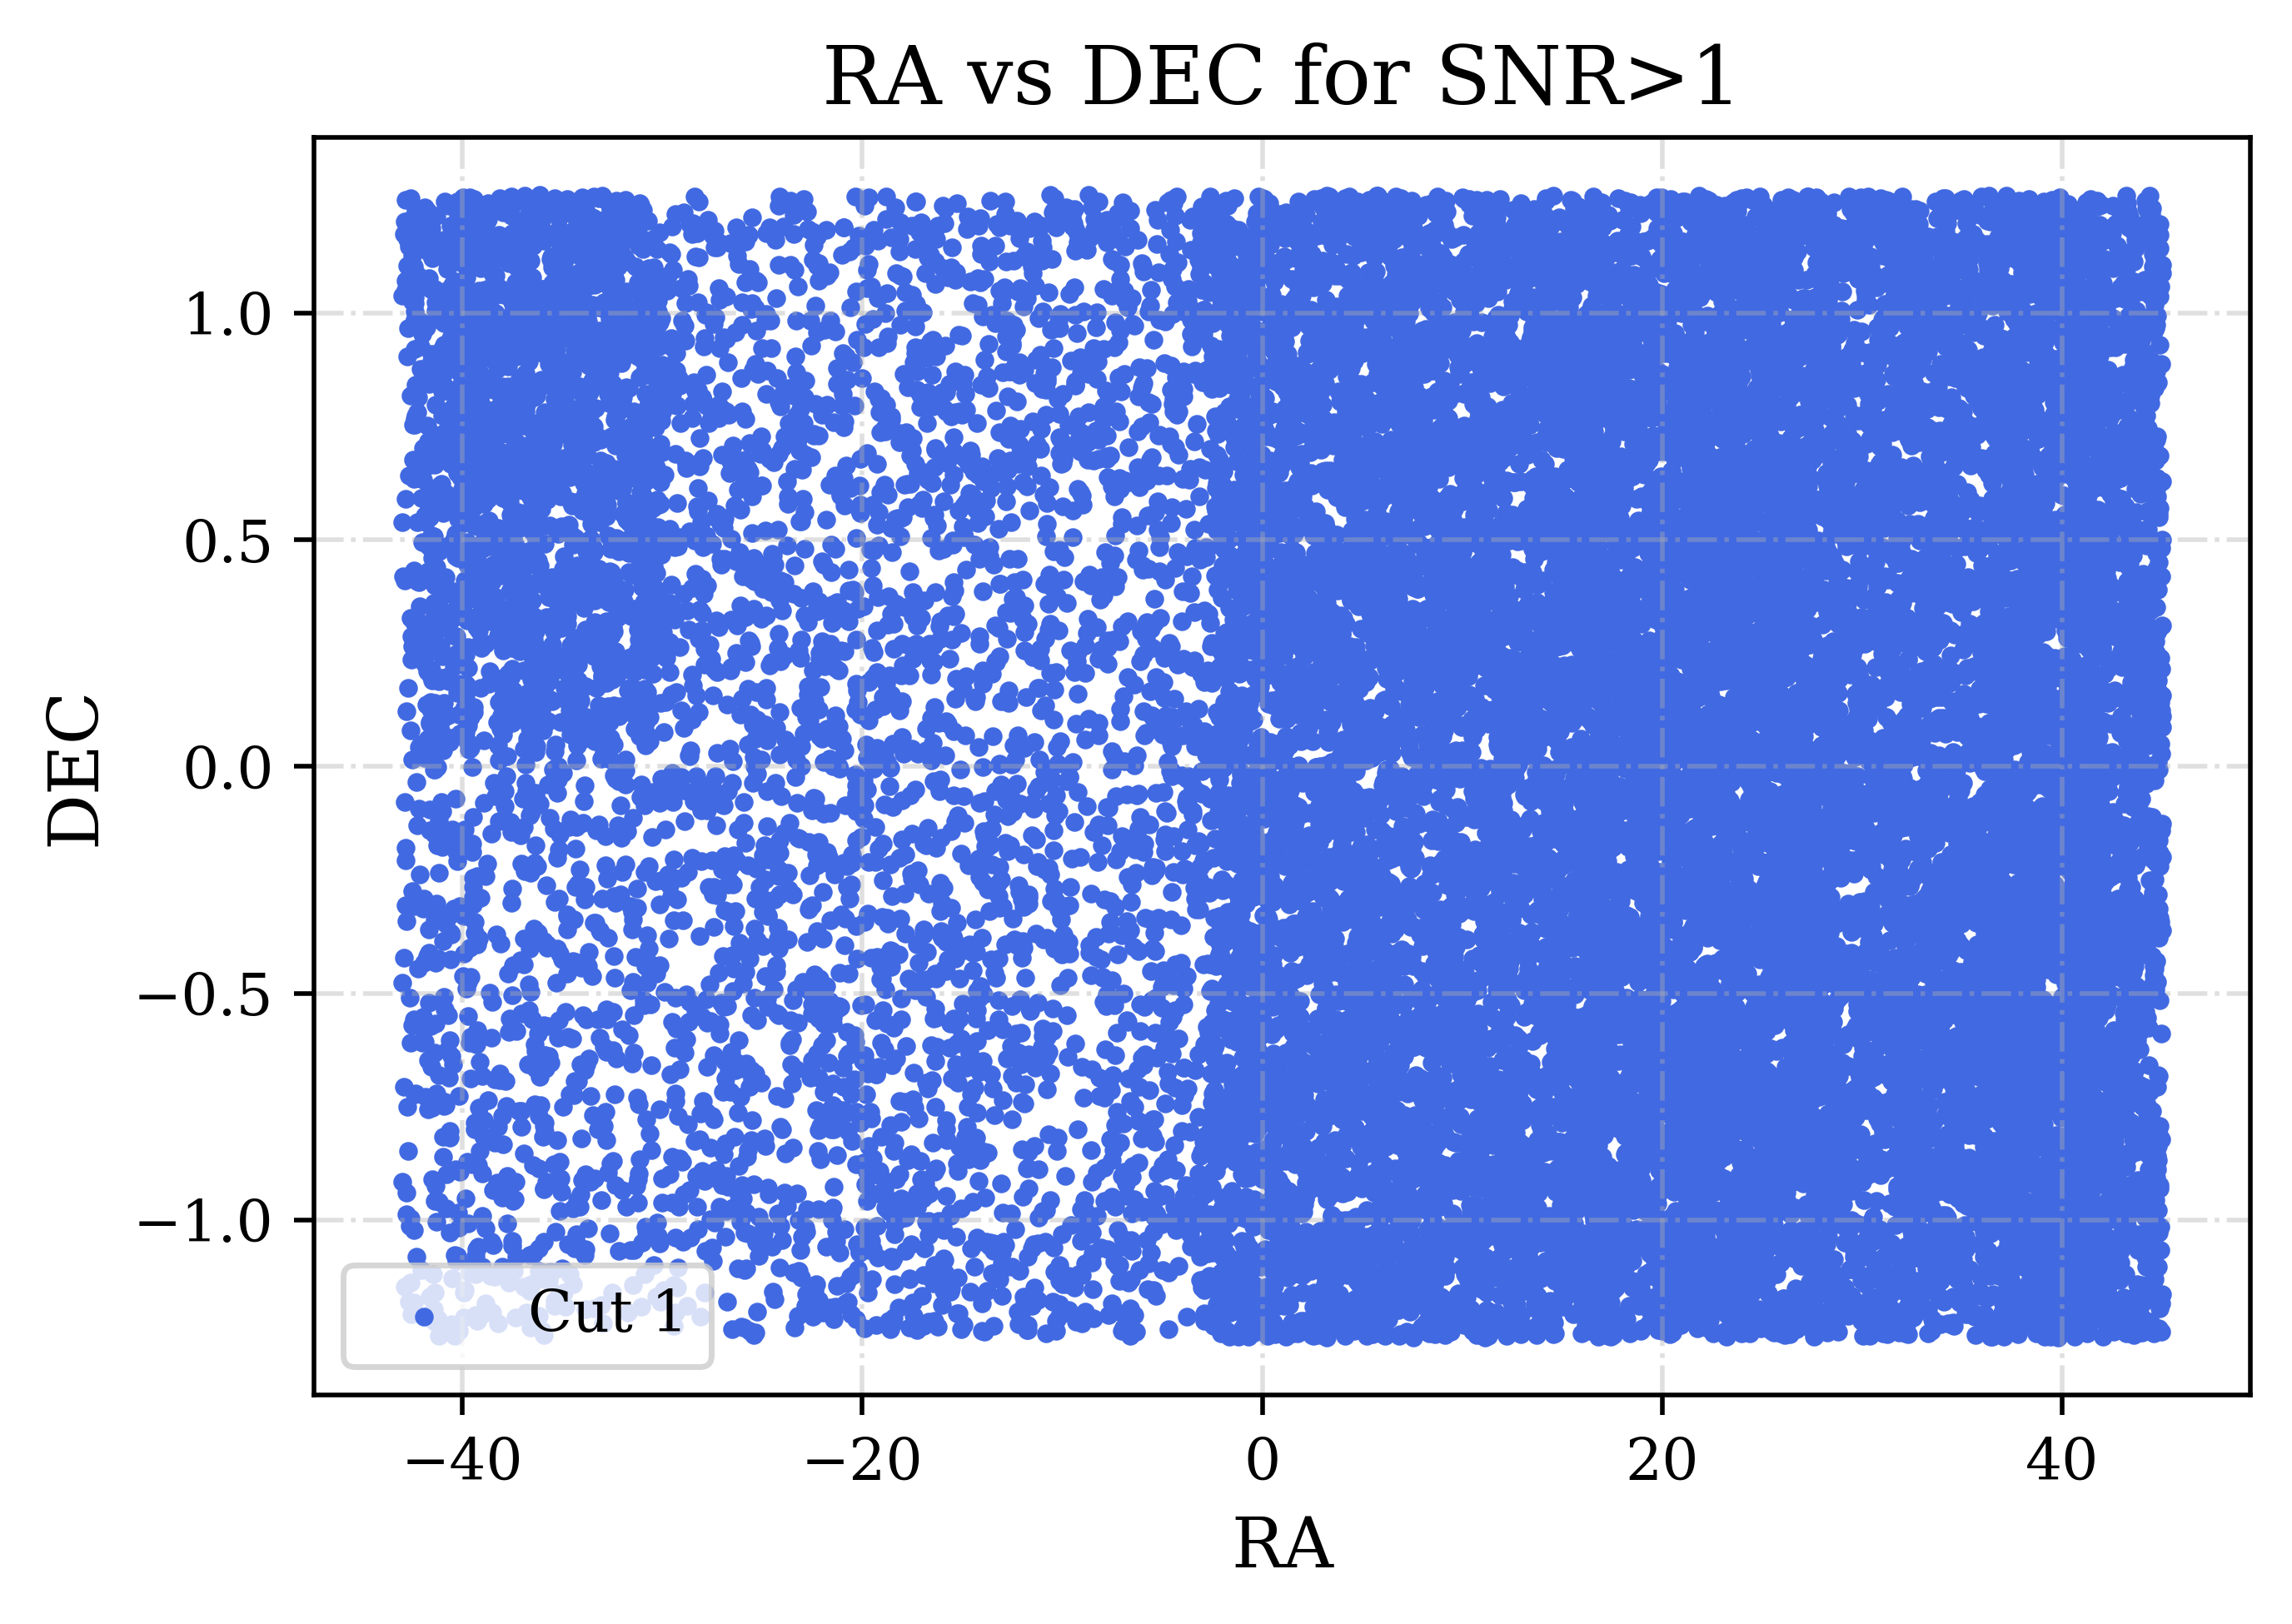

In [51]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>1',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked['RA'],h_masked['DEC'], color='royalblue', s=5, label='Cut 1')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

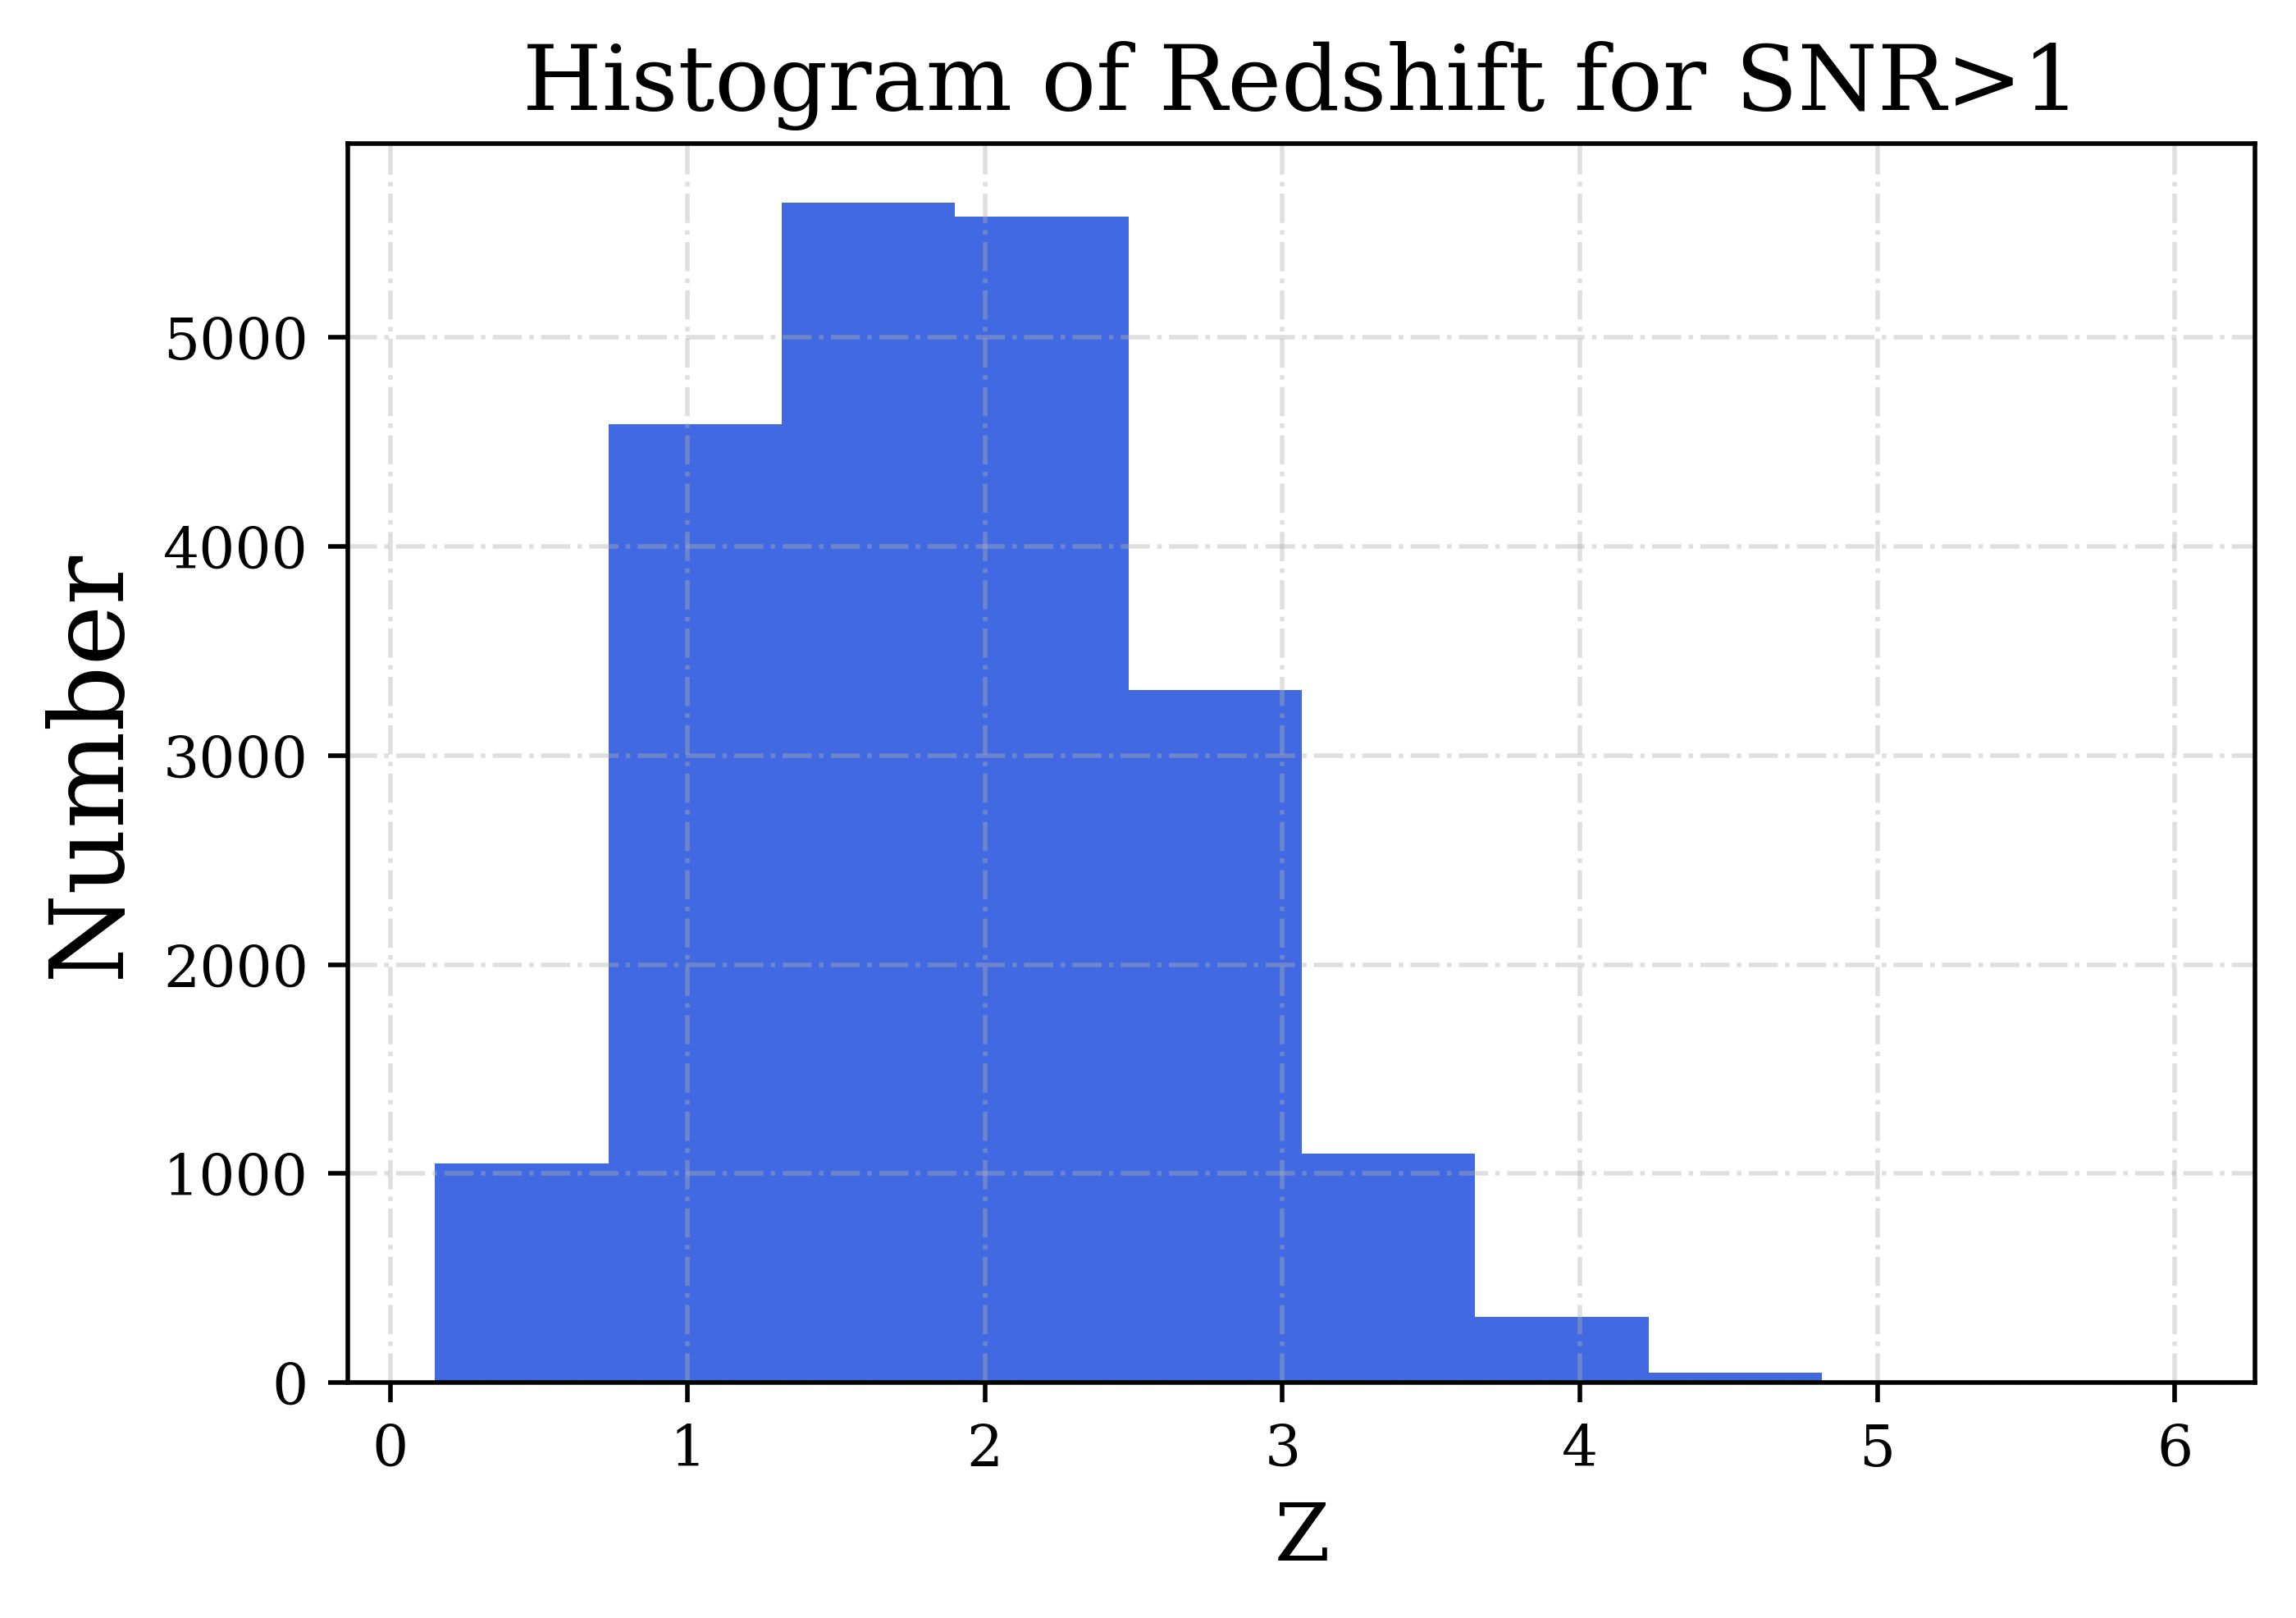

In [52]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>1',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['Z'], color='royalblue')

plt.show()

#### Cut 2: SNR>2

In [84]:
mask = (hdata['SNR']>2 )
h_masked2 = hdata[mask]

In [85]:
len(h_masked2)

21104

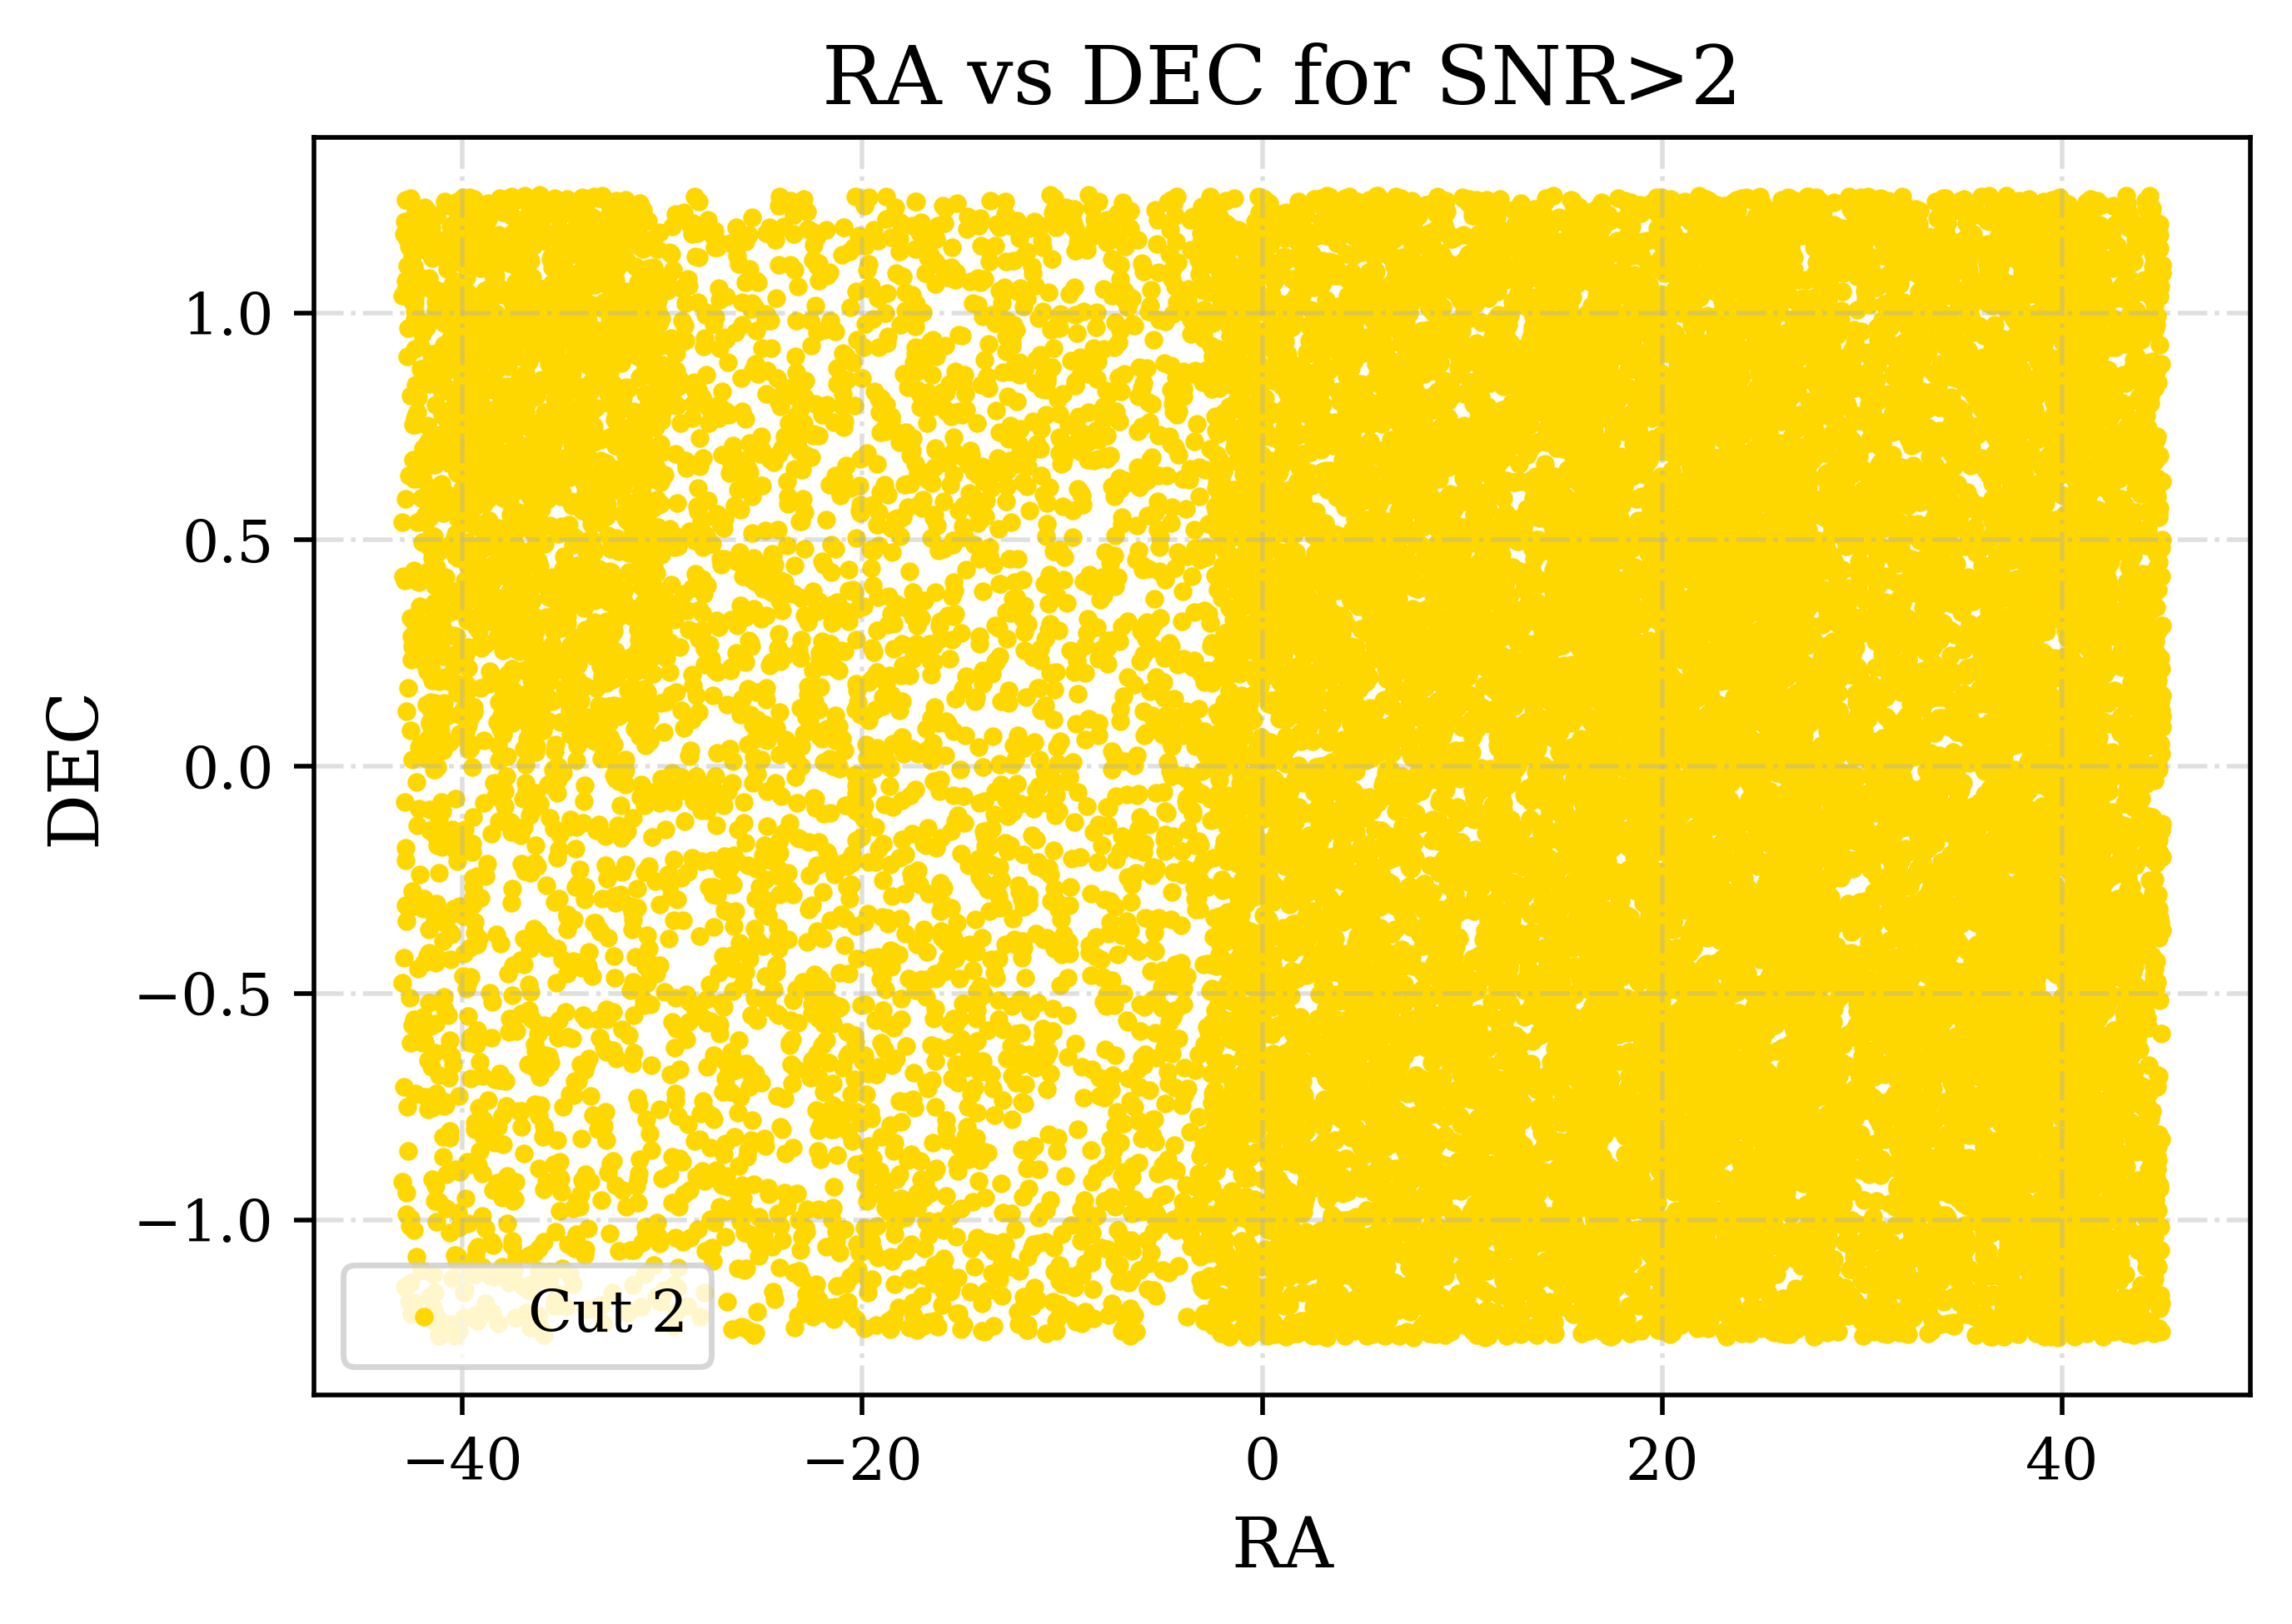

In [86]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for Cut 2',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked2['RA'],h_masked2['DEC'], color='gold', s=5, label='SNR>2')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

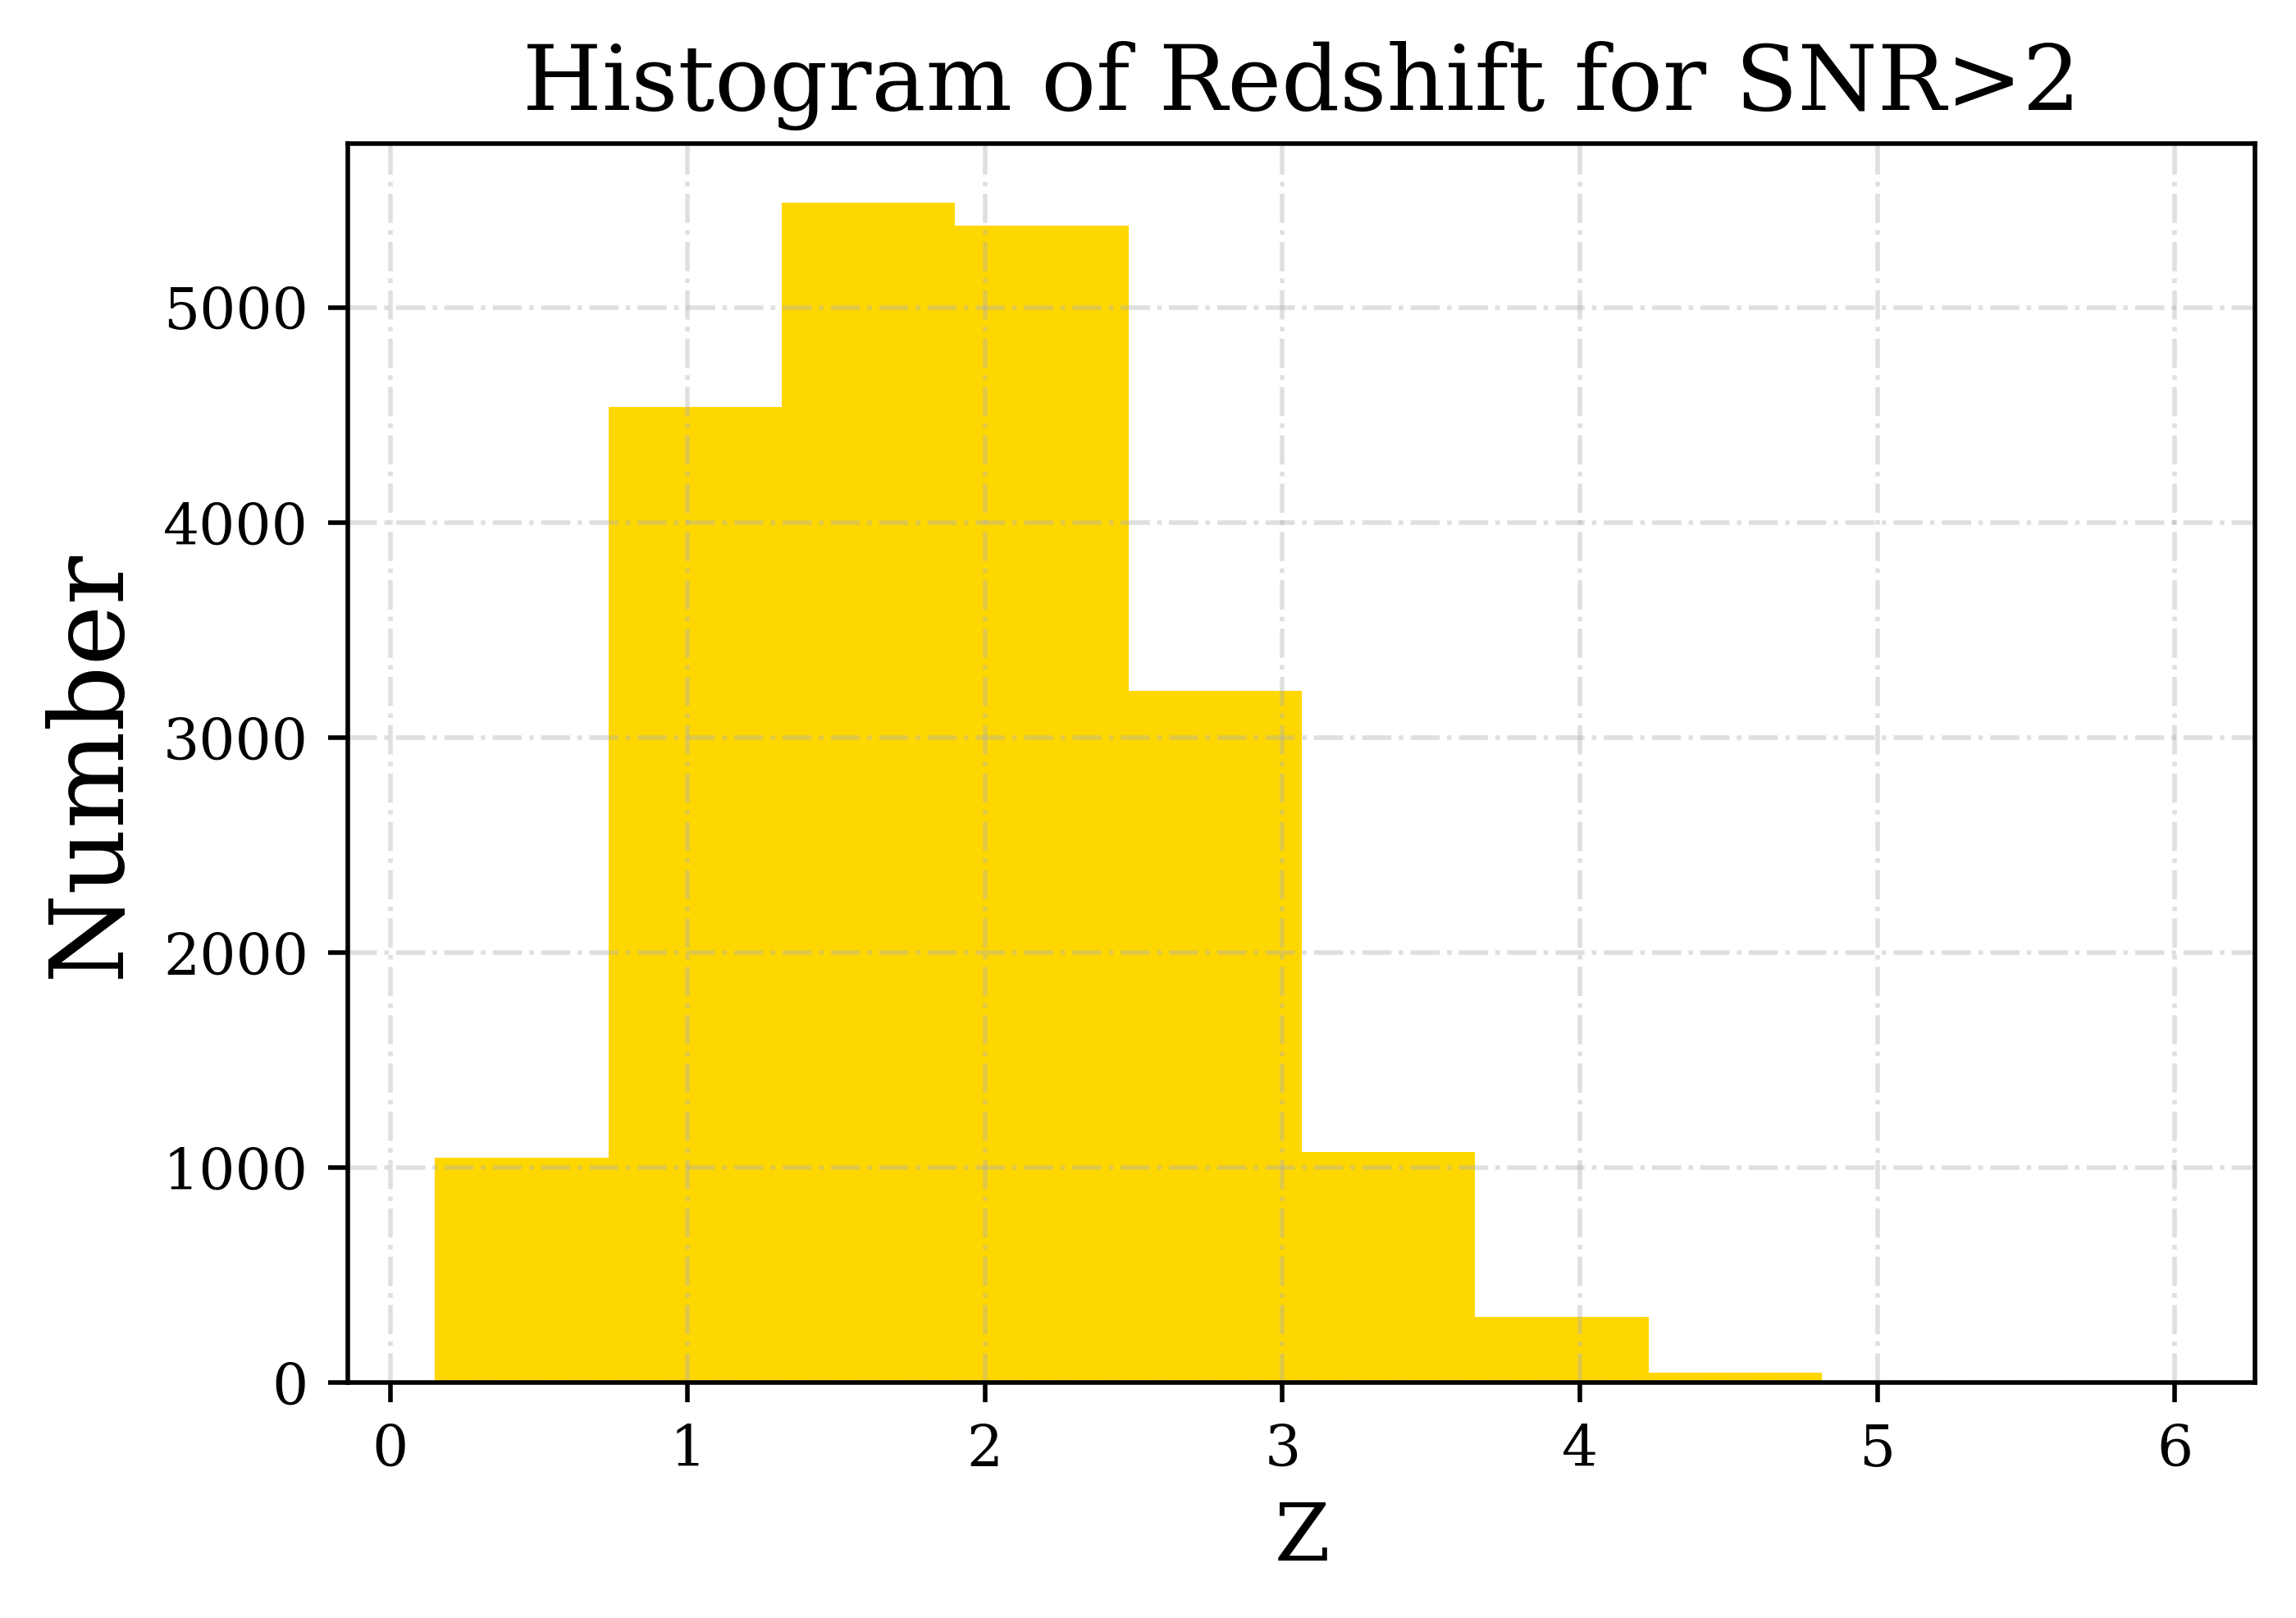

In [87]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>2',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked2['Z'], color='gold')

plt.show()

In [88]:
mask = (hdata['SNR_LYA']>2 )
h_masked2 = hdata[mask]

In [89]:
len(h_masked2)

21135

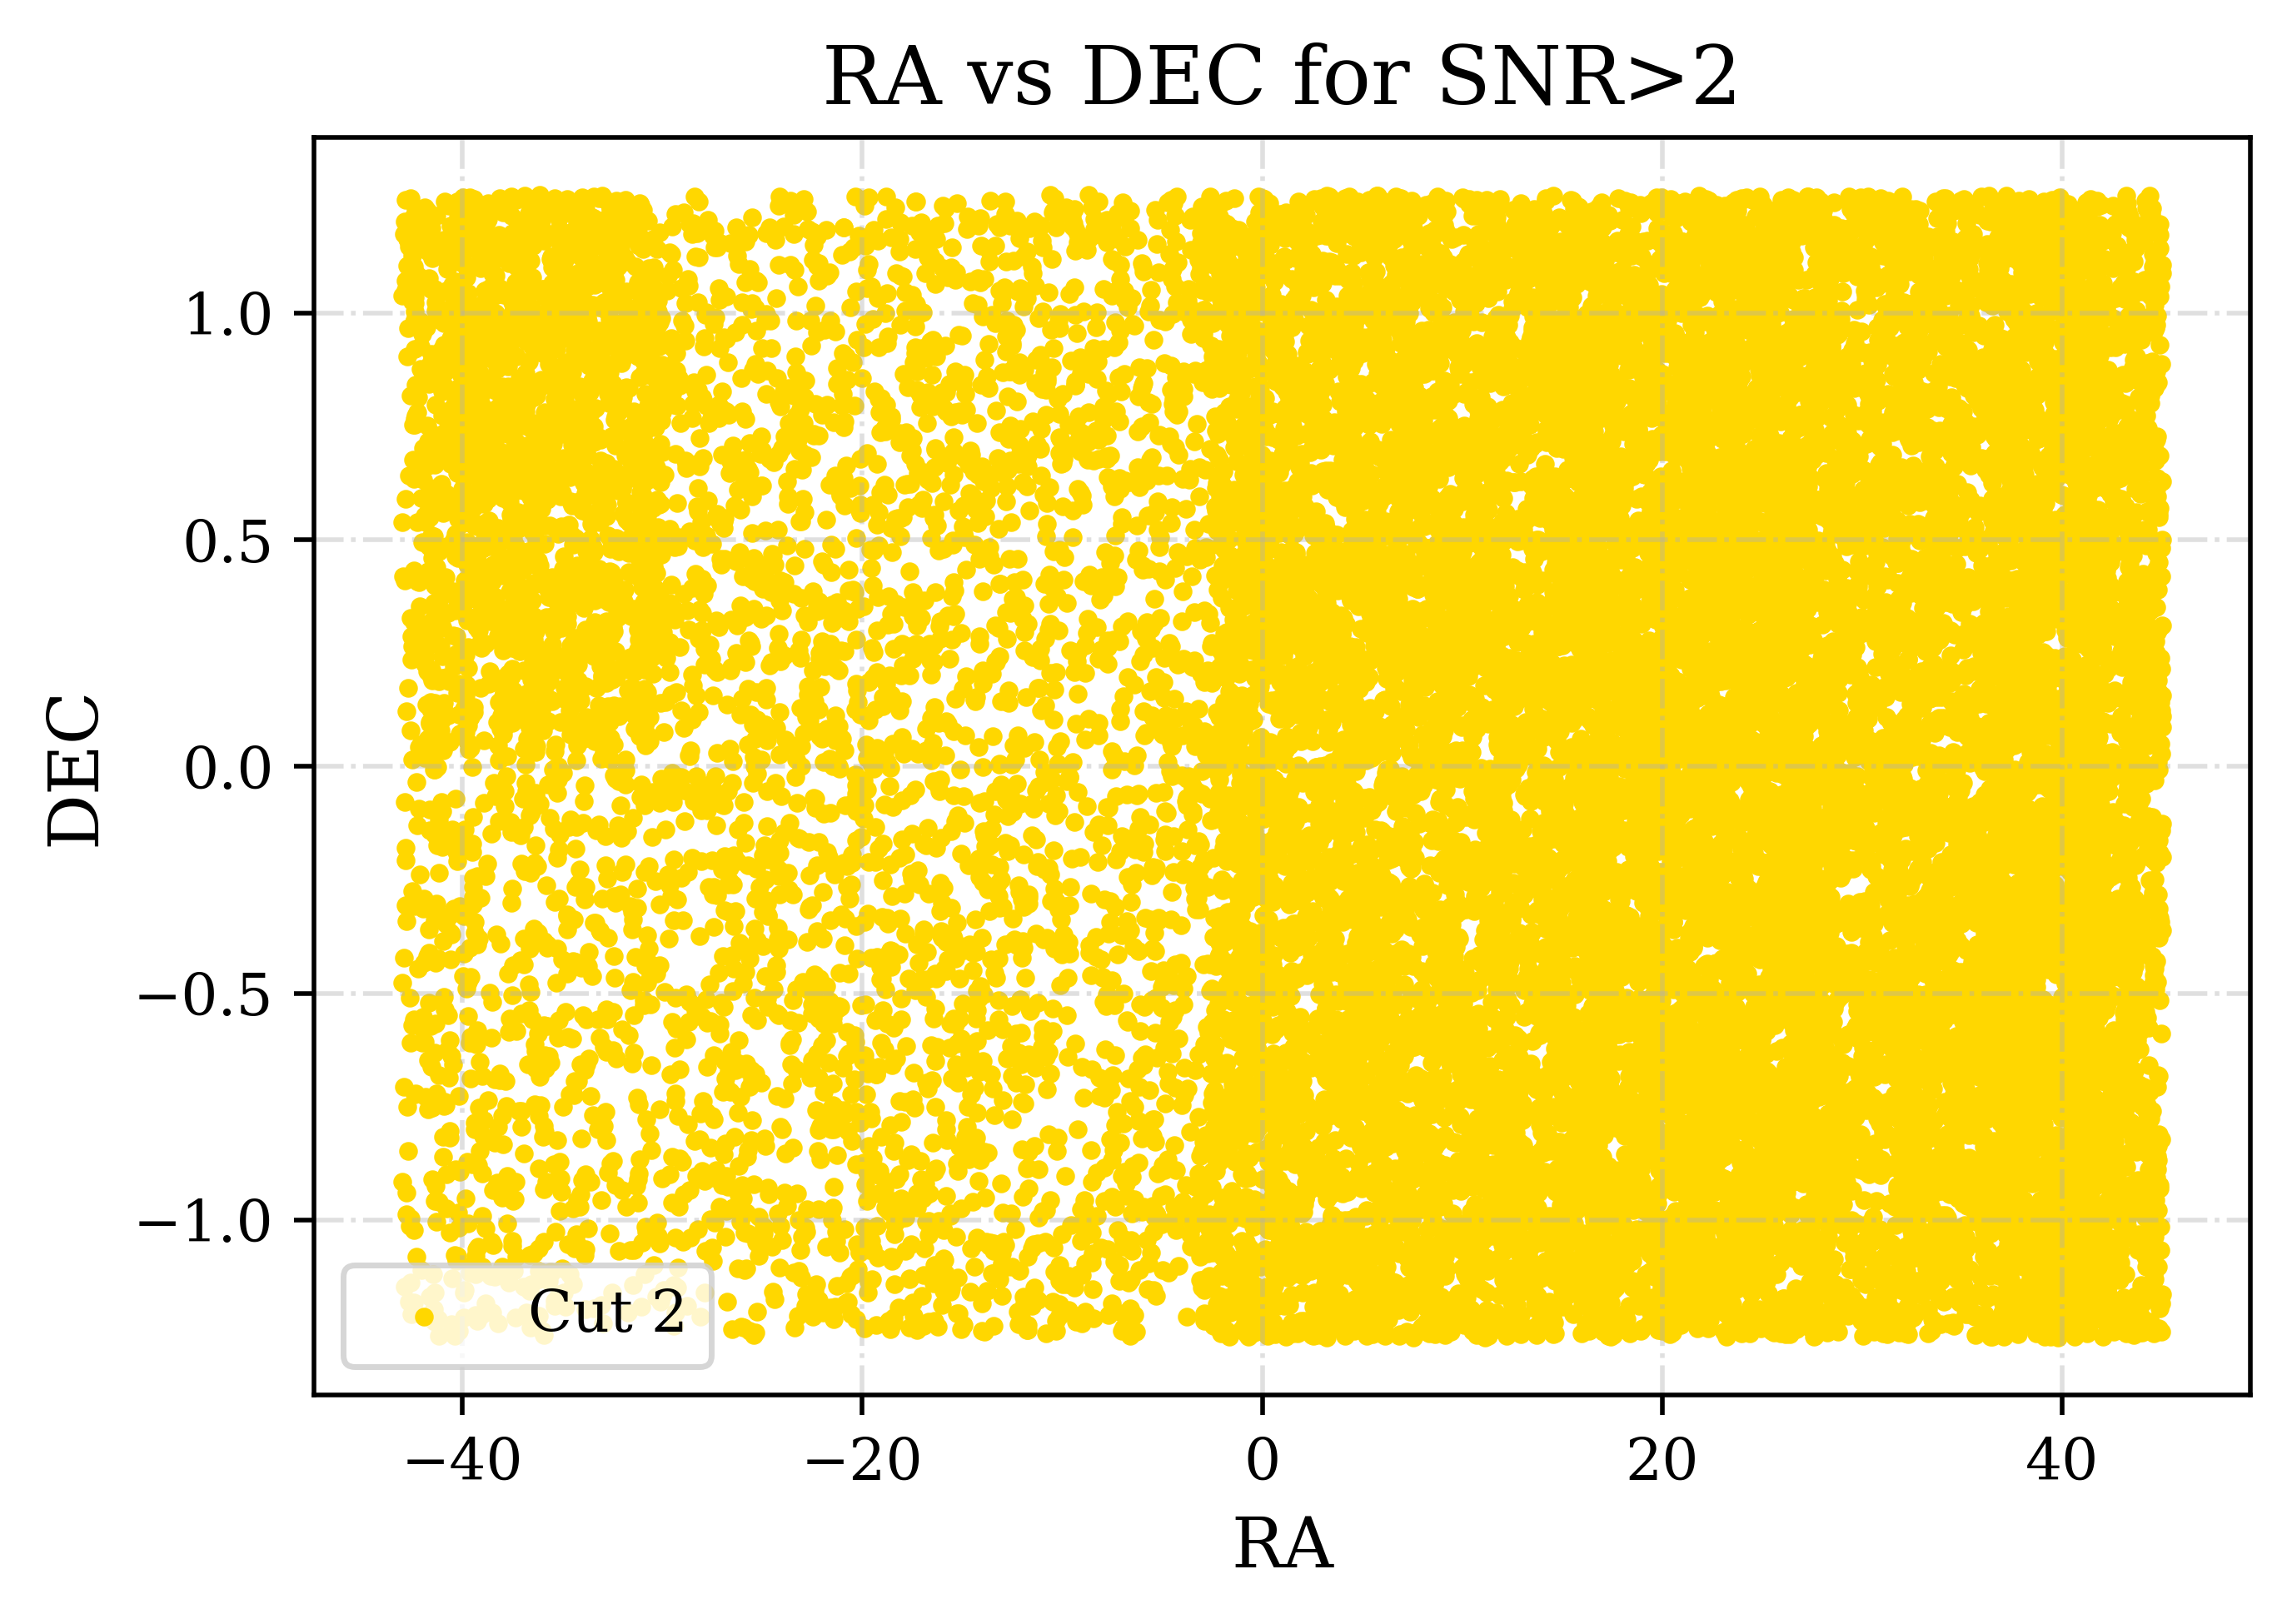

In [90]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for Cut 2',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked2['RA'],h_masked2['DEC'], color='gold', s=5, label='SNR>2')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

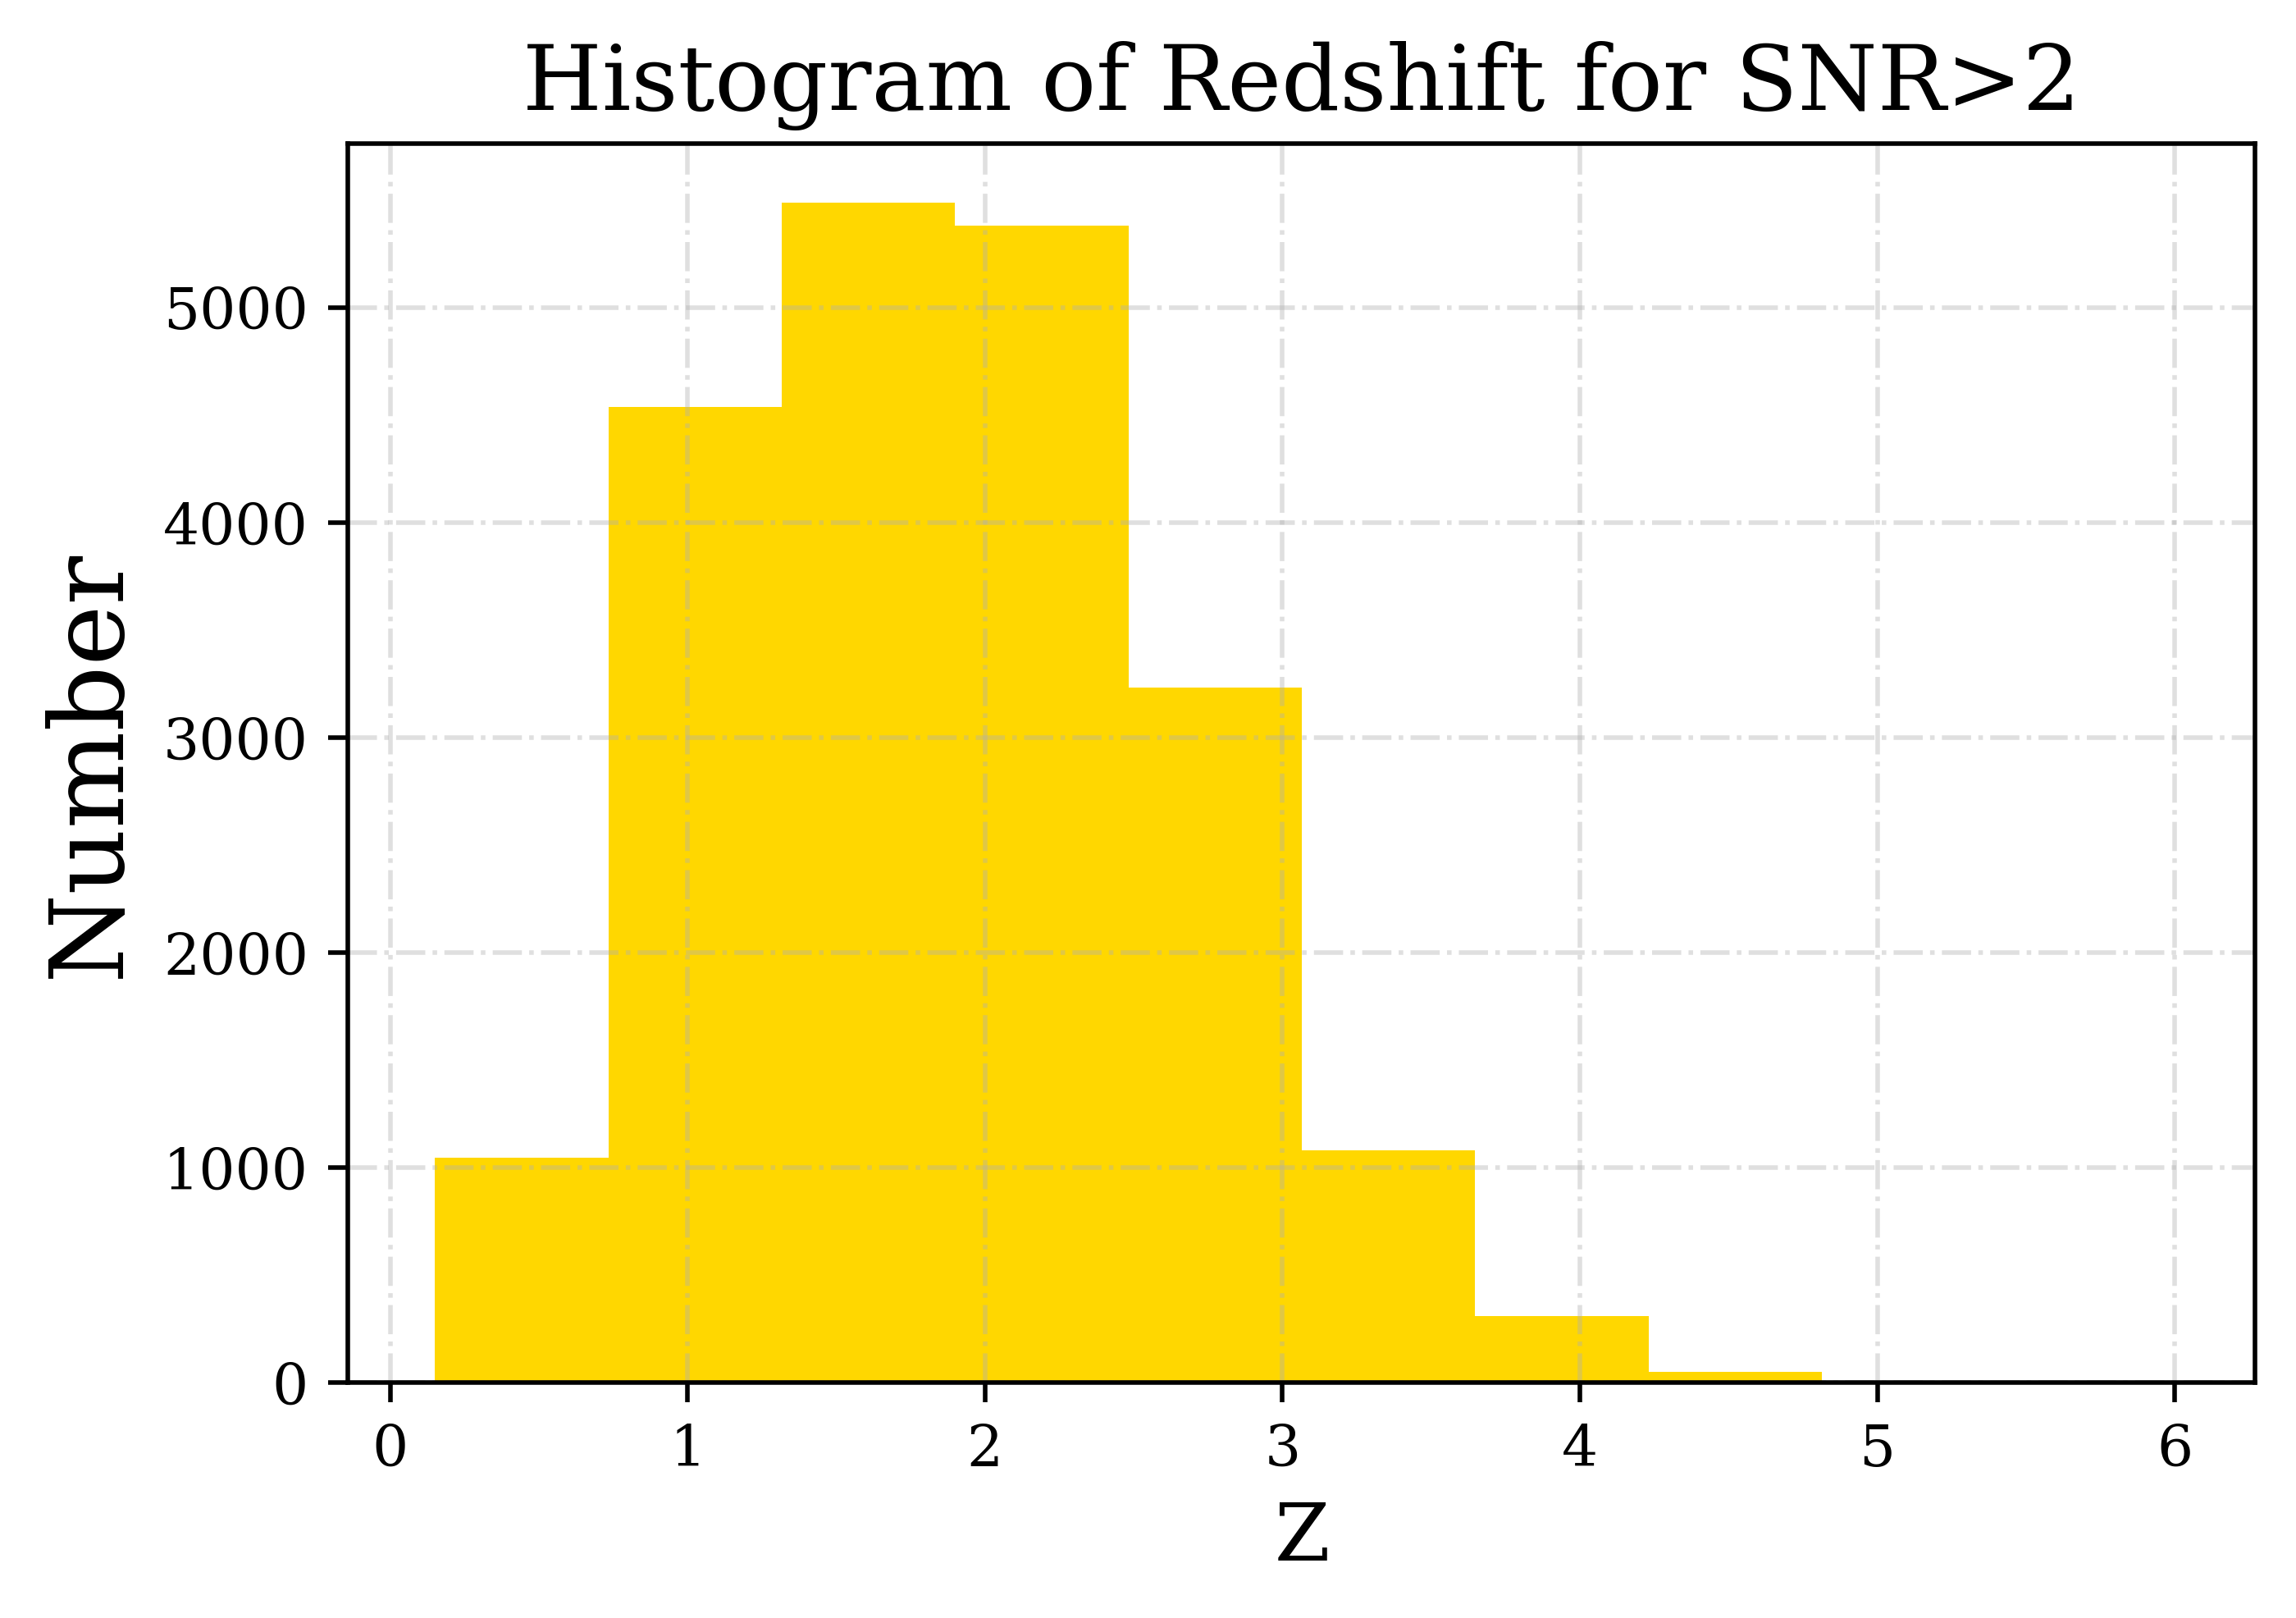

In [91]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>2',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked2['Z'], color='gold')

plt.show()

#### Cut 3: SNR>3

In [73]:
mask = (hdata['SNR']>3 )
h_masked3 = hdata[mask]

In [74]:
len(h_masked3)

19908

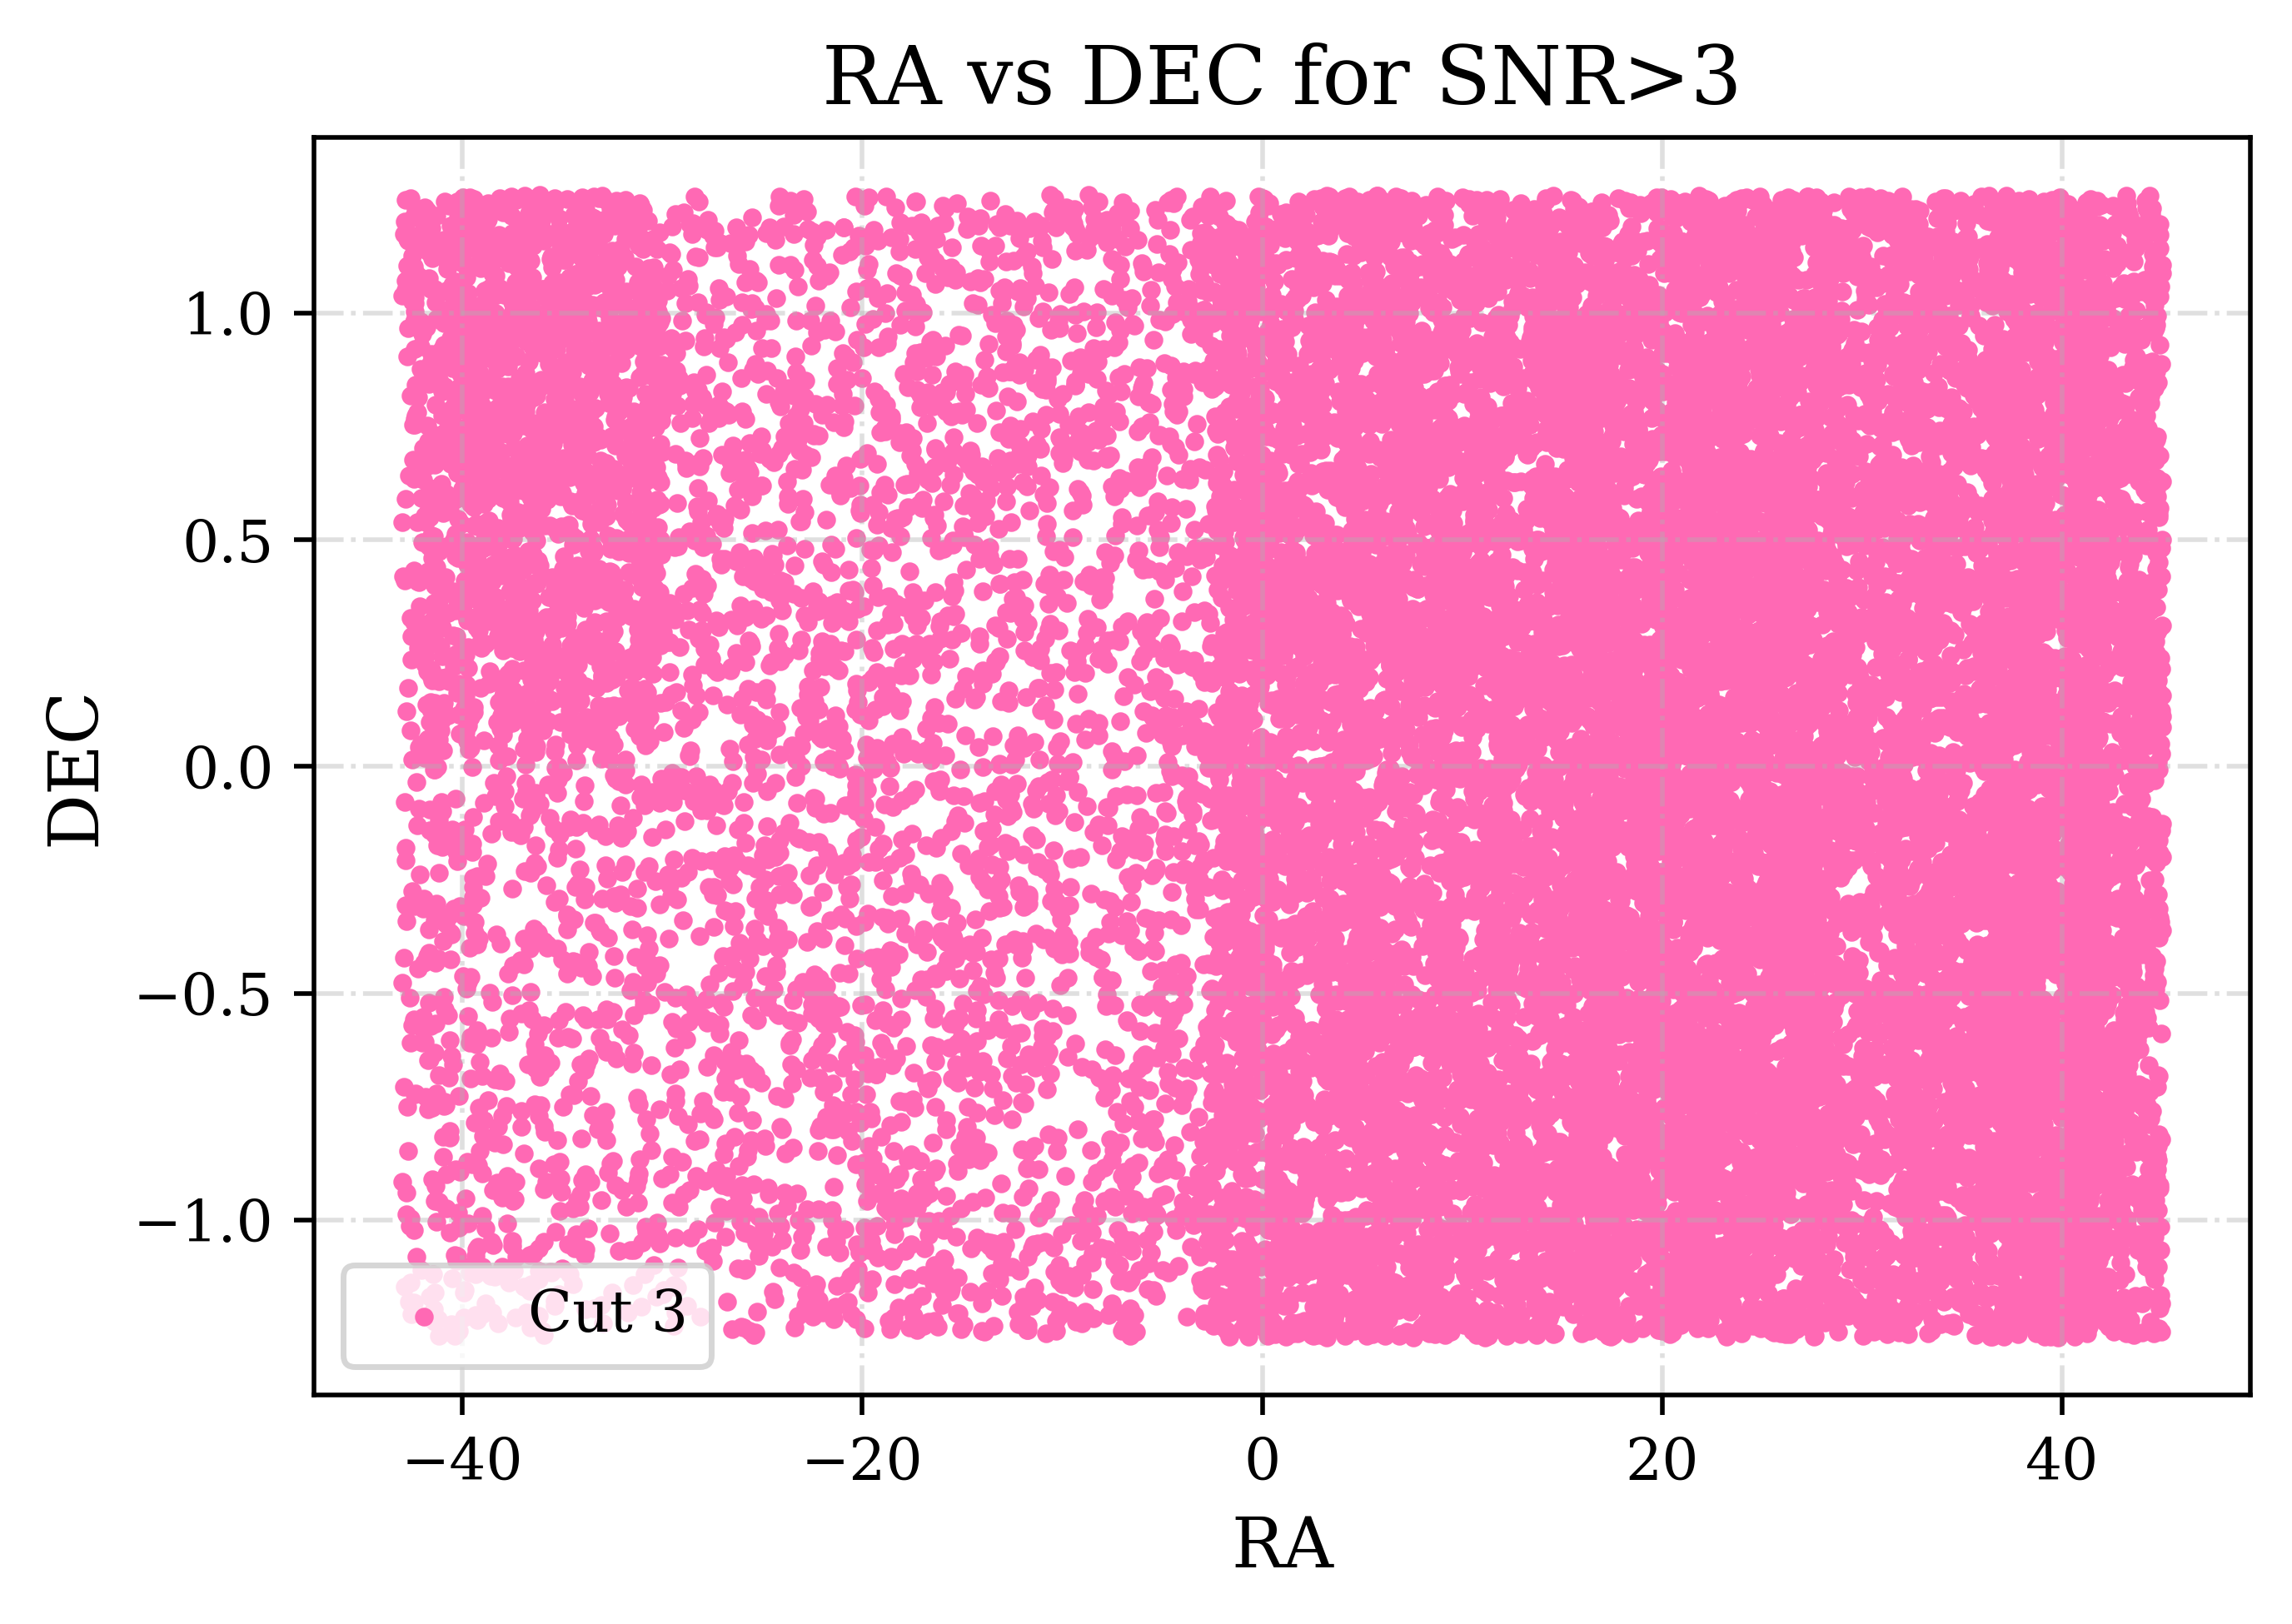

In [75]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>3',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked3['RA'],h_masked3['DEC'], color='hotpink', s=5, label='Cut 3')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

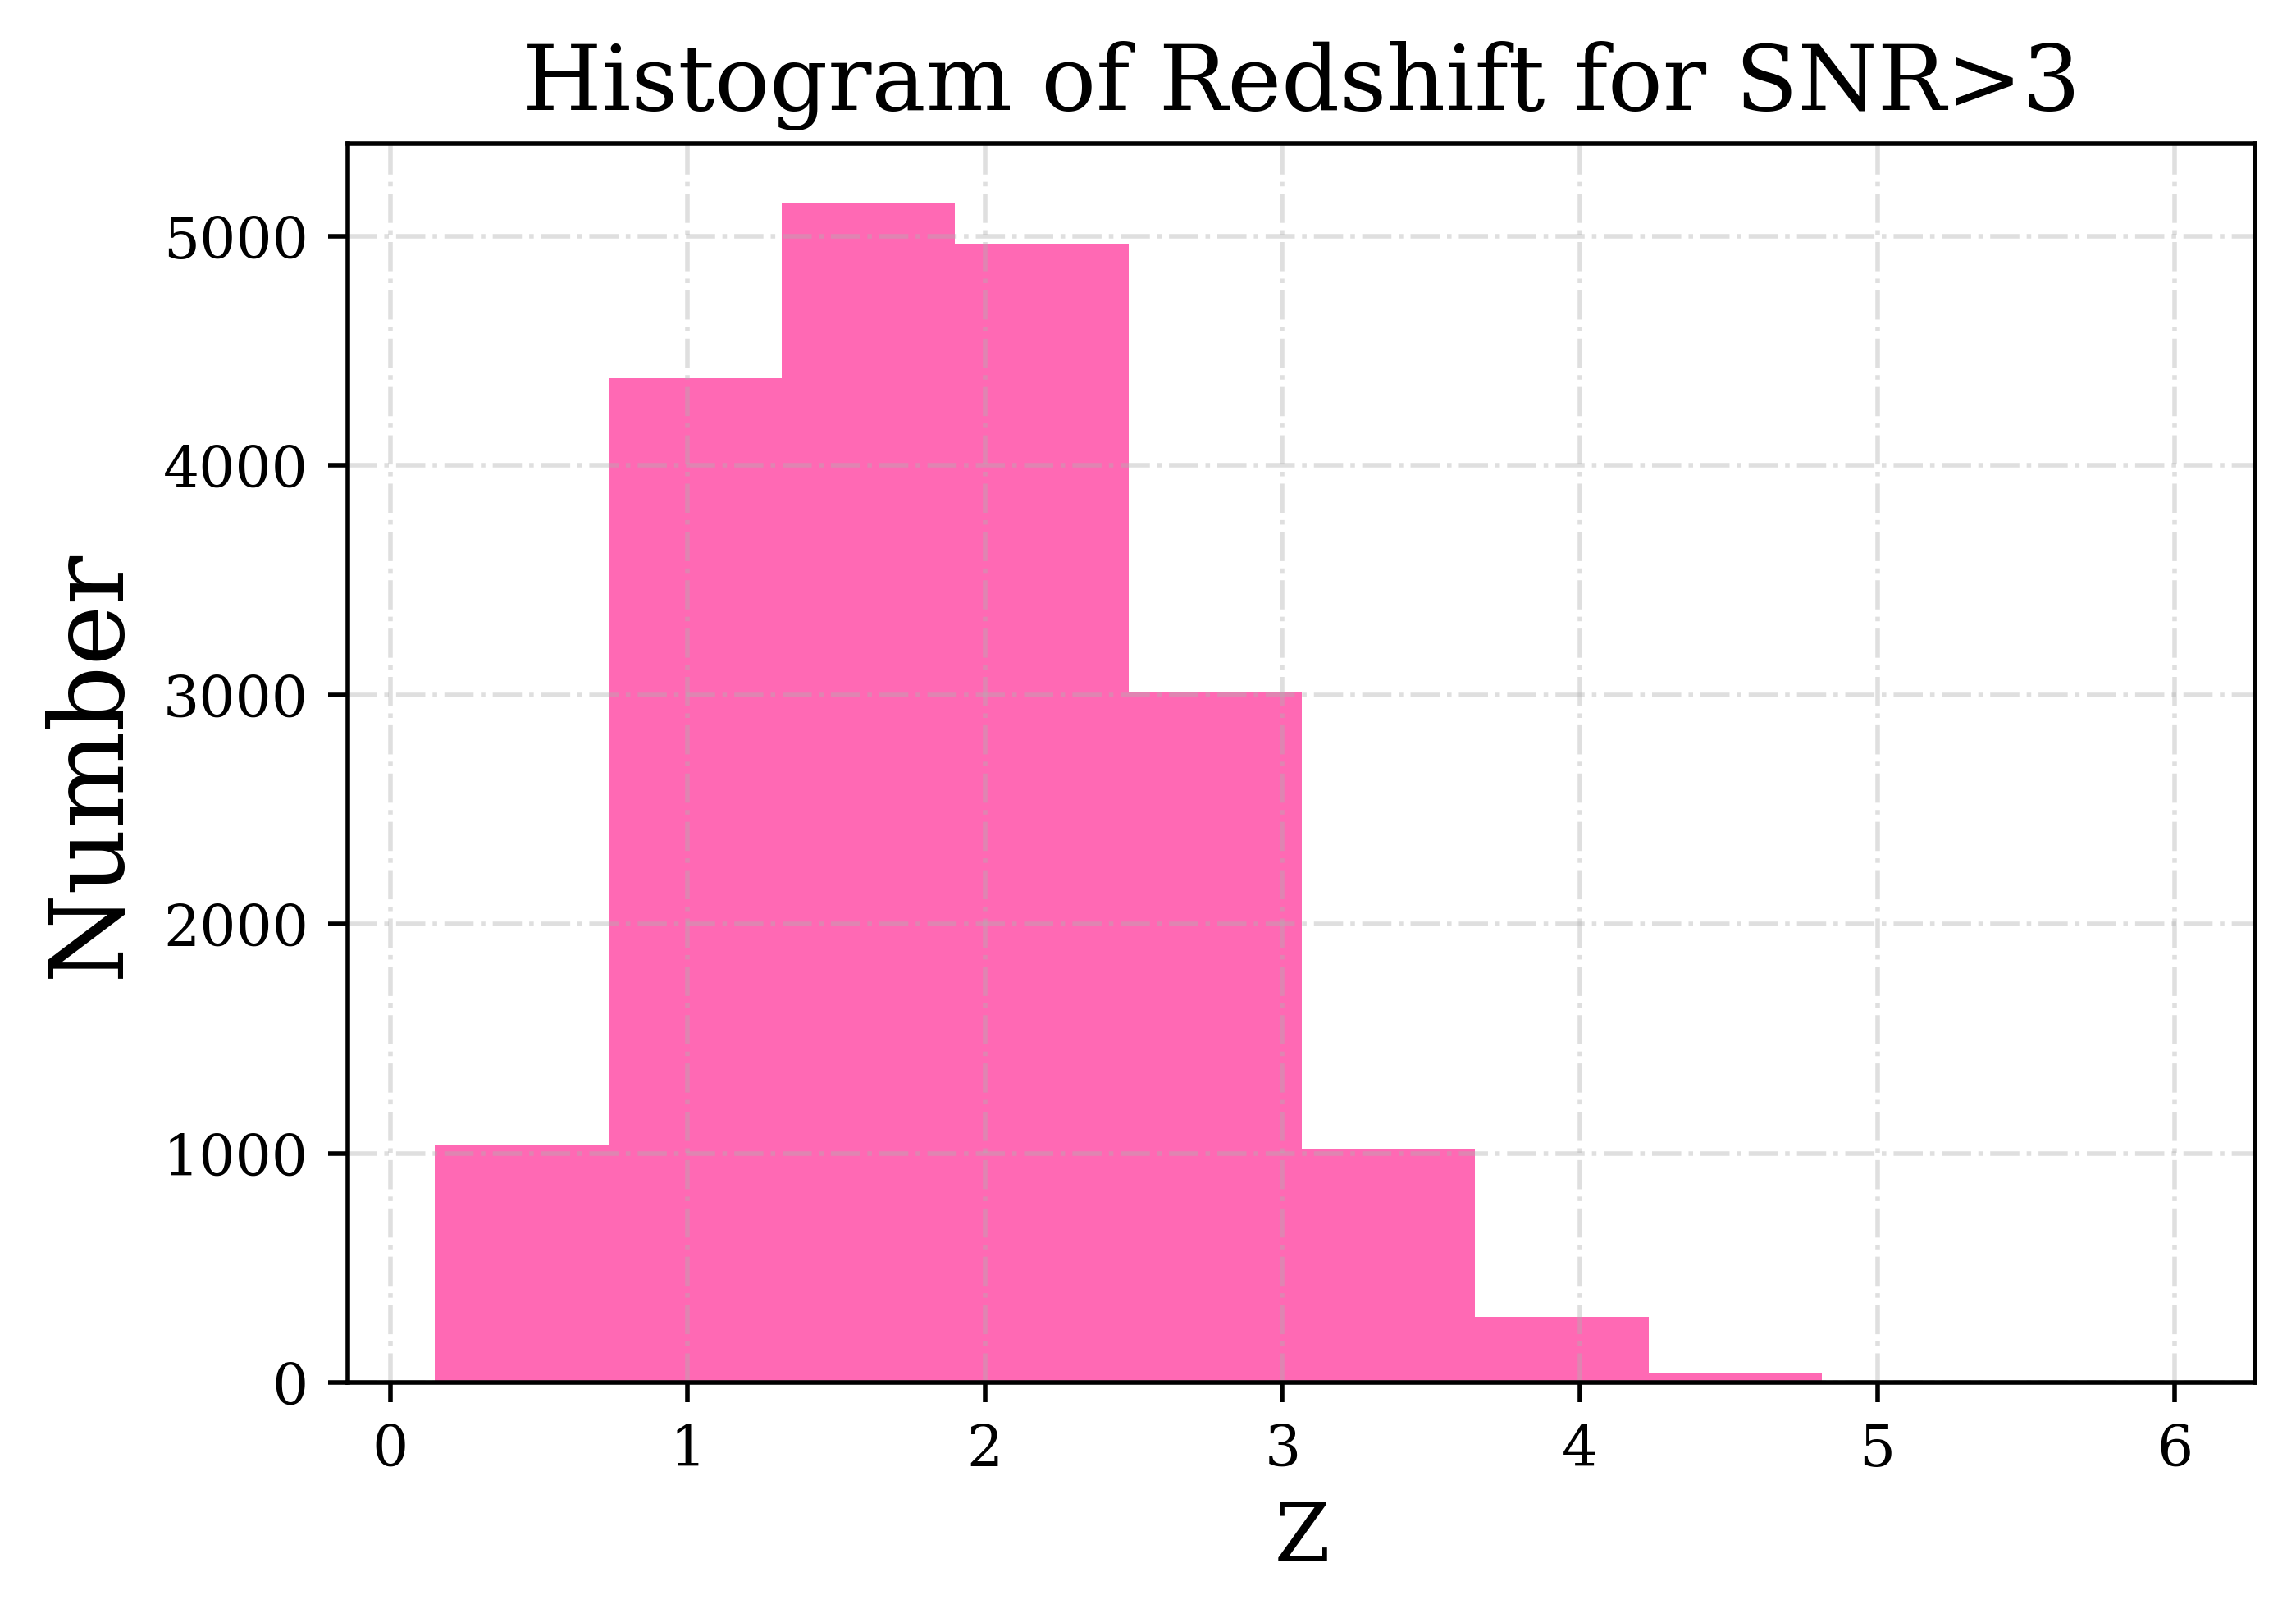

In [76]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>3',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked3['Z'], color='hotpink')

plt.show()

In [77]:
mask = (hdata['SNR_LYA']>3 )
h_masked3 = hdata[mask]

In [78]:
len(h_masked3)

20001

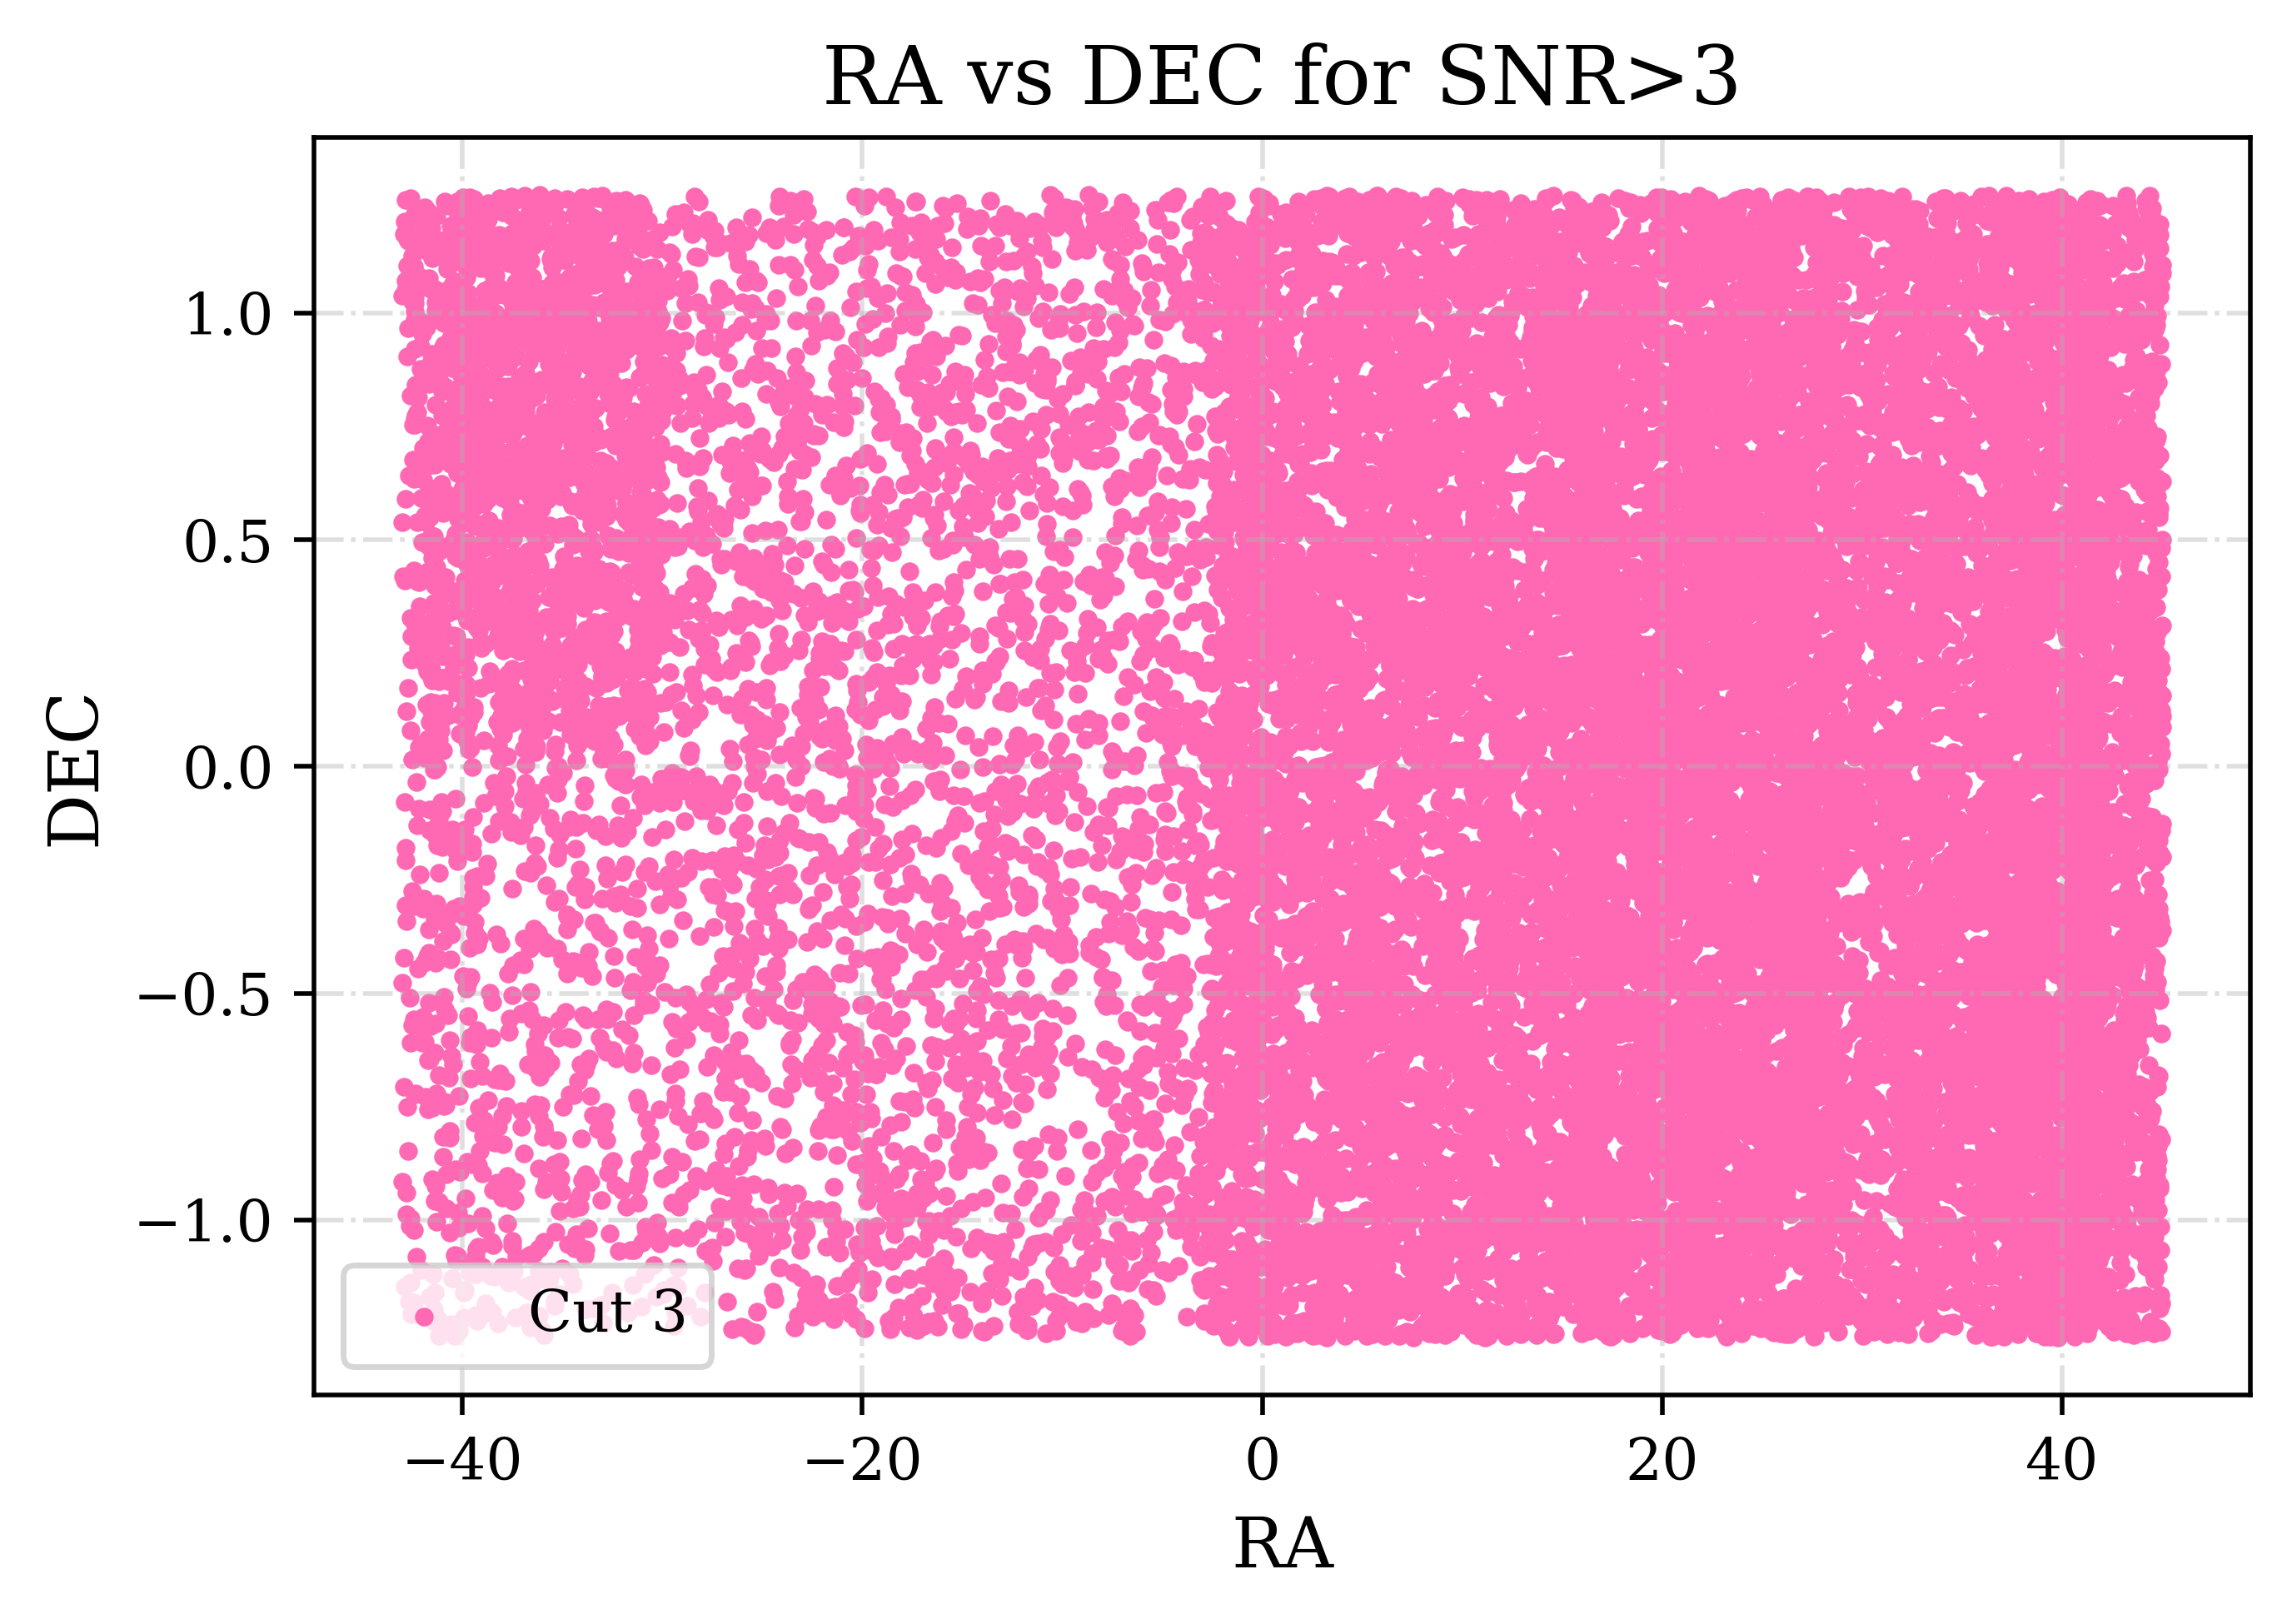

In [79]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'RA vs DEC for SNR>3',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(h_masked3['RA'],h_masked3['DEC'], color='hotpink', s=5, label='Cut 3')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

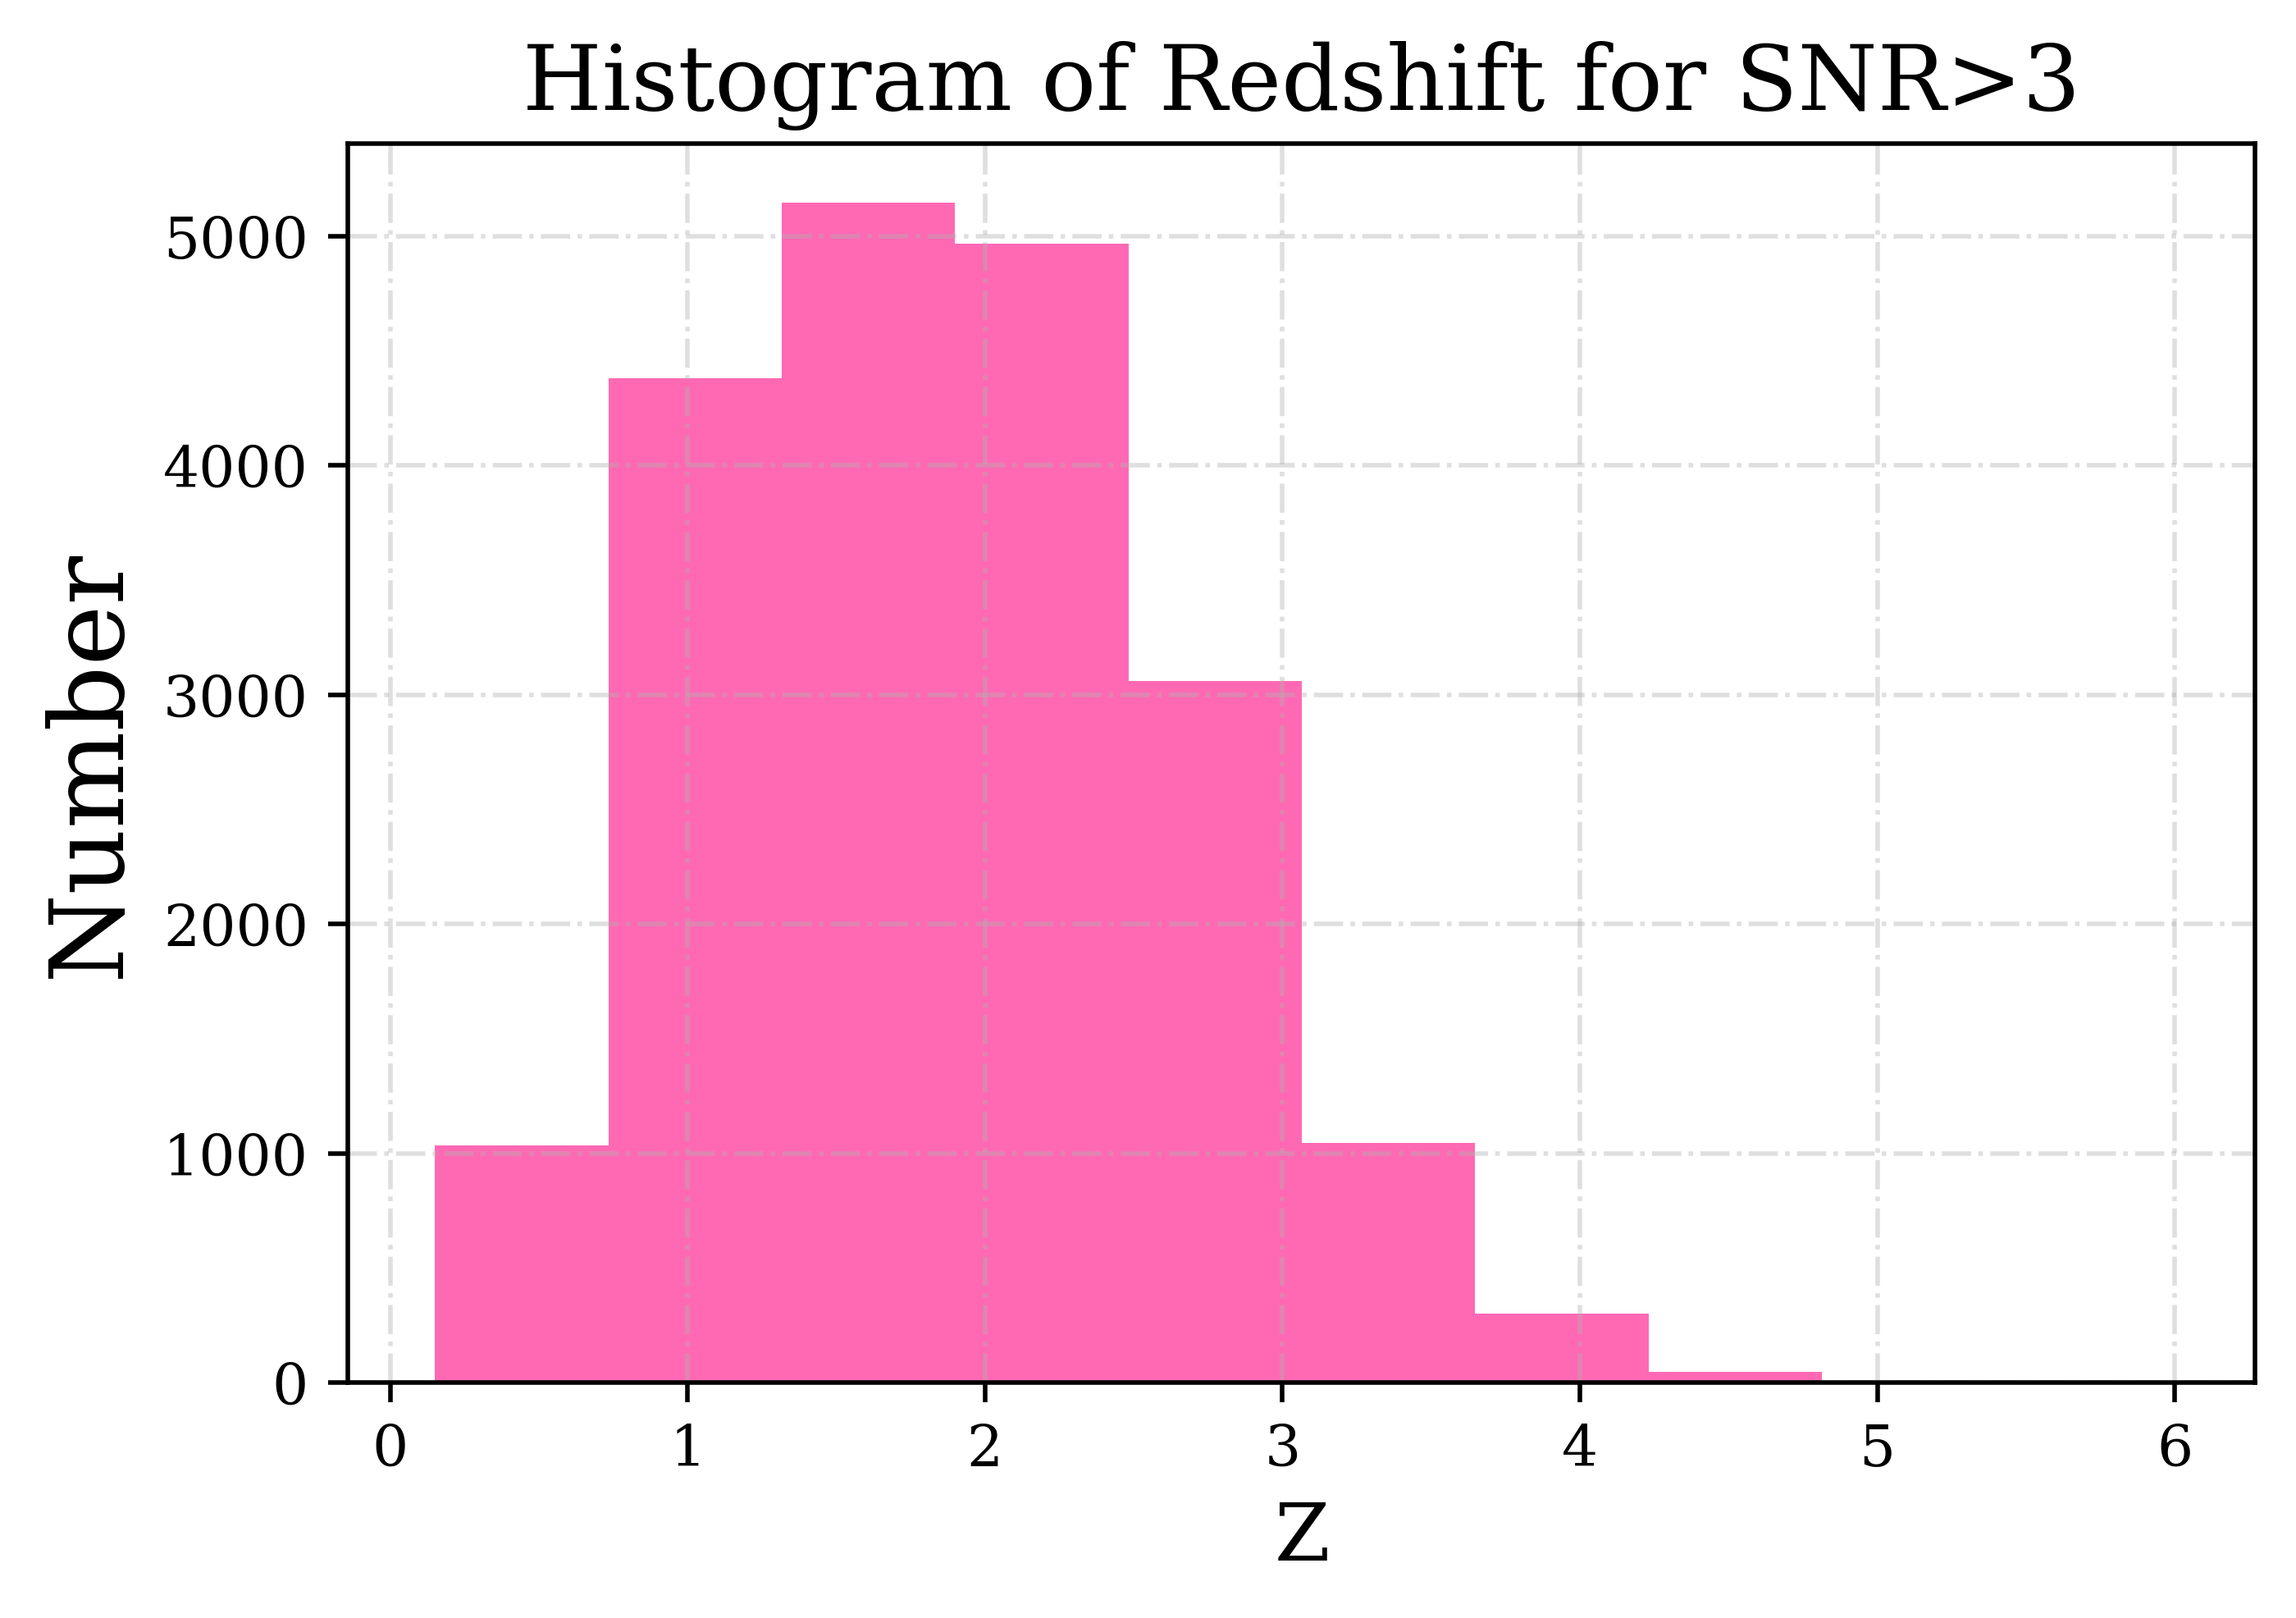

In [80]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>3',fontsize=16)
plt.xlabel(r'Z',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked3['Z'], color='hotpink')

plt.show()

In [81]:
len(h_masked)

21638

In [82]:
len(h_masked2)

21135

In [83]:
len(h_masked3)

20001

#### Density of quasars for each cut:

In [64]:
len(h_masked)/((max(h_masked['RA'])-min(h_masked['RA']))*(max(h_masked['DEC'])-min(h_masked['DEC'])))

97.60382885773211

In [65]:
len(h_masked2)/((max(h_masked2['RA'])-min(h_masked2['RA']))*(max(h_masked2['DEC'])-min(h_masked2['DEC'])))

95.3349164852652

In [66]:
len(h_masked3)/((max(h_masked3['RA'])-min(h_masked3['RA']))*(max(h_masked3['DEC'])-min(h_masked3['DEC'])))

90.219714436801

Cut 2 should be chosen.

#### Histograms for SNR cuts:

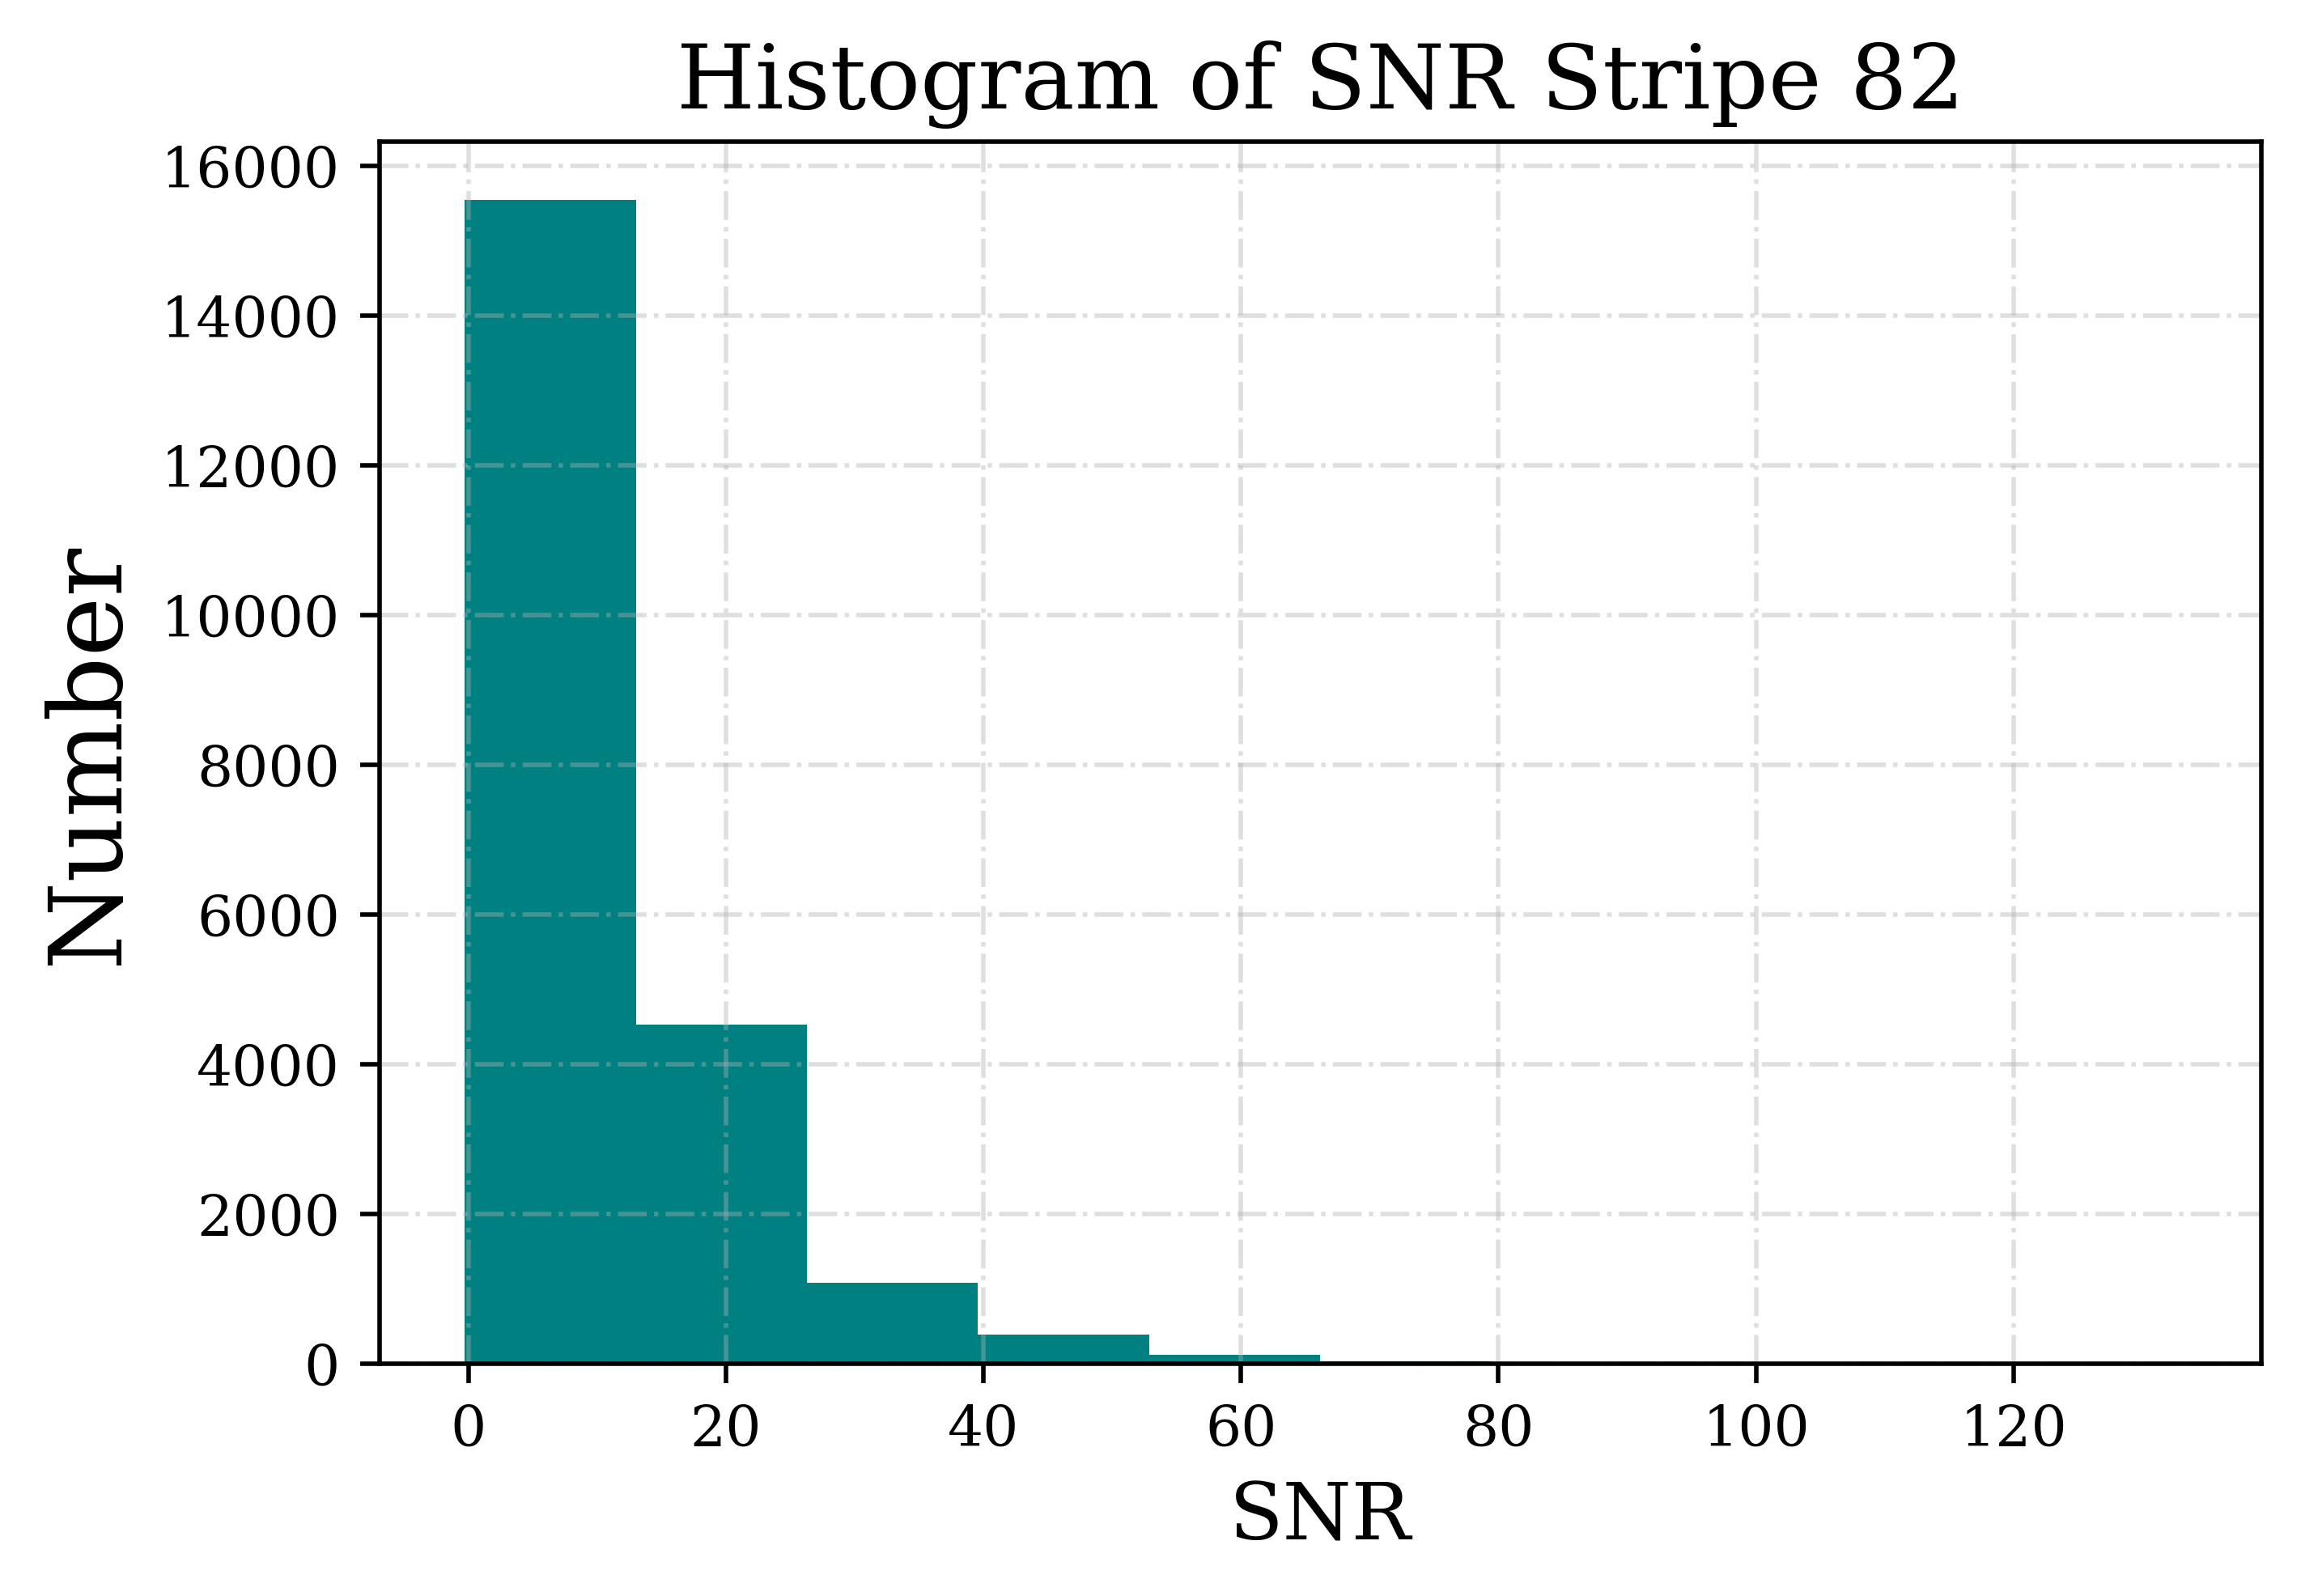

In [118]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of SNR Stripe 82',fontsize=16)
plt.xlabel(r'SNR',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(hdata['SNR_LYA'][(hdata['SNR_LYA']>-.5 )], color='teal')

plt.show()

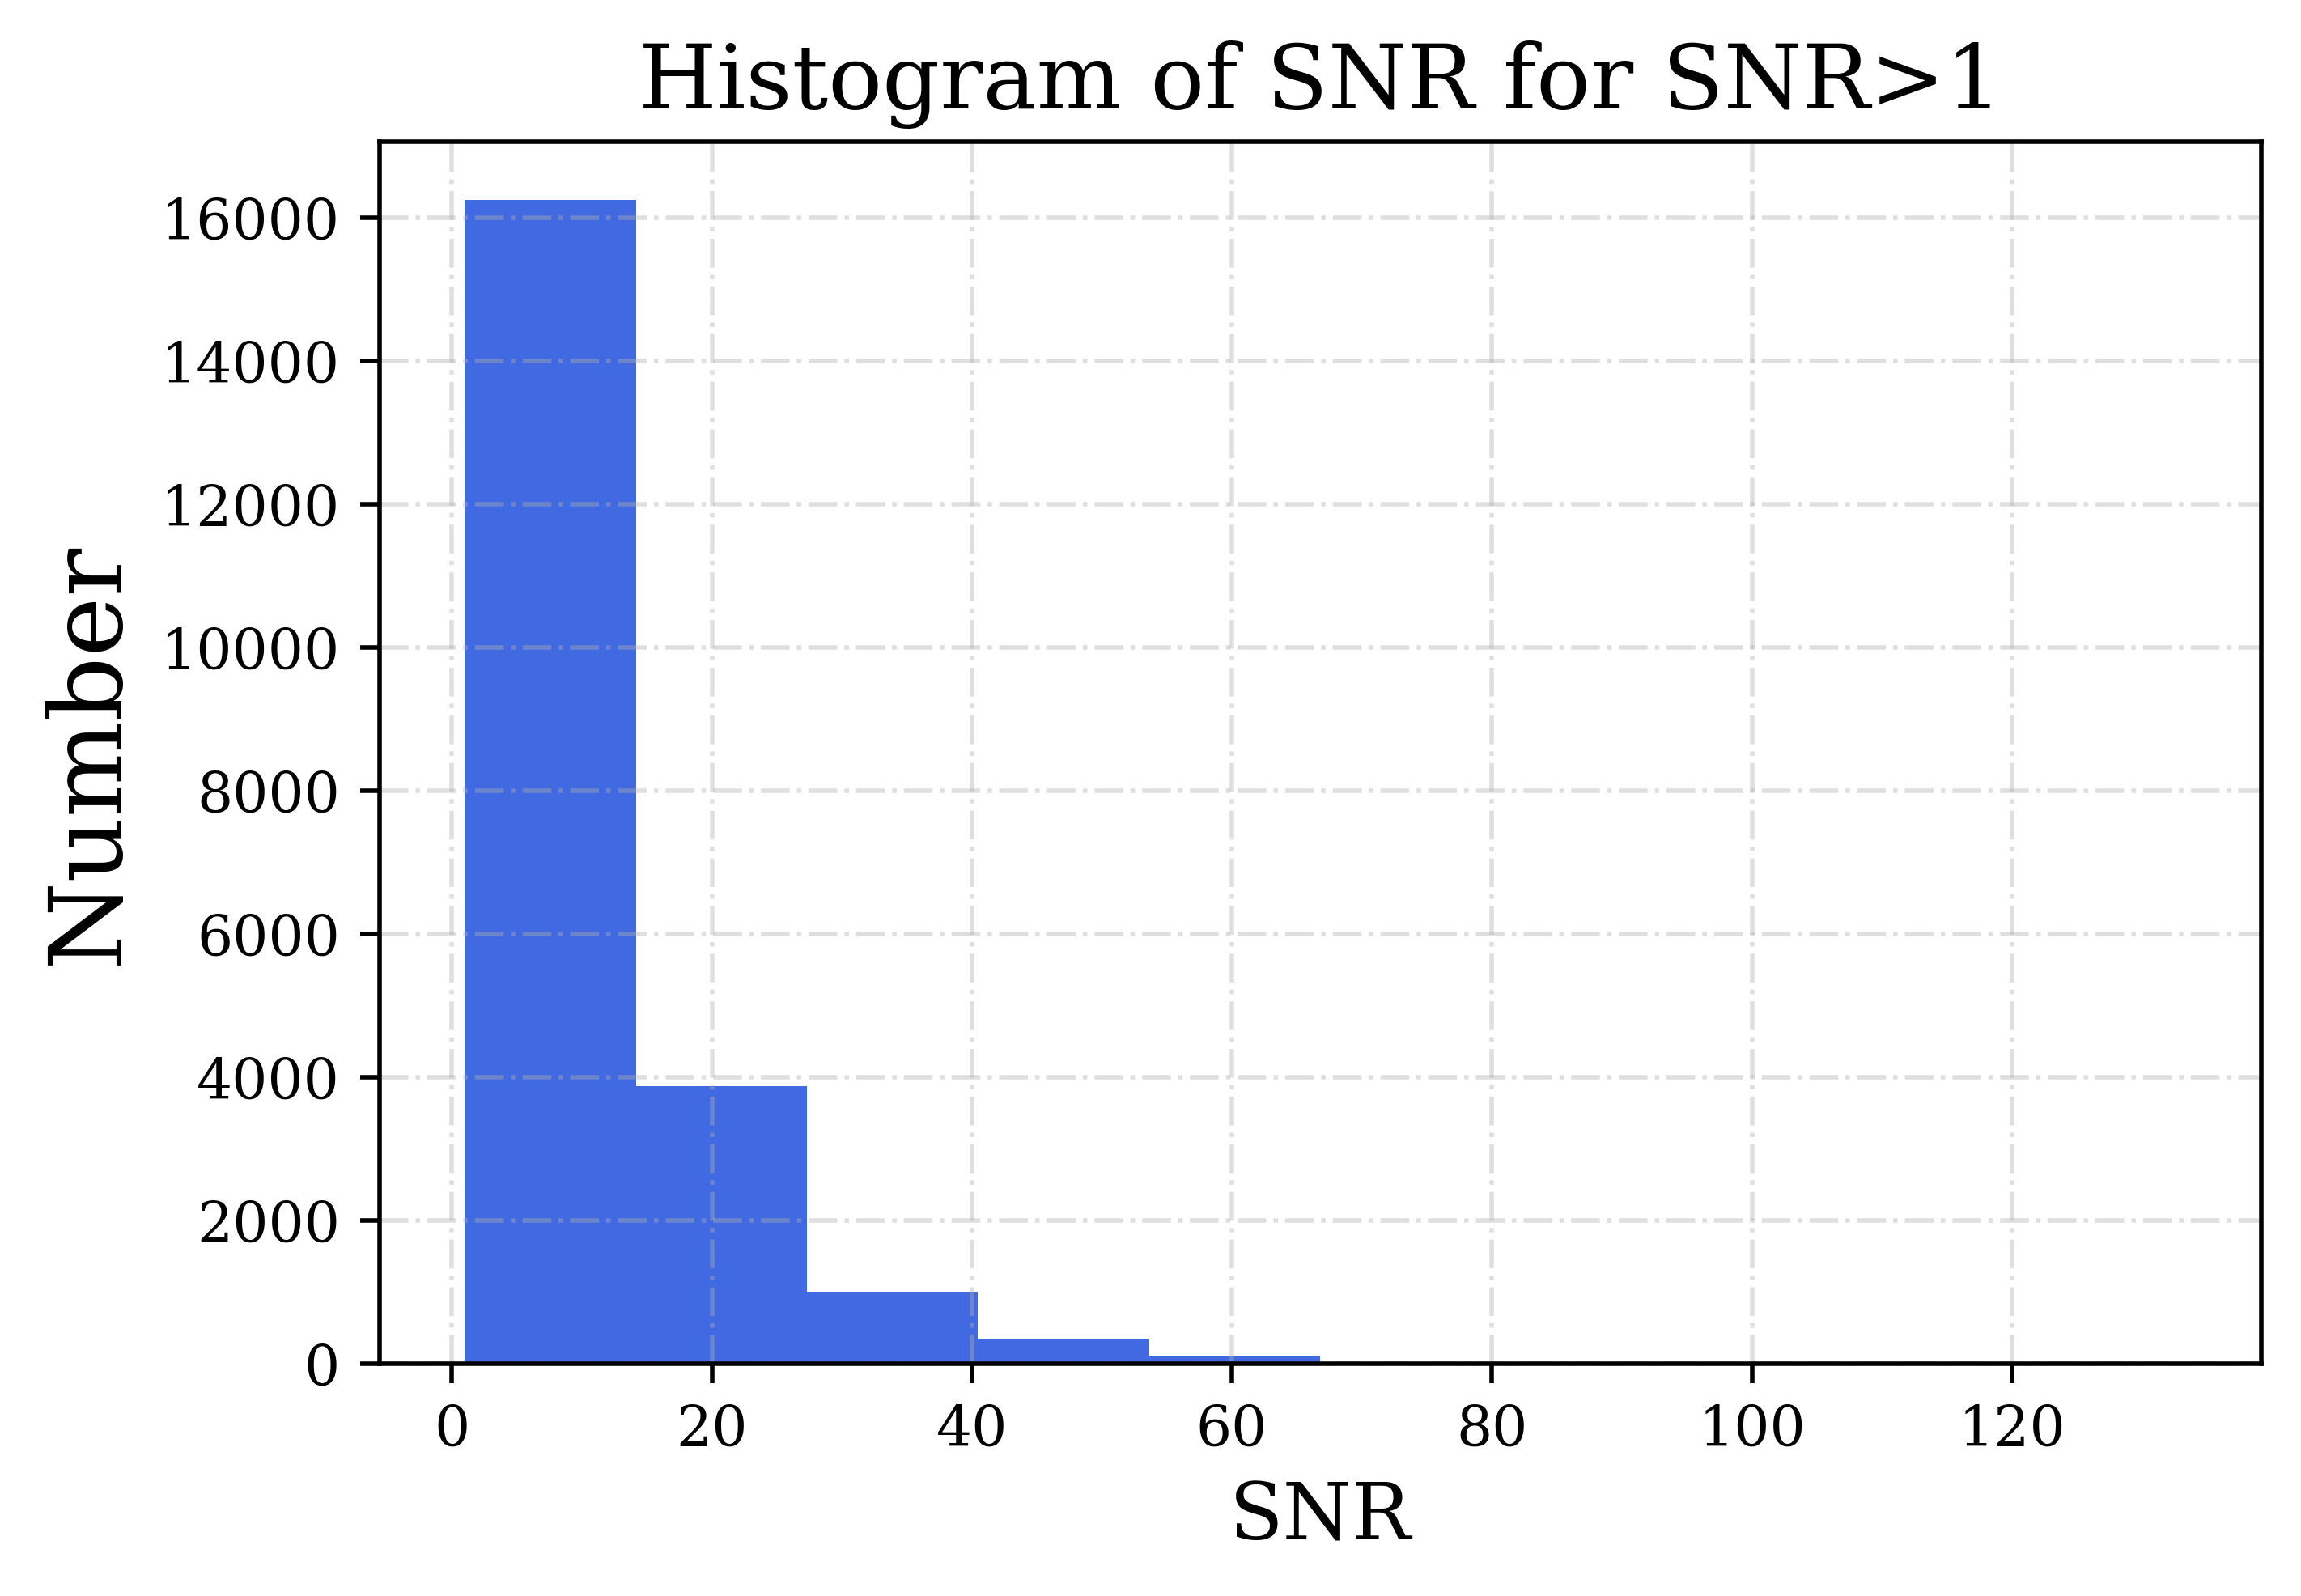

In [99]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of SNR for SNR>1',fontsize=16)
plt.xlabel(r'SNR',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked['SNR_LYA'], color='royalblue')

plt.show()

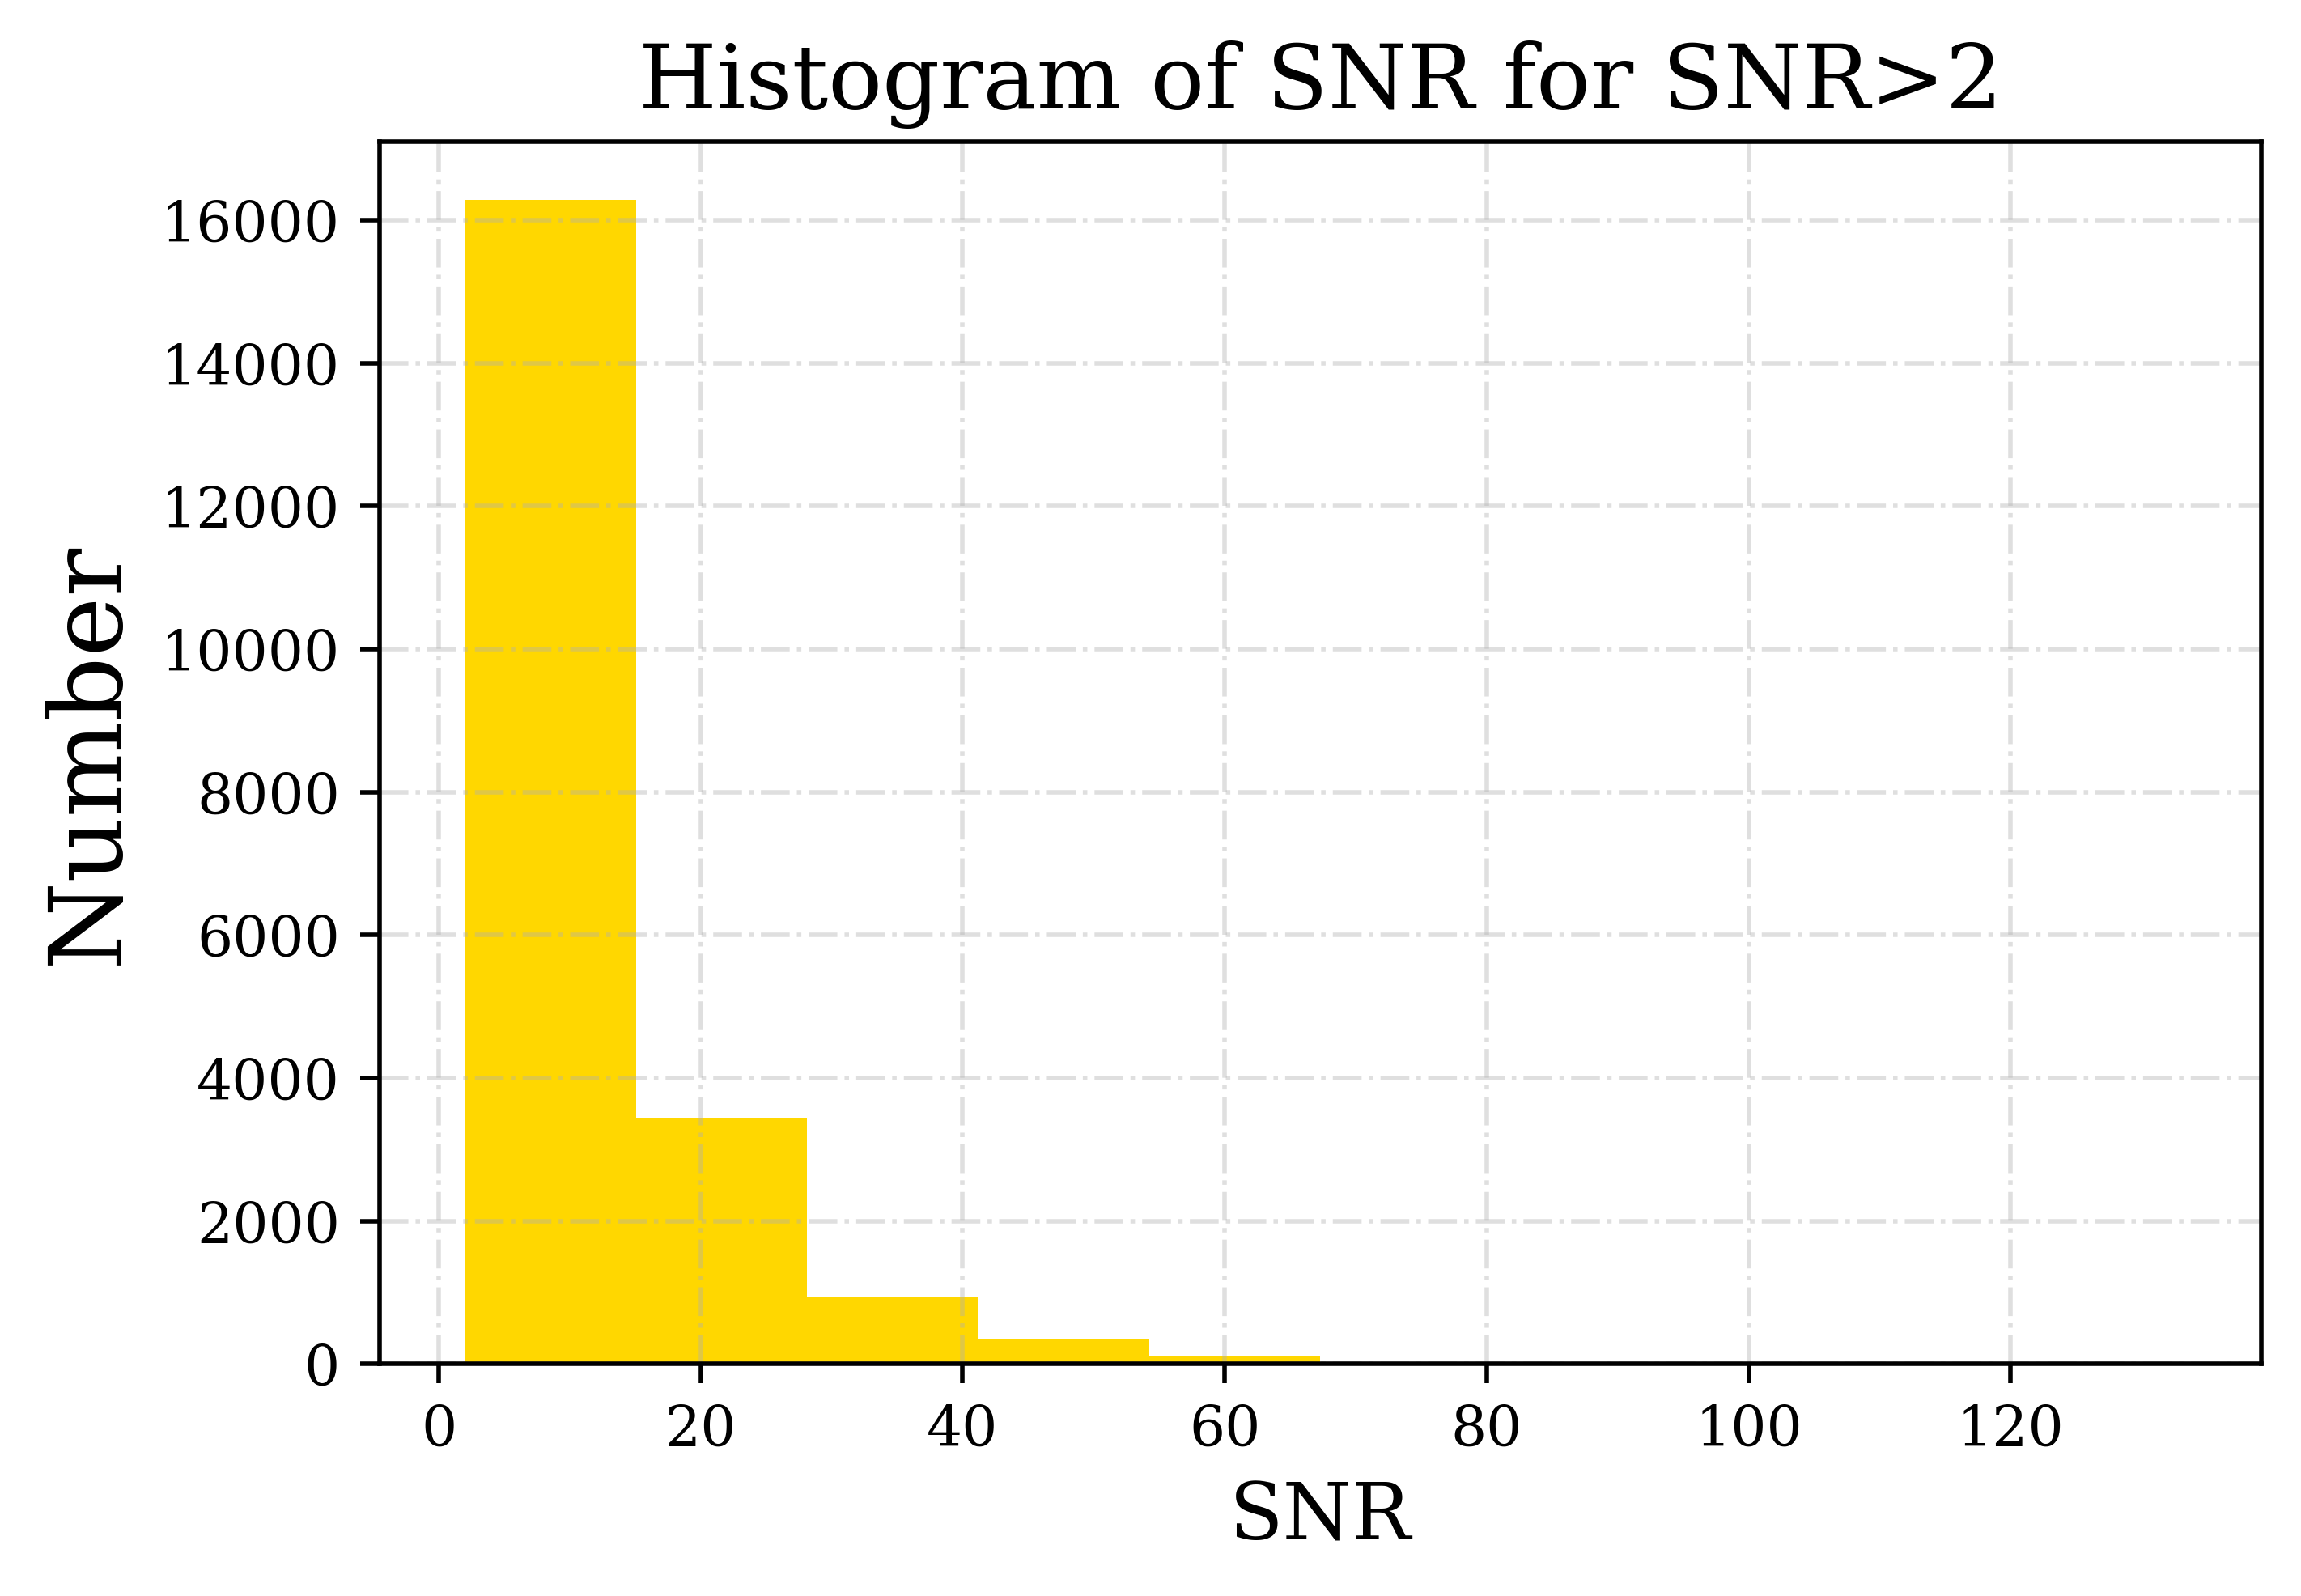

In [100]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of SNR for SNR>2',fontsize=16)
plt.xlabel(r'SNR',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked2['SNR_LYA'], color='gold')

plt.show()

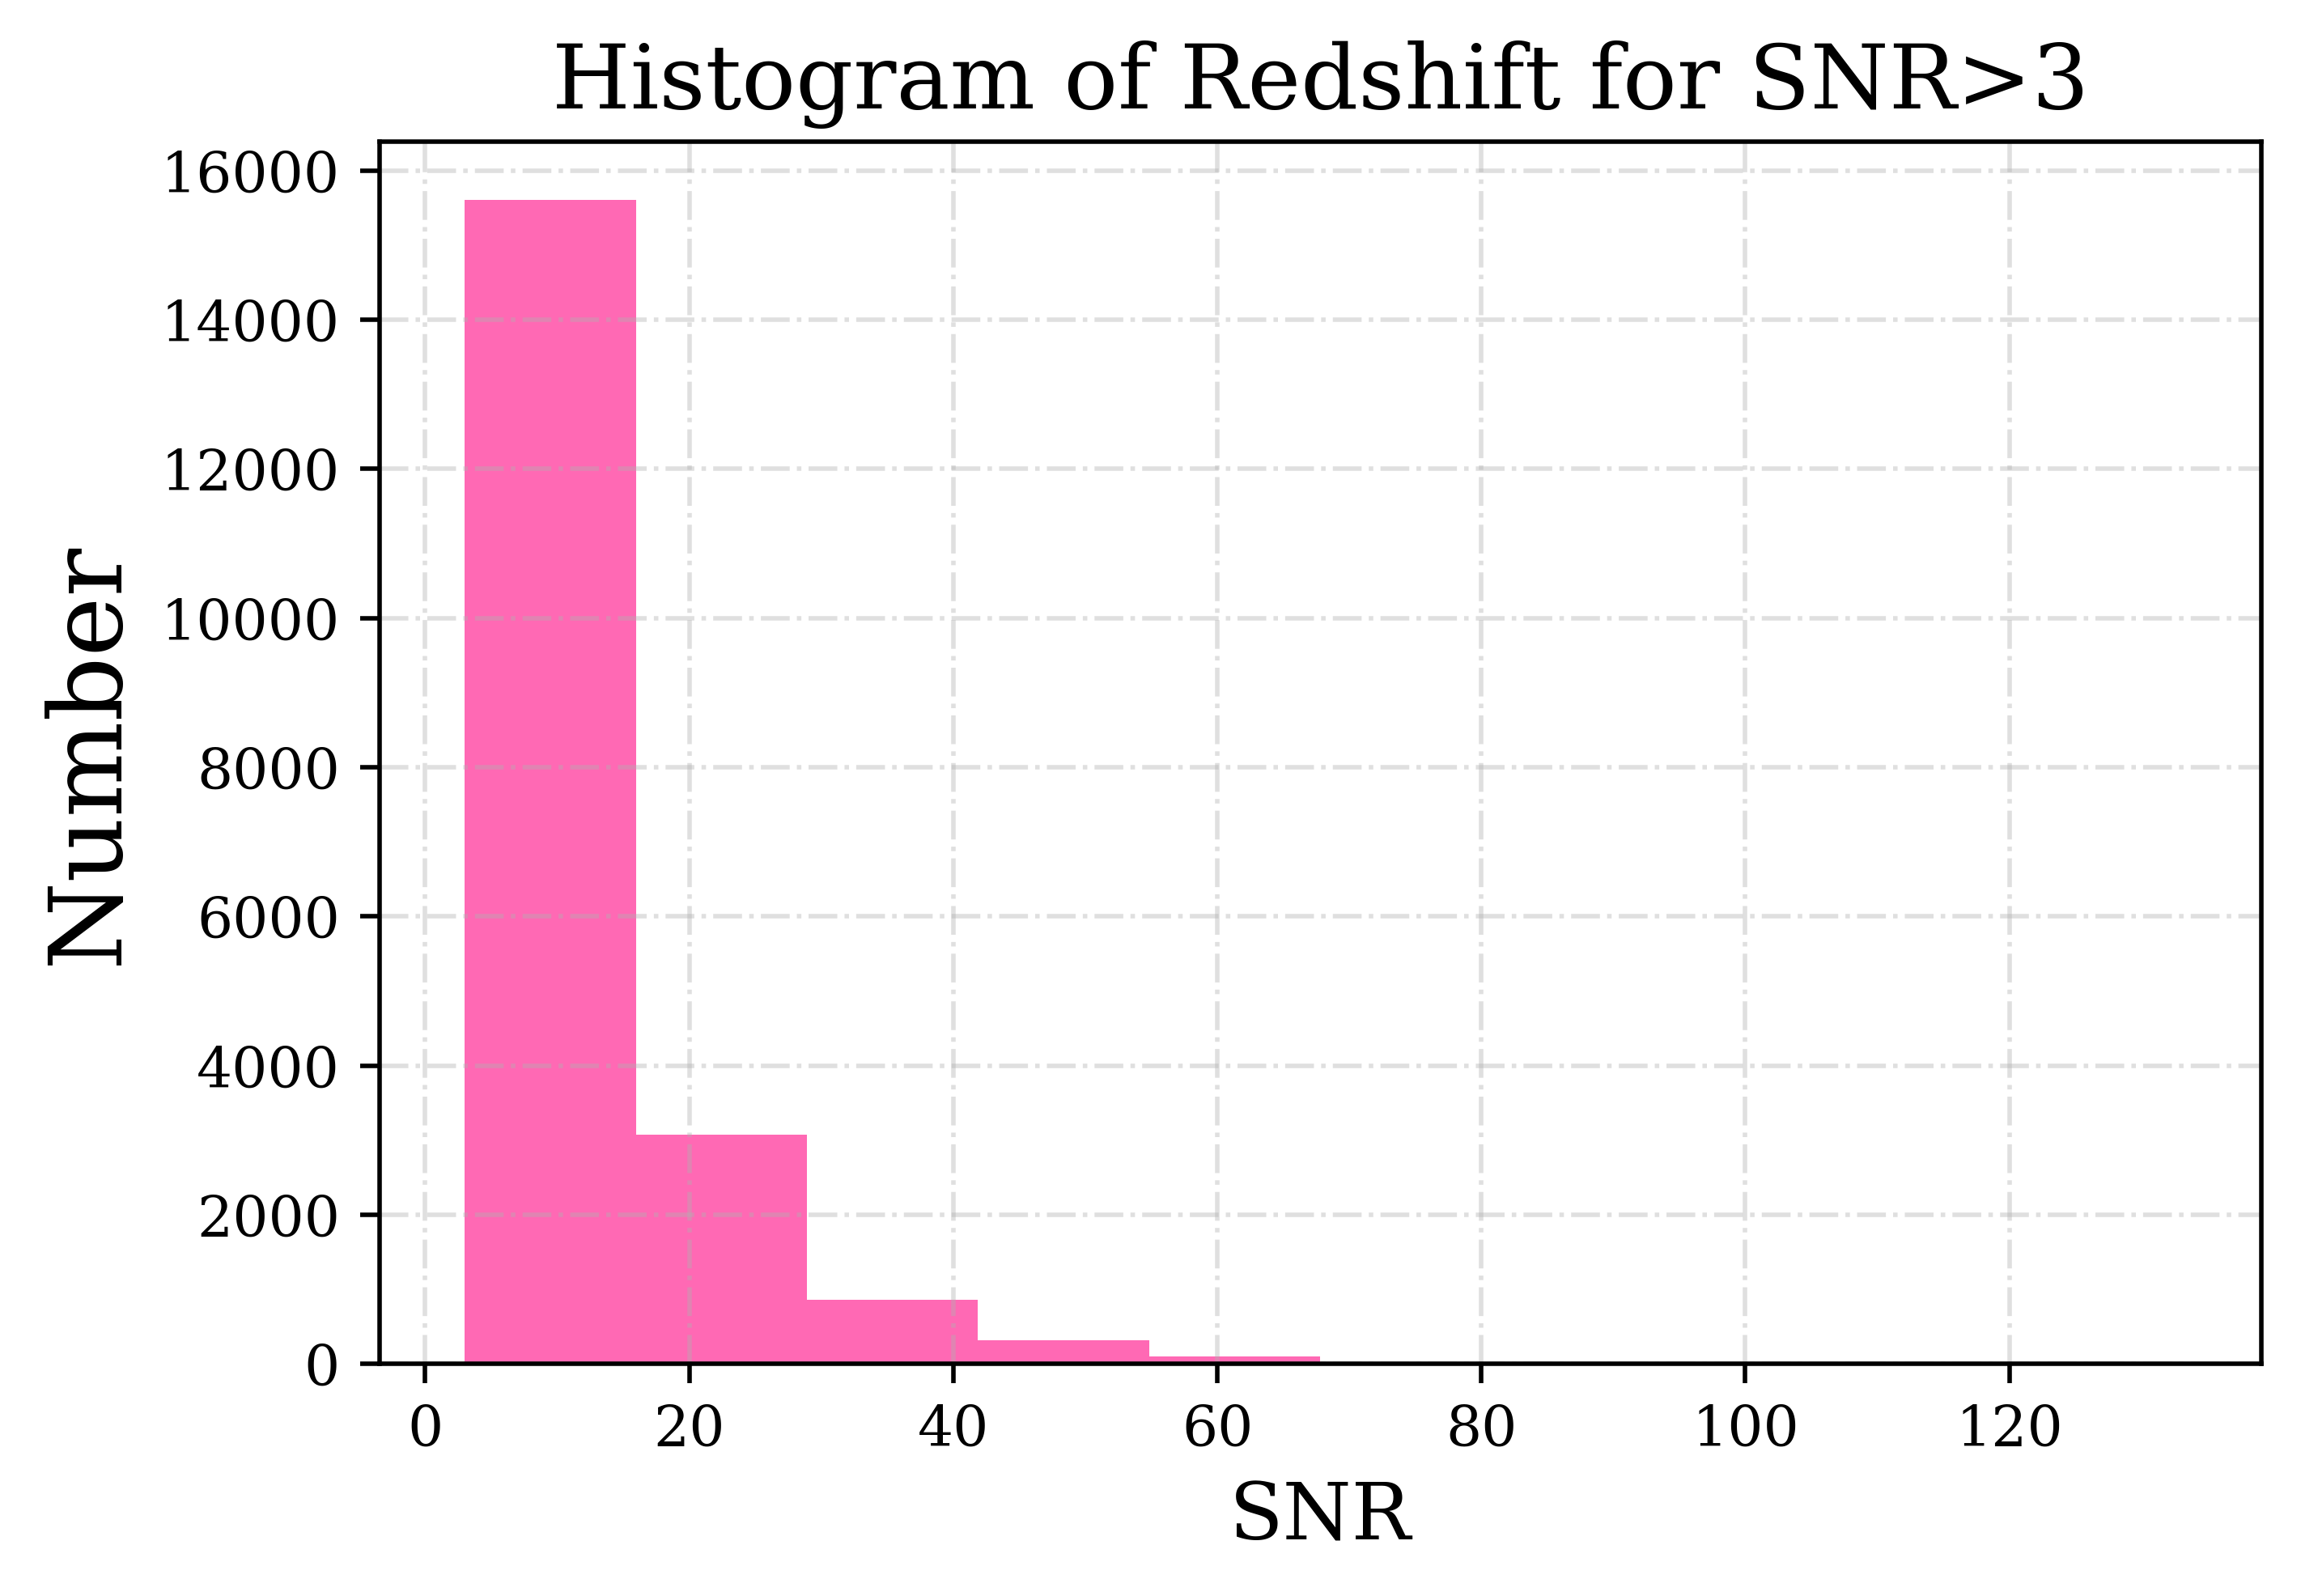

In [101]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Redshift for SNR>3',fontsize=16)
plt.xlabel(r'SNR',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(h_masked3['SNR_LYA'], color='hotpink')

plt.show()

#### SNR vs Z plots:

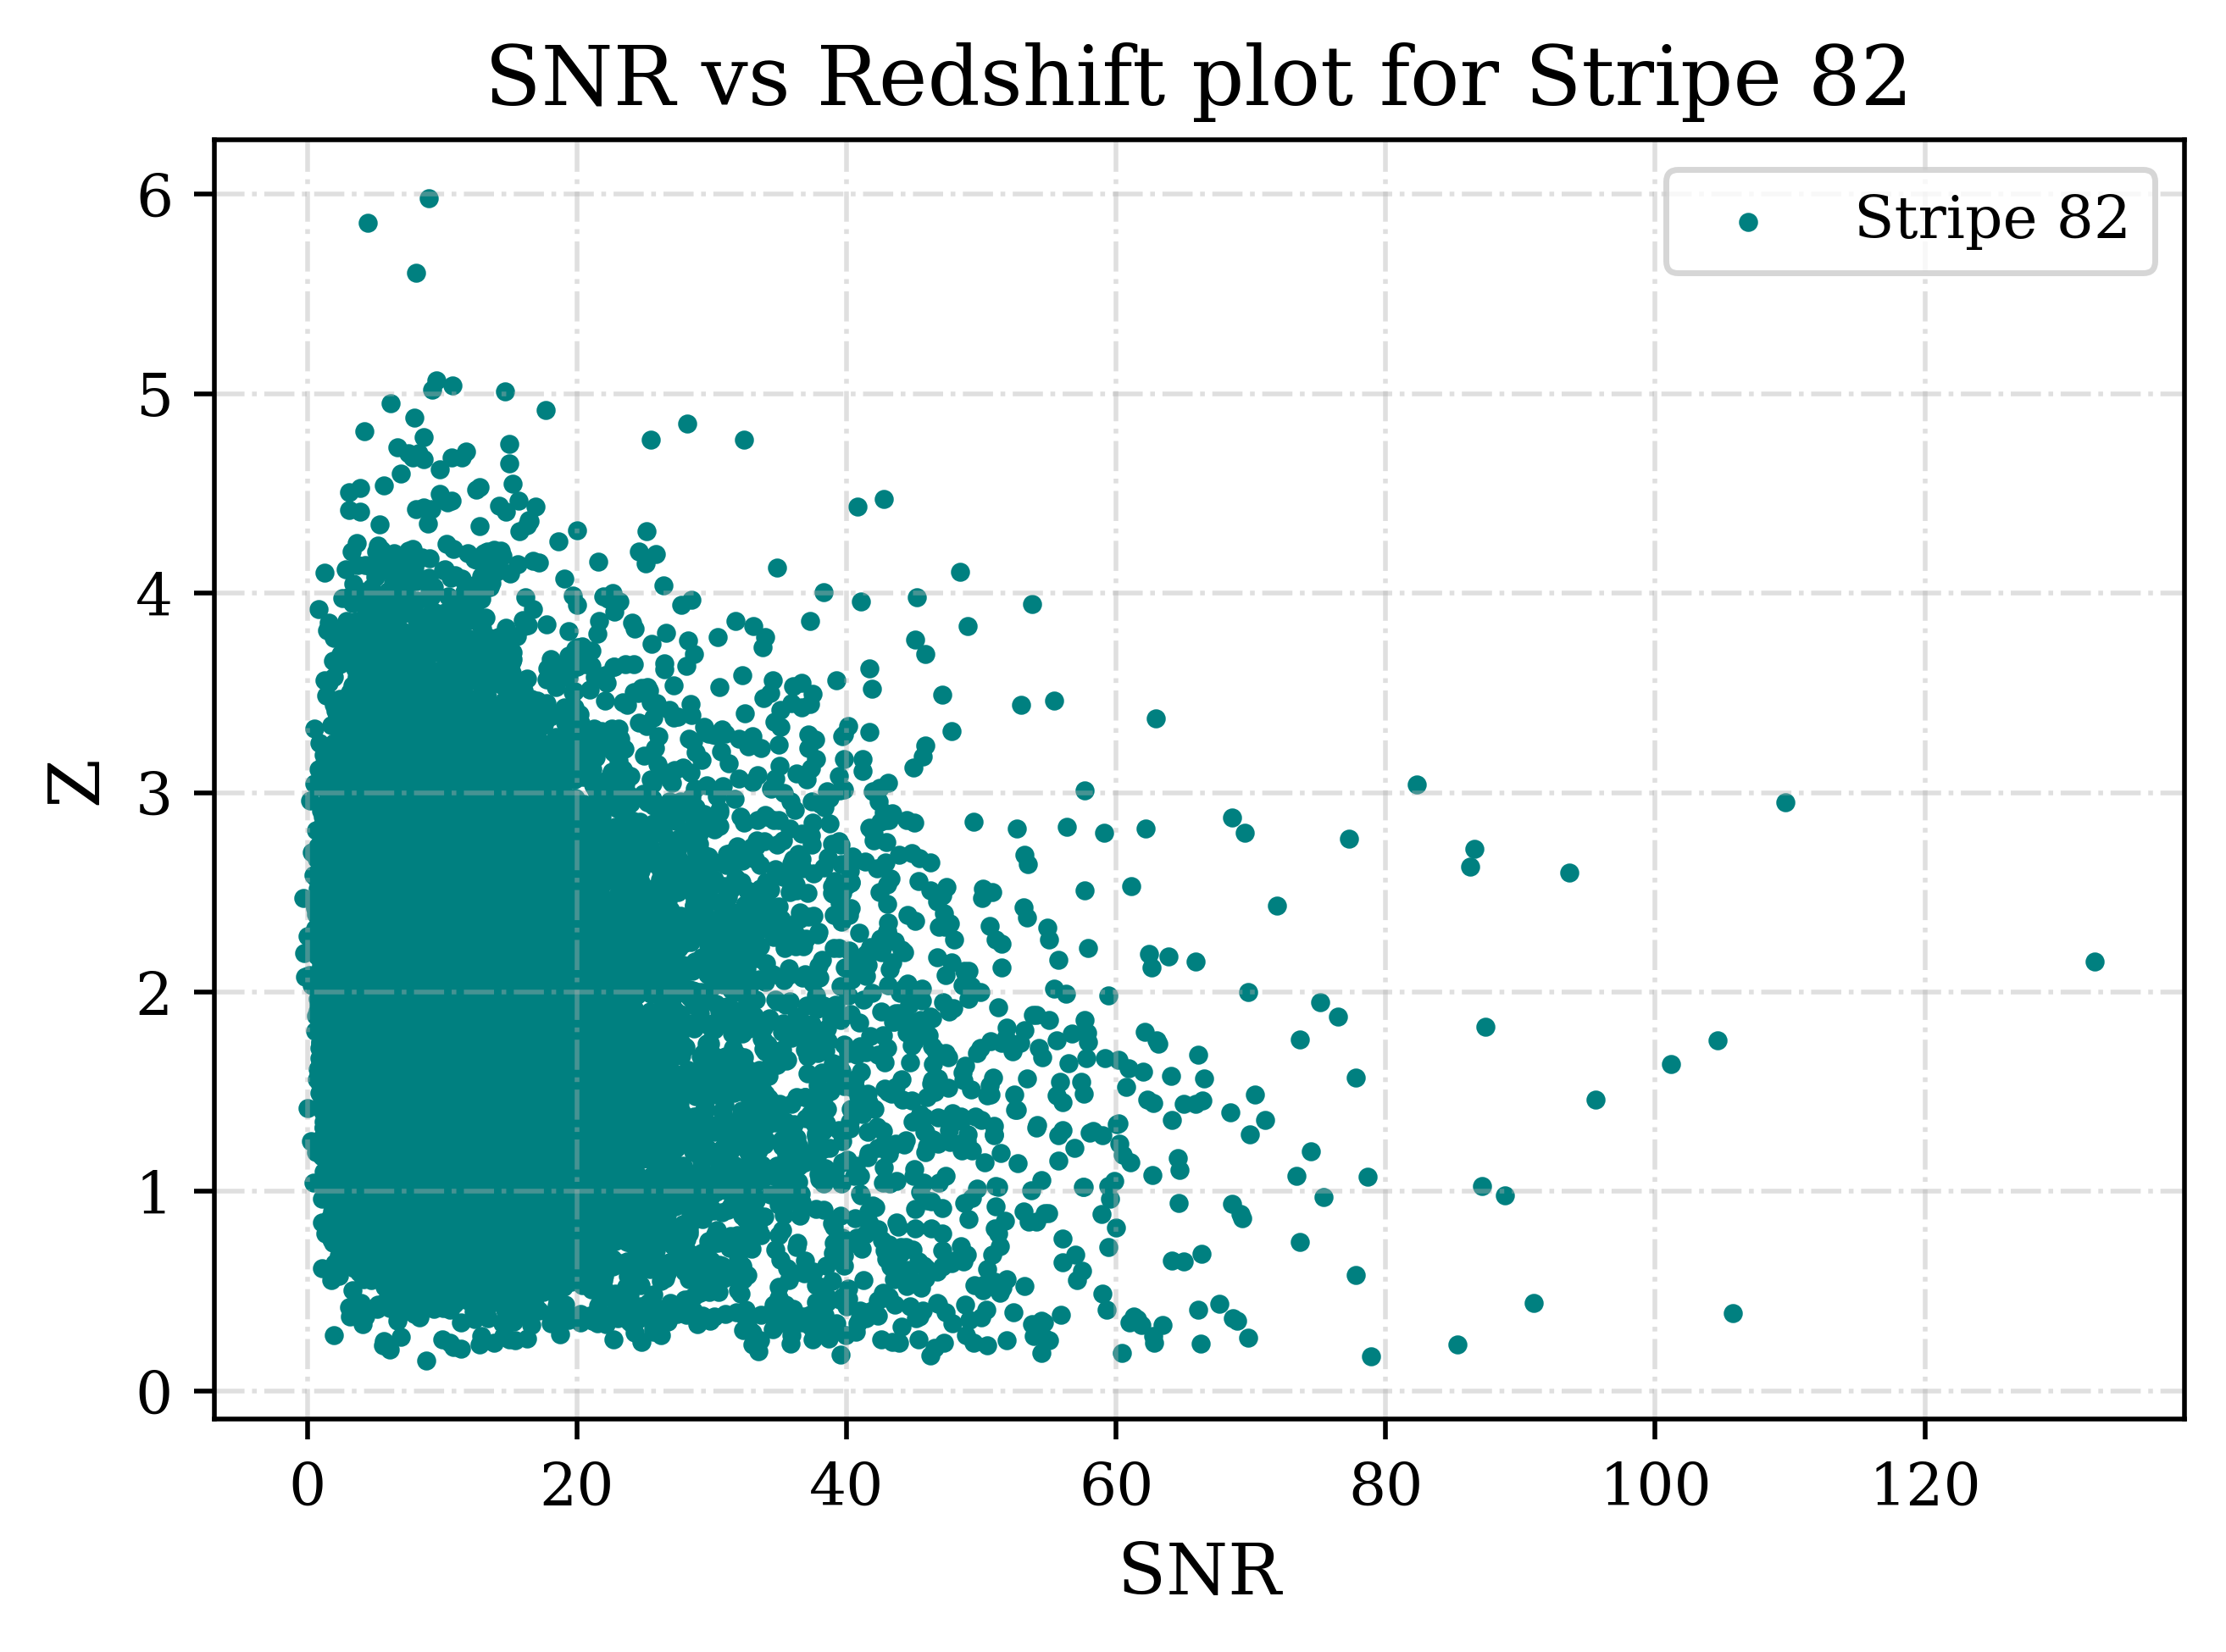

In [120]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'SNR vs Redshift plot for Stripe 82',fontsize=14)
plt.xlabel(r'SNR',fontsize=12)
plt.ylabel(r'Z',fontsize=12)
plt.scatter(hdata['SNR_LYA'][(hdata['SNR_LYA']>-.5 )],hdata['Z'][(hdata['SNR_LYA']>-.5 )], color='teal', s=5, label='Stripe 82')

plt.legend();
plt.show()

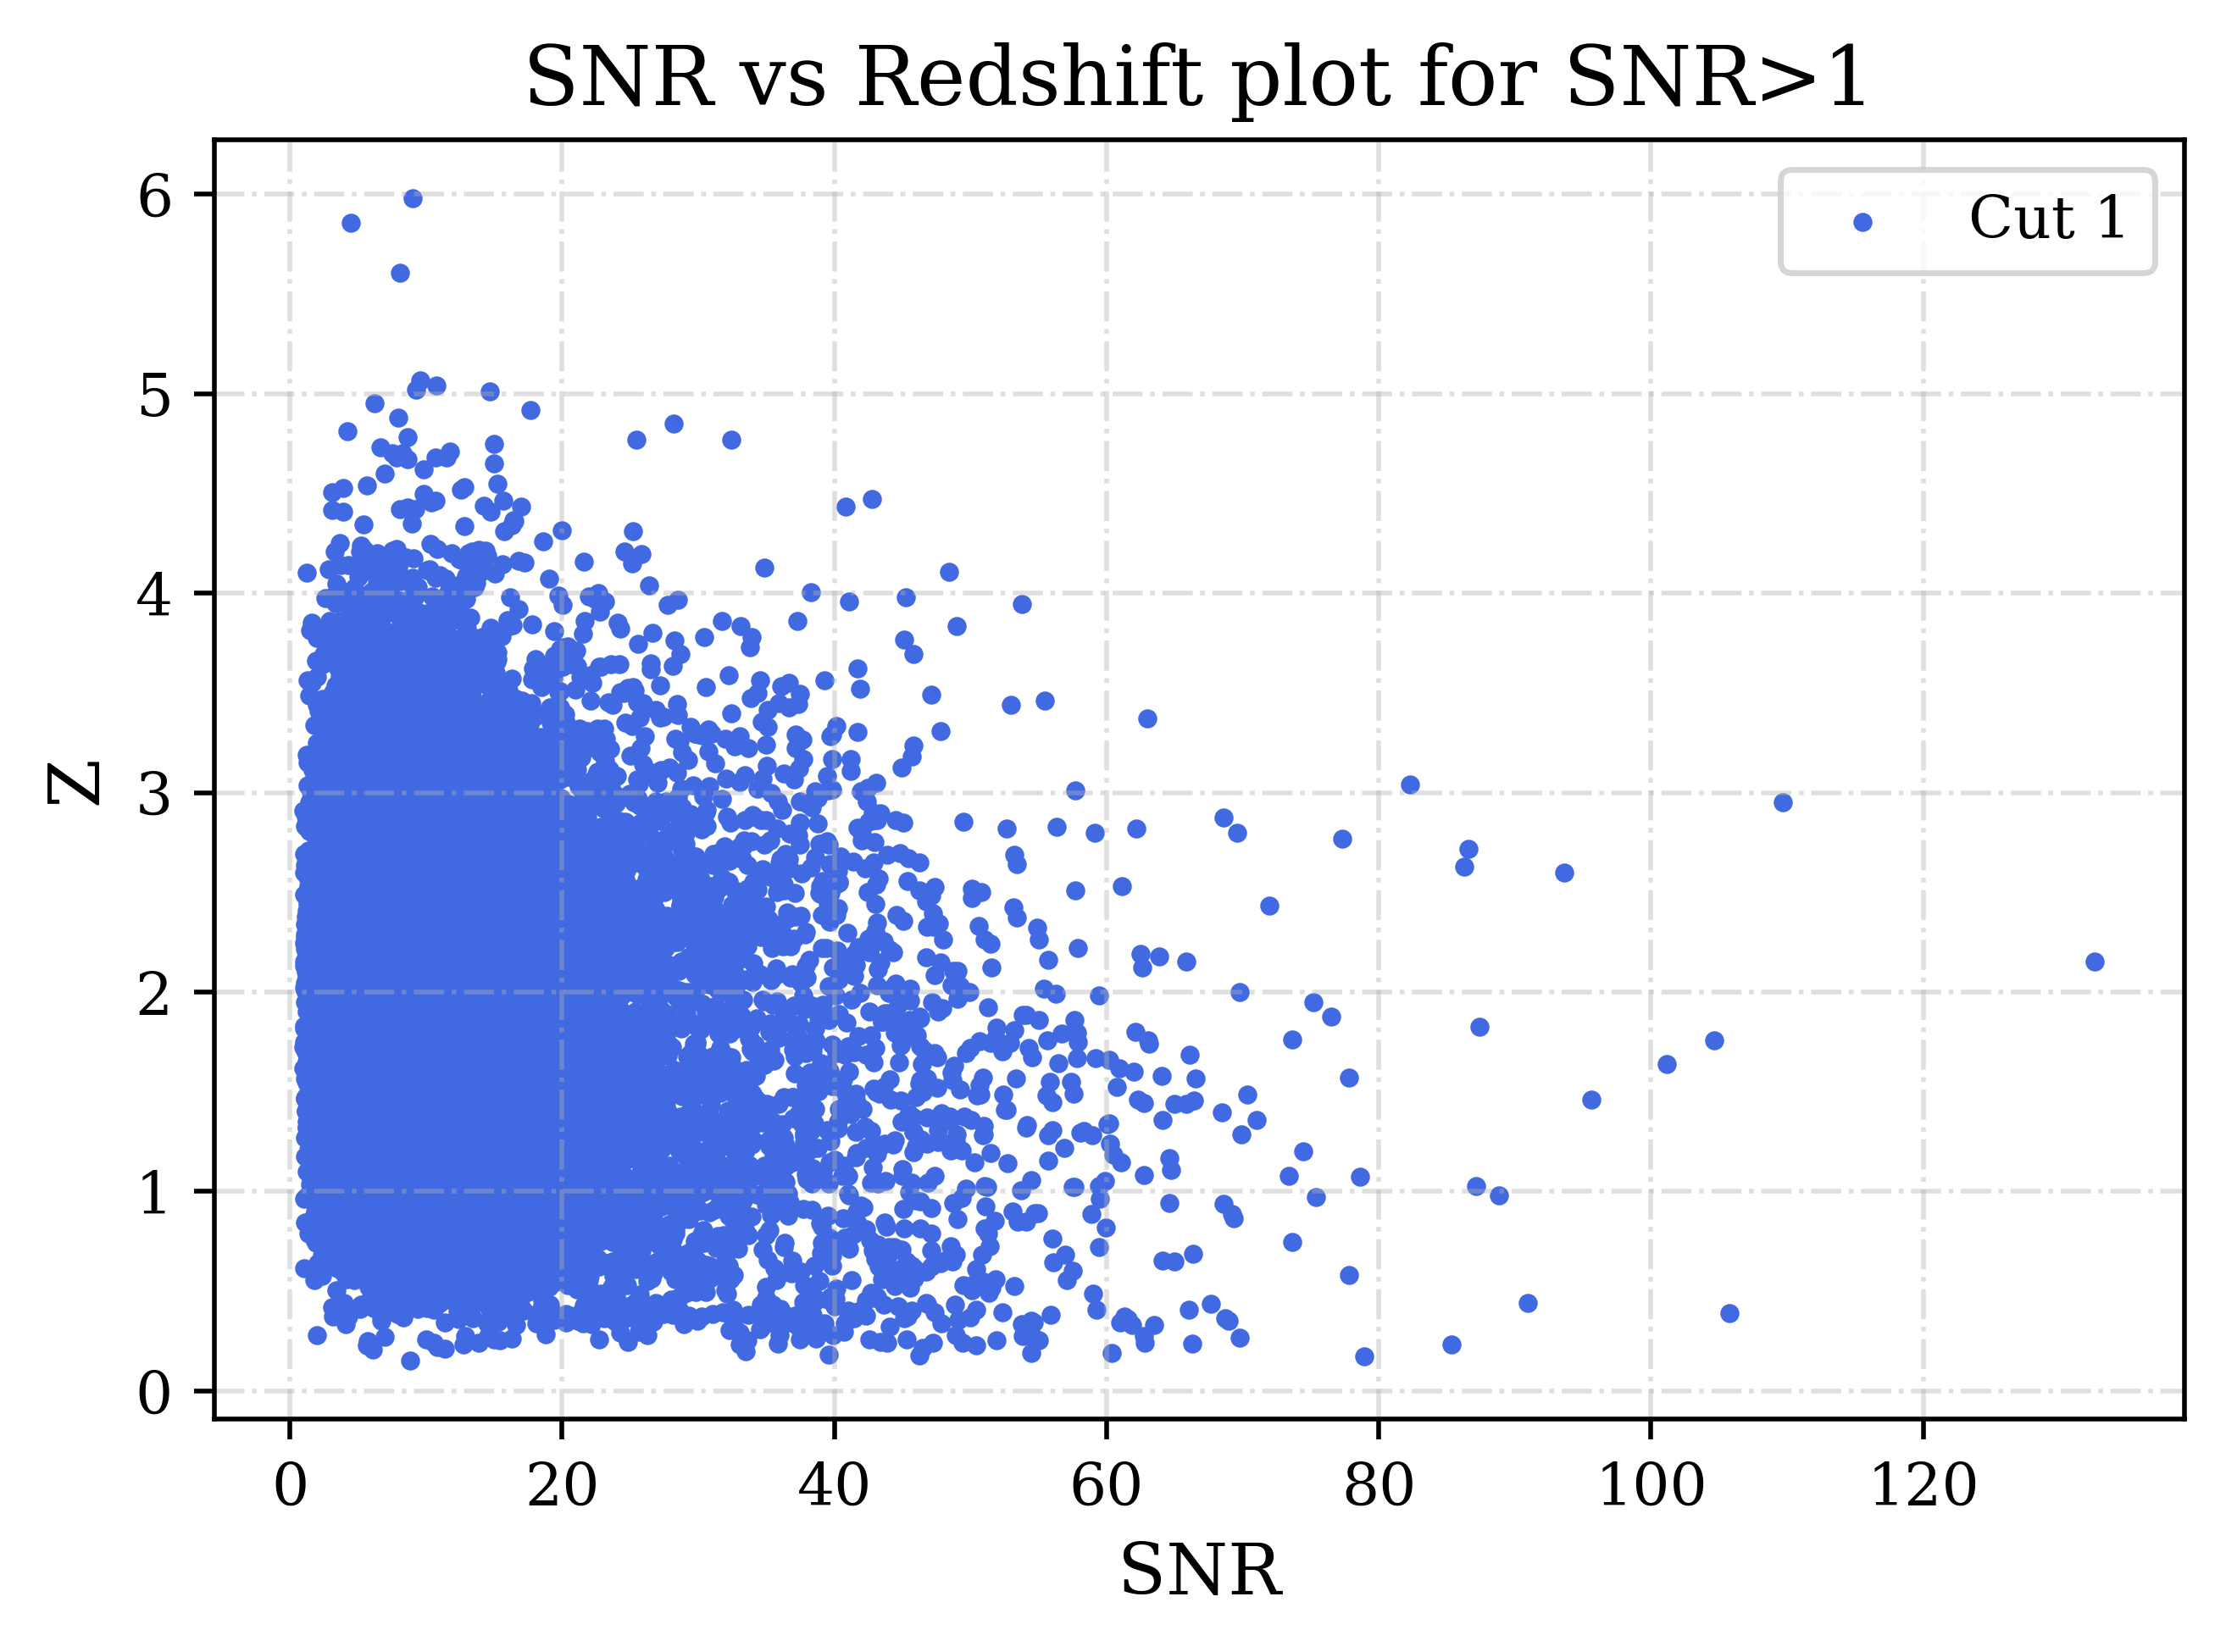

In [106]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'SNR vs Redshift plot for SNR>1',fontsize=14)
plt.xlabel(r'SNR',fontsize=12)
plt.ylabel(r'Z',fontsize=12)
plt.scatter(h_masked['SNR_LYA'],h_masked['Z'], color='royalblue', s=5, label='Cut 1')

plt.legend();
plt.show()

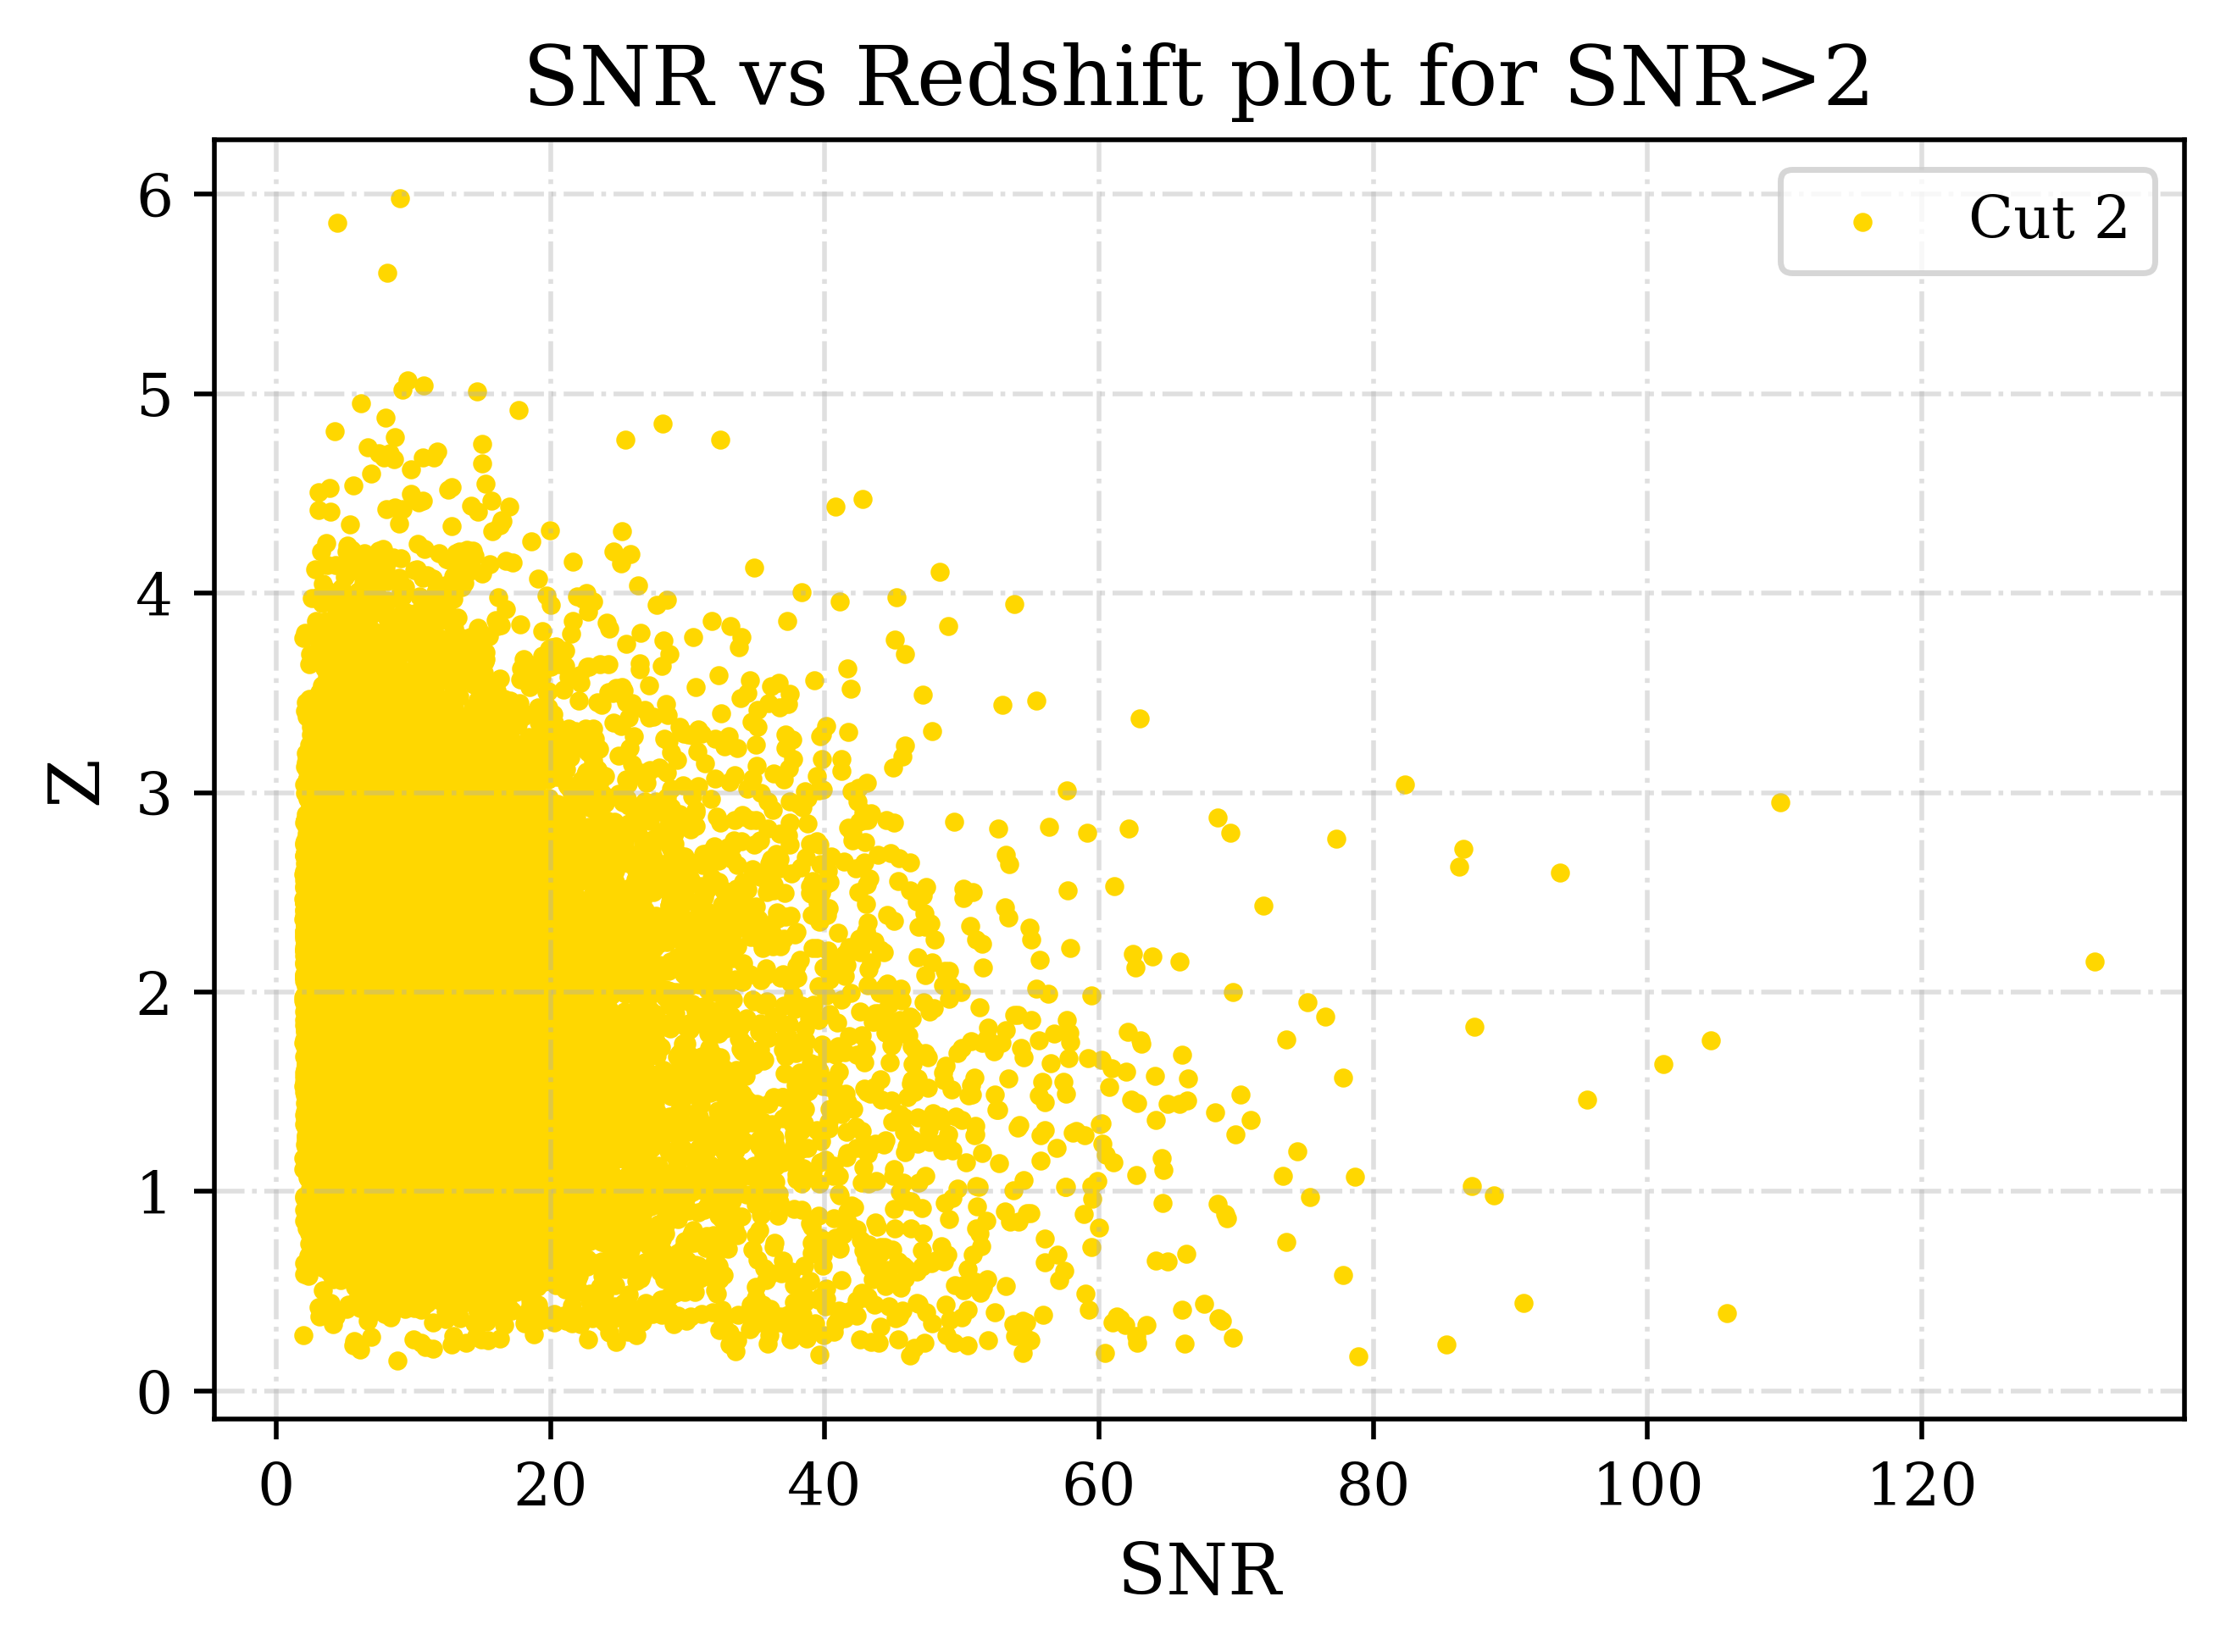

In [111]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'SNR vs Redshift plot for SNR>2',fontsize=14)
plt.xlabel(r'SNR',fontsize=12)
plt.ylabel(r'Z',fontsize=12)
plt.scatter(h_masked2['SNR_LYA'],h_masked2['Z'], color='gold', s=5, label='Cut 2')

plt.legend();
plt.show()

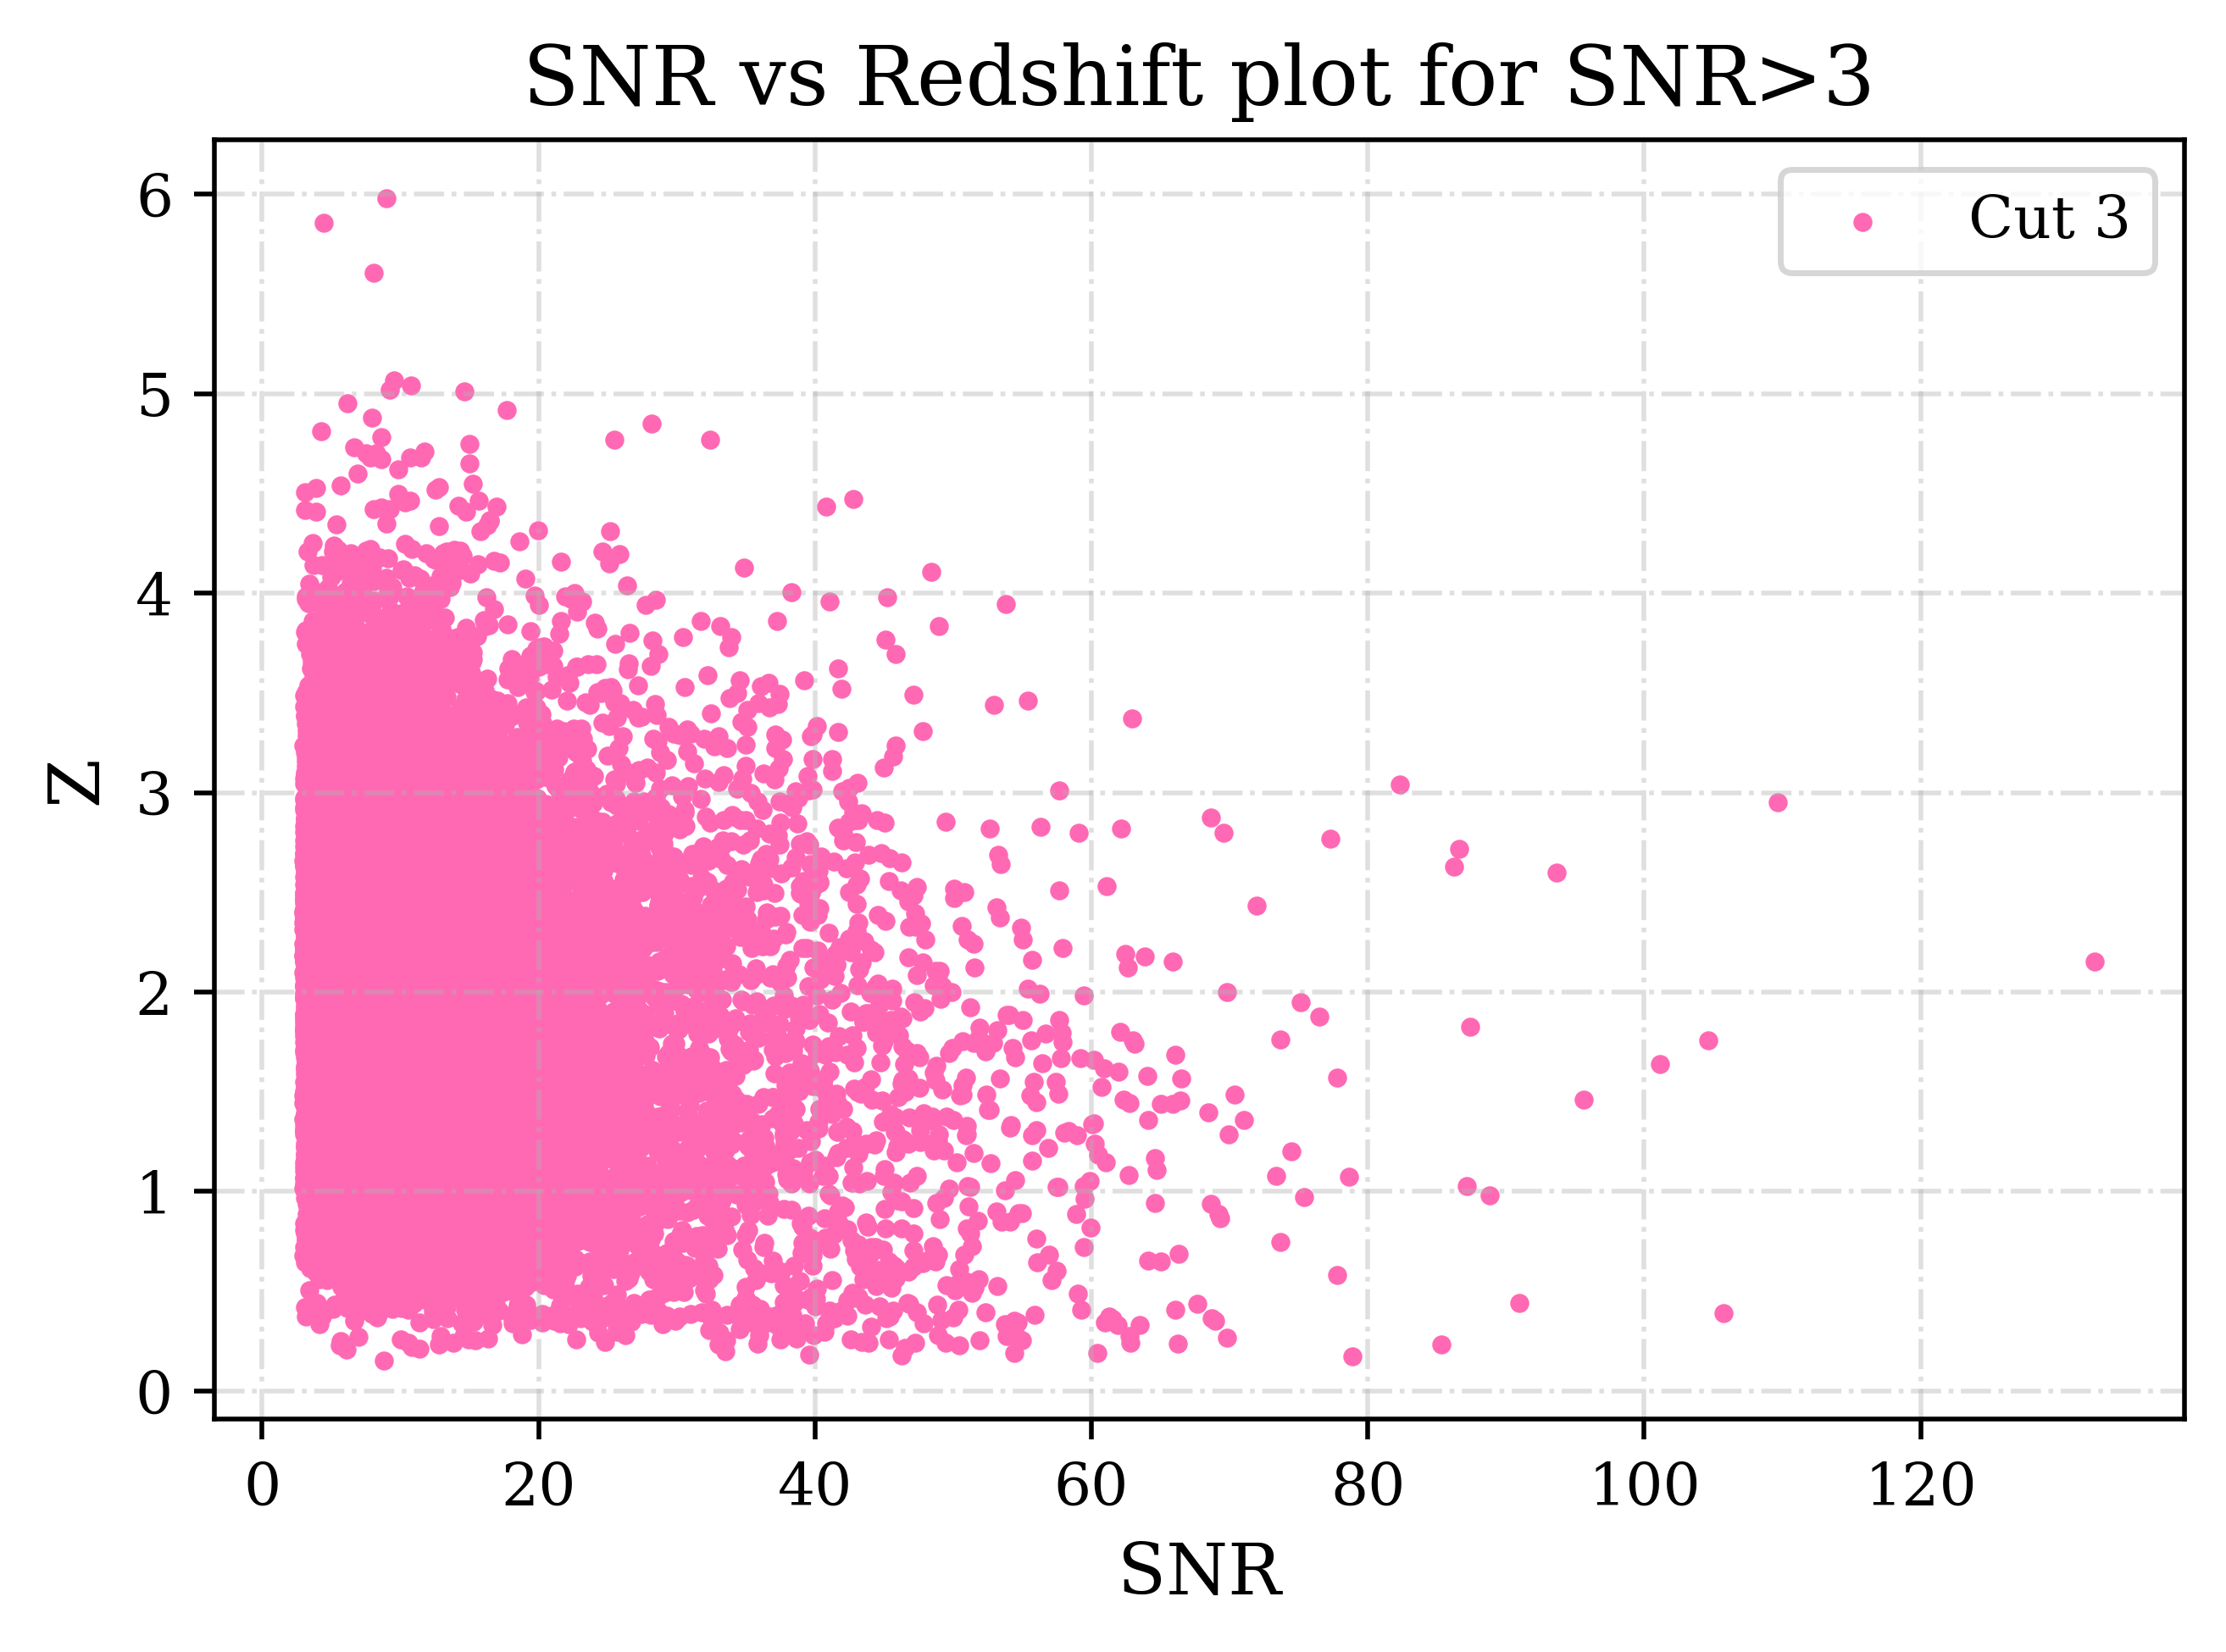

In [108]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'SNR vs Redshift plot for SNR>3',fontsize=14)
plt.xlabel(r'SNR',fontsize=12)
plt.ylabel(r'Z',fontsize=12)
plt.scatter(h_masked3['SNR_LYA'],h_masked3['Z'], color='hotpink', s=5, label='Cut 3')

plt.legend();
plt.show()

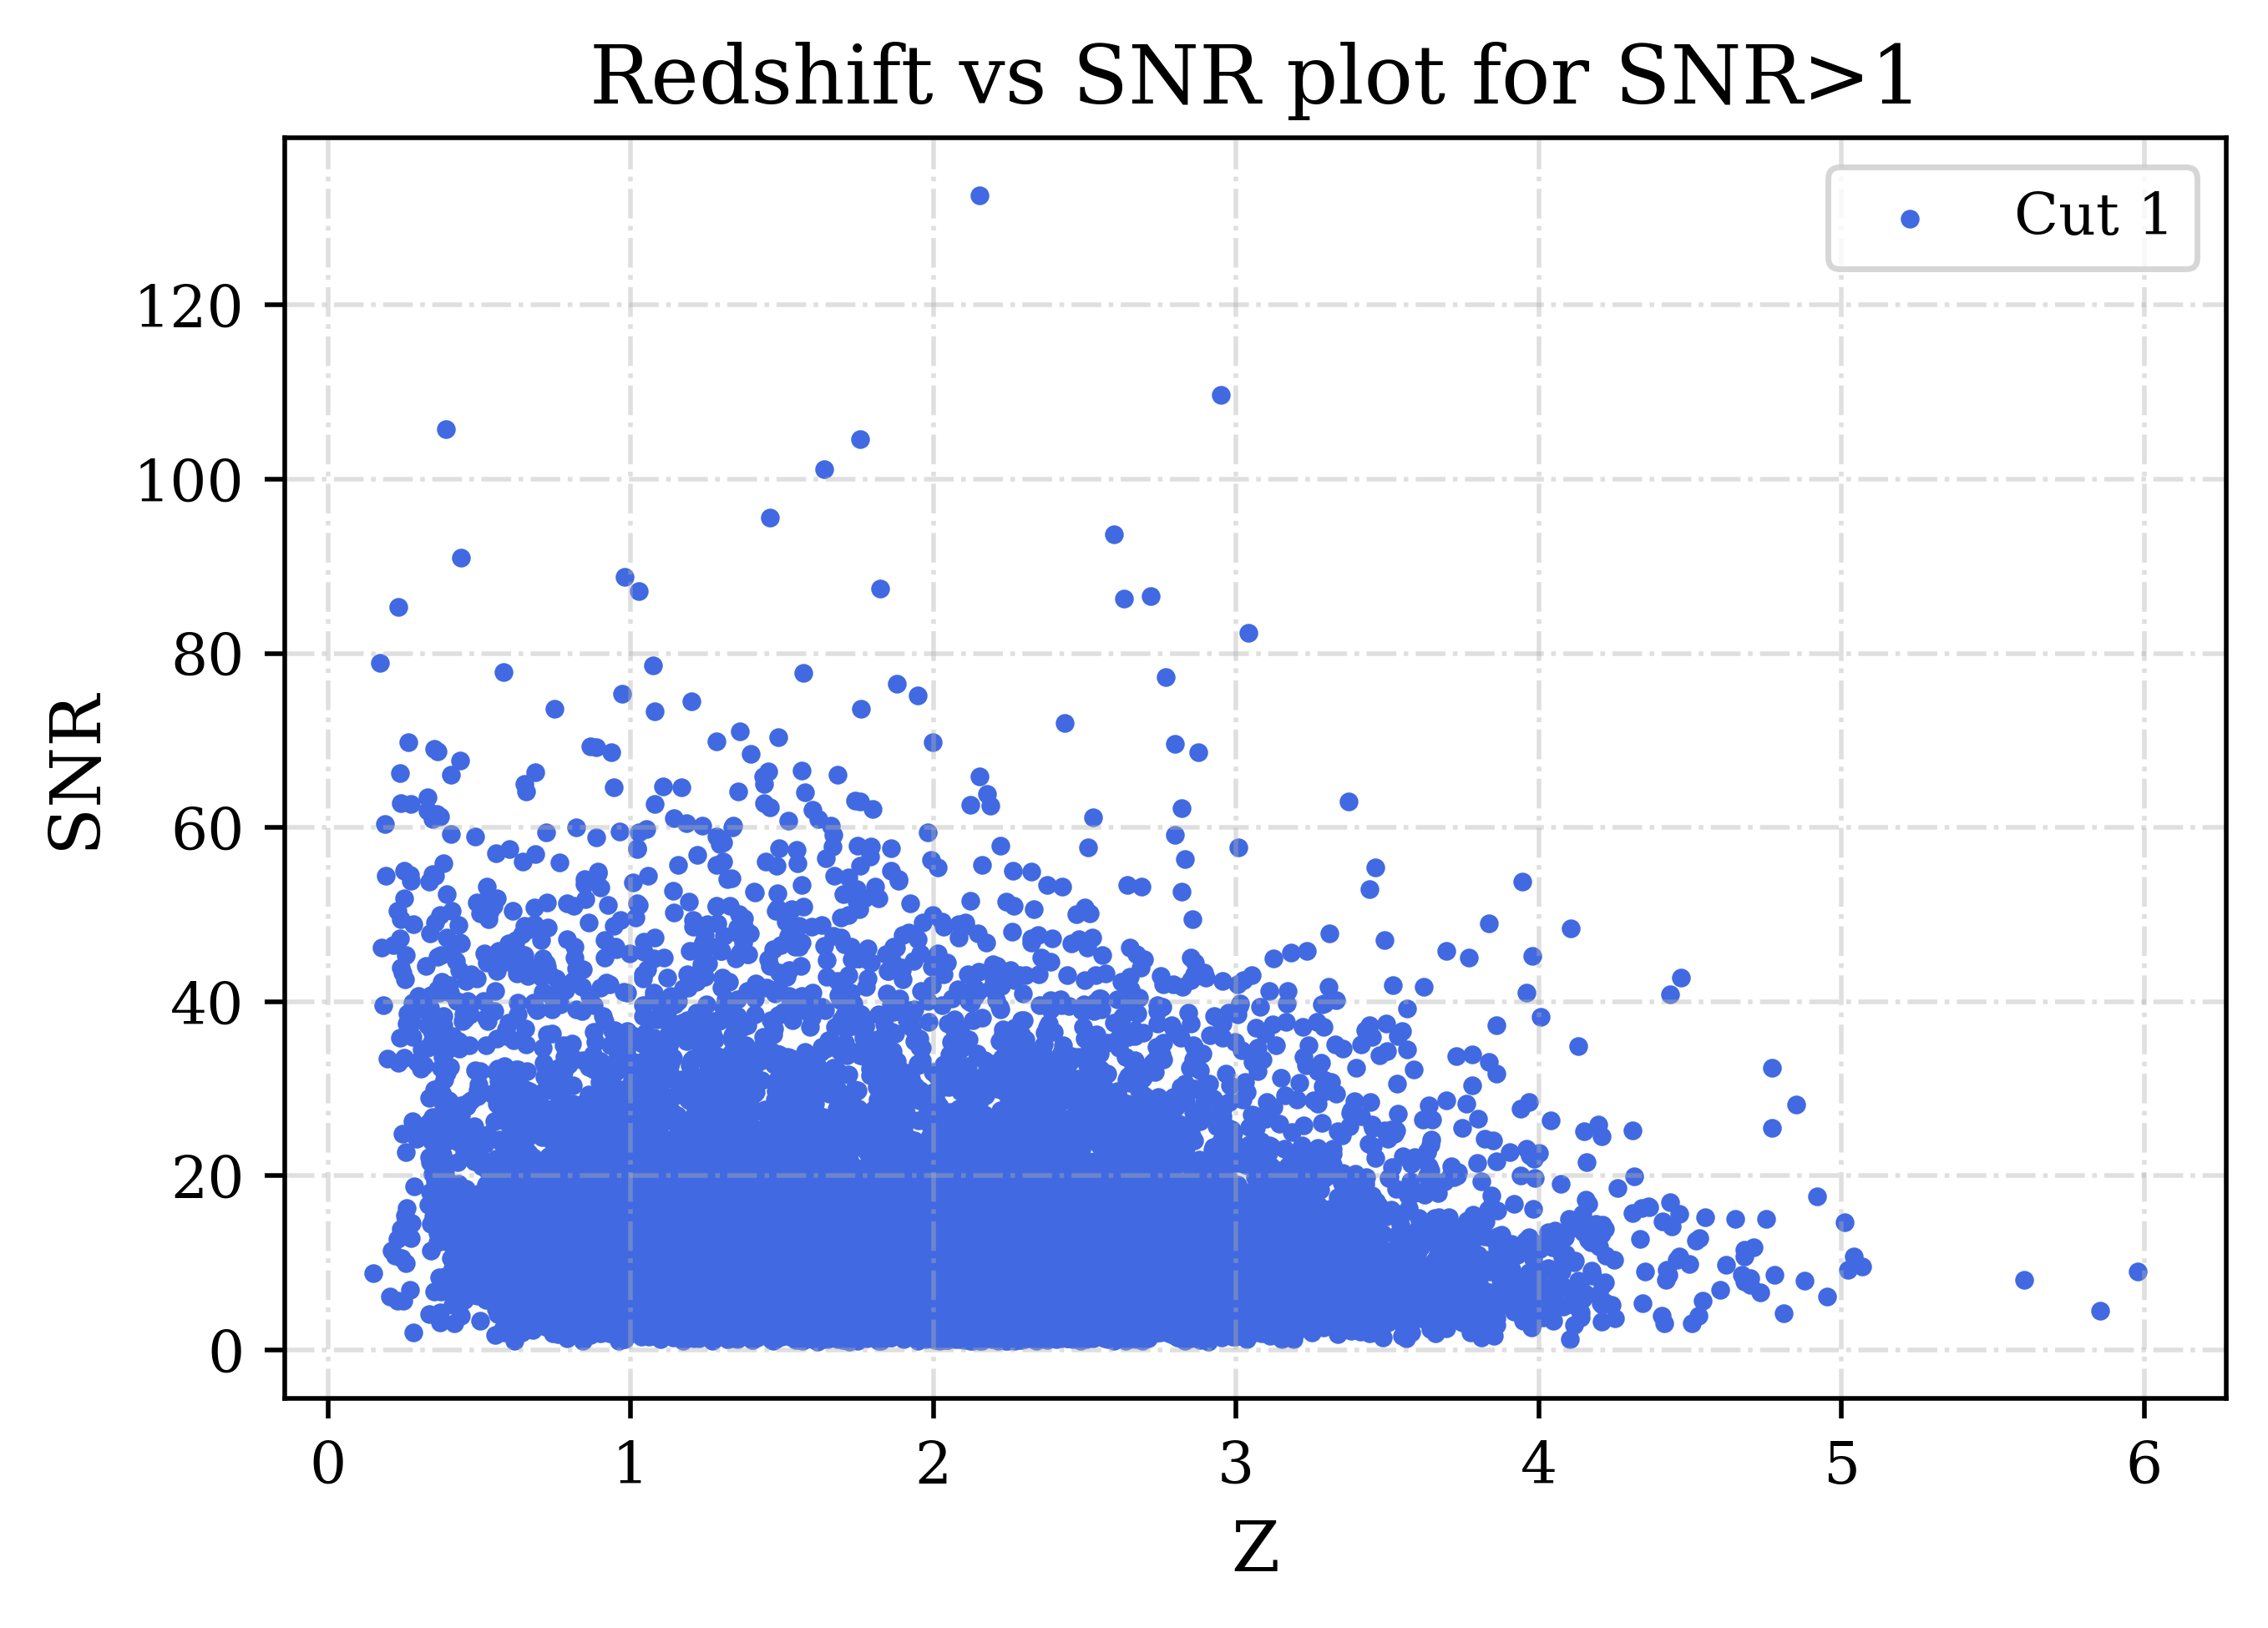

In [112]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Redshift vs SNR plot for SNR>1',fontsize=14)
plt.xlabel(r'Z',fontsize=12)
plt.ylabel(r'SNR',fontsize=12)
plt.scatter(h_masked['Z'],h_masked['SNR_LYA'], color='royalblue', s=5, label='Cut 1')

plt.legend();
plt.show()

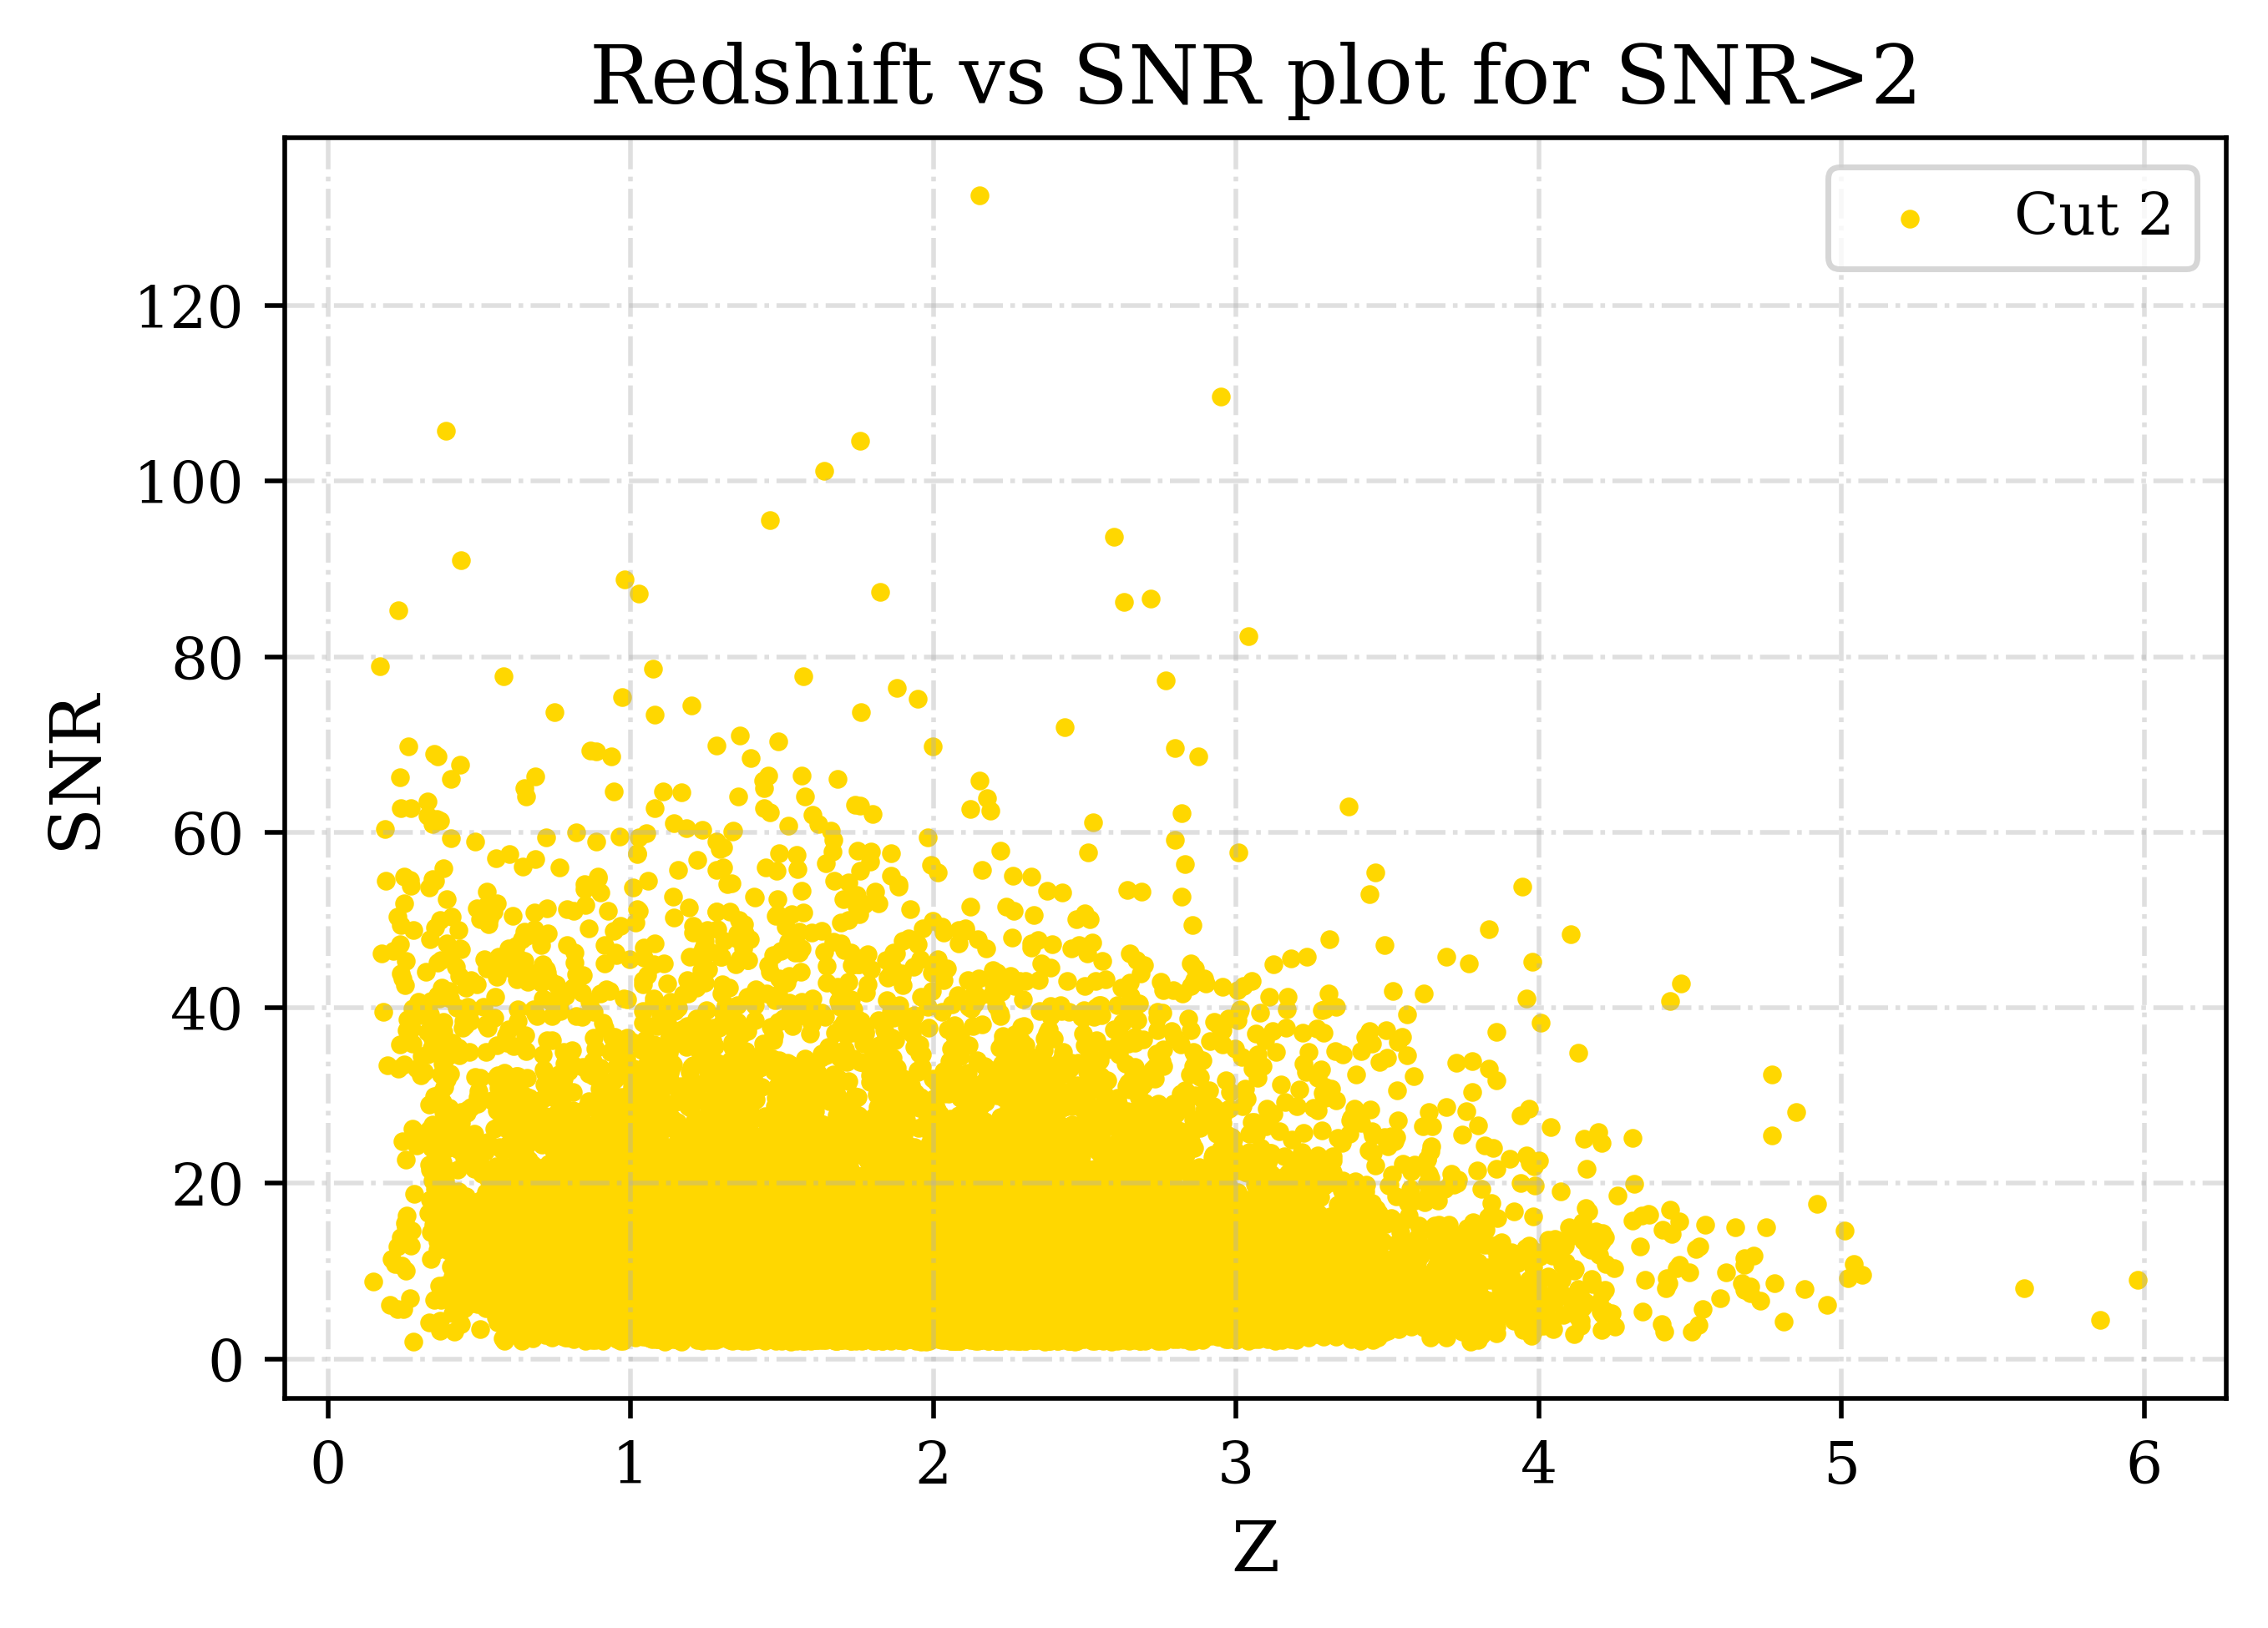

In [114]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Redshift vs SNR plot for SNR>2',fontsize=14)
plt.xlabel(r'Z',fontsize=12)
plt.ylabel(r'SNR',fontsize=12)
plt.scatter(h_masked2['Z'],h_masked2['SNR_LYA'], color='gold', s=5, label='Cut 2')

plt.legend();
plt.show()

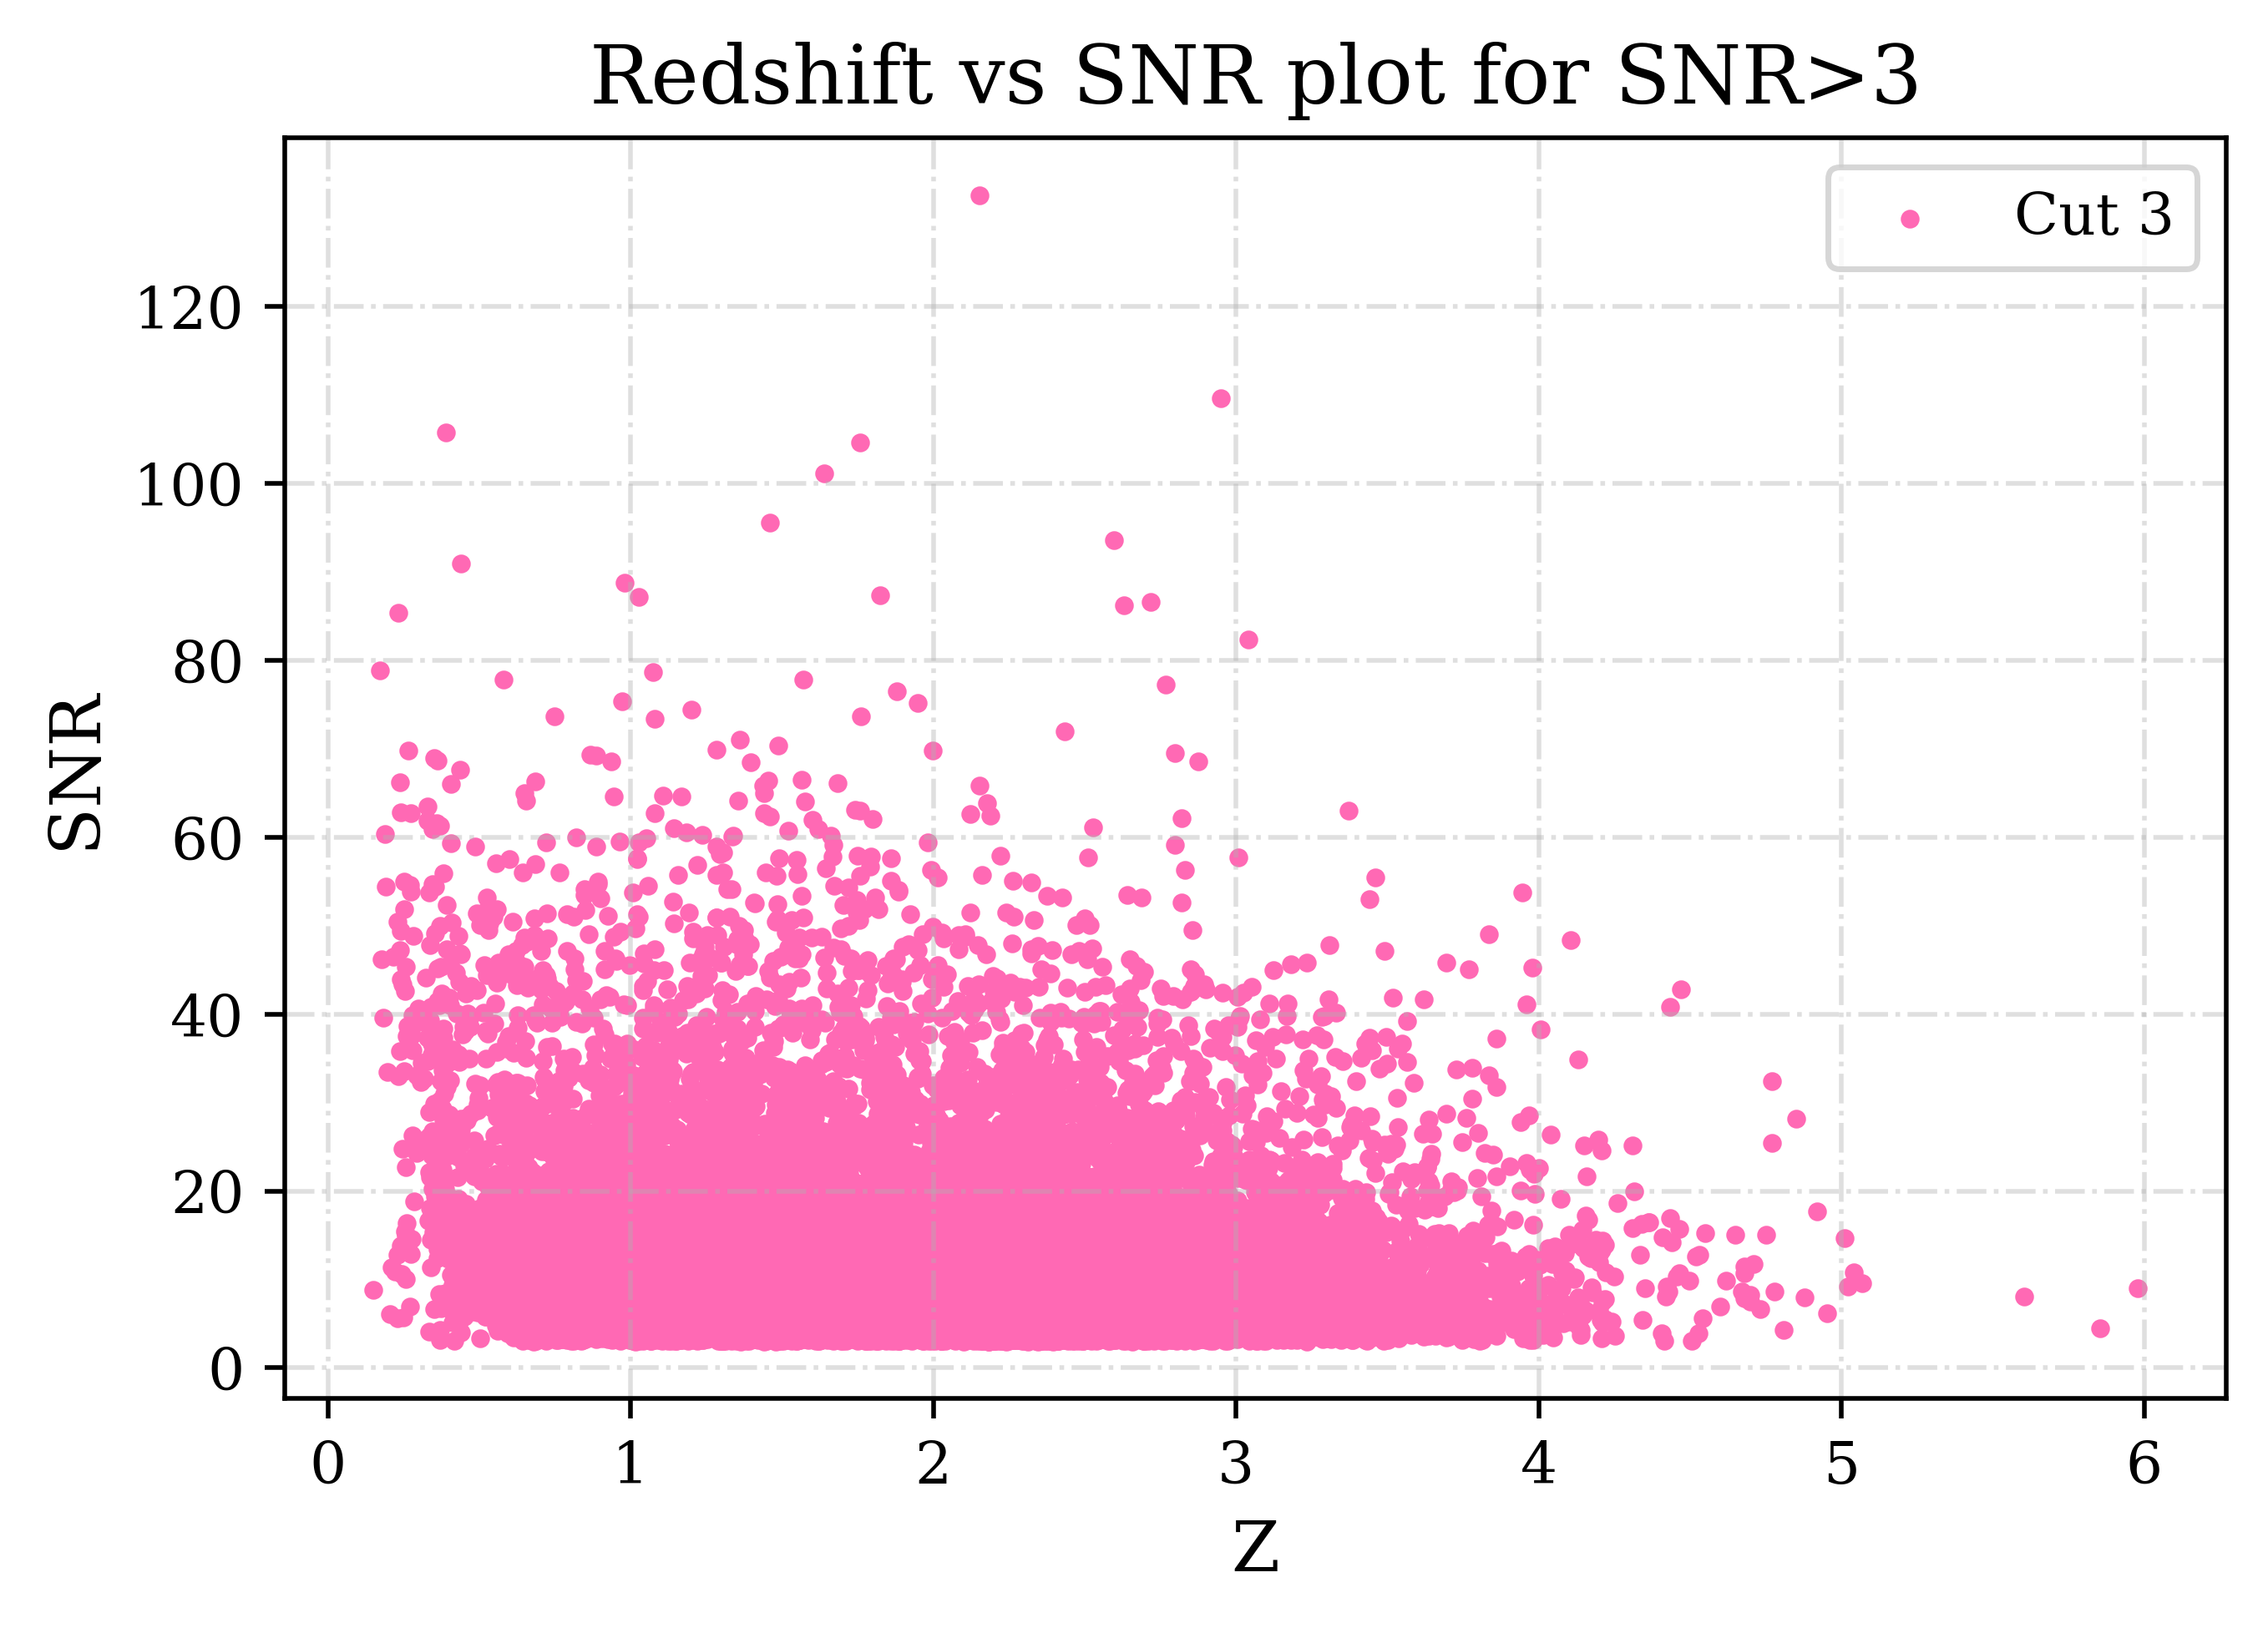

In [115]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Redshift vs SNR plot for SNR>3',fontsize=14)
plt.xlabel(r'Z',fontsize=12)
plt.ylabel(r'SNR',fontsize=12)
plt.scatter(h_masked3['Z'],h_masked3['SNR_LYA'], color='hotpink', s=5, label='Cut 3')

plt.legend();
plt.show()

#### Inside the delta files:

In [41]:
fname='/global/u1/i/ineslie/myhack/Delta_LYA/Delta/'+'delta-89.fits.gz'
fits_read=fits.open(fname)

plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'$\lambda$ vs $\delta$ for one Delta file',fontsize=14)
plt.xlabel(r'RA',fontsize=12)
plt.ylabel(r'DEC',fontsize=12)
plt.scatter(RA,DEC, color='teal', s=5, label='Stripe 82')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

In [123]:
Table(fits_read[1].data)

<Table length=204>
      LOGLAM              DELTA               WEIGHT              CONT       
     float64             float64             float64            float64      
------------------ -------------------- ------------------ ------------------
 3.607602500767287  0.13937693144285412 15.059304912724707  2.868093801566568
3.6079025007672874  -0.5525150327665773 15.506243848773142   2.77537744625248
 3.608202500767287   -0.814184475854713 15.650697384976832 2.7132586885155727
3.6085025007672873  -0.3714415748247556 15.382260050393043  2.694587211689605
3.6088025007672875   0.4610392046648737 14.654198910861535  2.629414940726167
3.6091025007672872  0.18345517331794214  14.29041818672644 2.5578604272973715
3.6094025007672874  0.38203971490547484 13.084833679977619  2.543297601306877
 3.609702500767287  0.39108569641895885 13.136014431038886  2.517123110249974
3.6100025007672873  0.27243476946306133 13.308171827388366 2.4620865219400803
 3.610302500767287 0.025416711590511287 13.042719194653161  2.420318725532463
               ...                  ...                ...                ...
 3.666702500767287 0.018849399769909736 10.173613318363008  2.688514490909171
3.6670025007672873  -0.2983528576247031 10.213786843617877 2.7480975835980432
3.6673025007672875  0.19000574237632395 10.198175417471873 2.8127026231977297
 3.667602500767287  0.13809390581722147 10.199846816850316 2.8682303677648697
3.6679025007672874 0.039651765161596186 10.190646758055463 2.9183907549995443
 3.668202500767287  -0.0792953751004708 10.221358067180349 2.9830594554931276
3.6685025007672873    0.278562433429256 10.194804284485278  3.052469292915986
 3.668802500767287  0.47678671494582536  10.17909215571642 3.1262894020347574
3.6691025007672873   0.4921707008097751  10.19714639678037 3.2214585333559587
3.6694025007672875   0.5128650292249313 10.206274929375924 3.3039205817621586

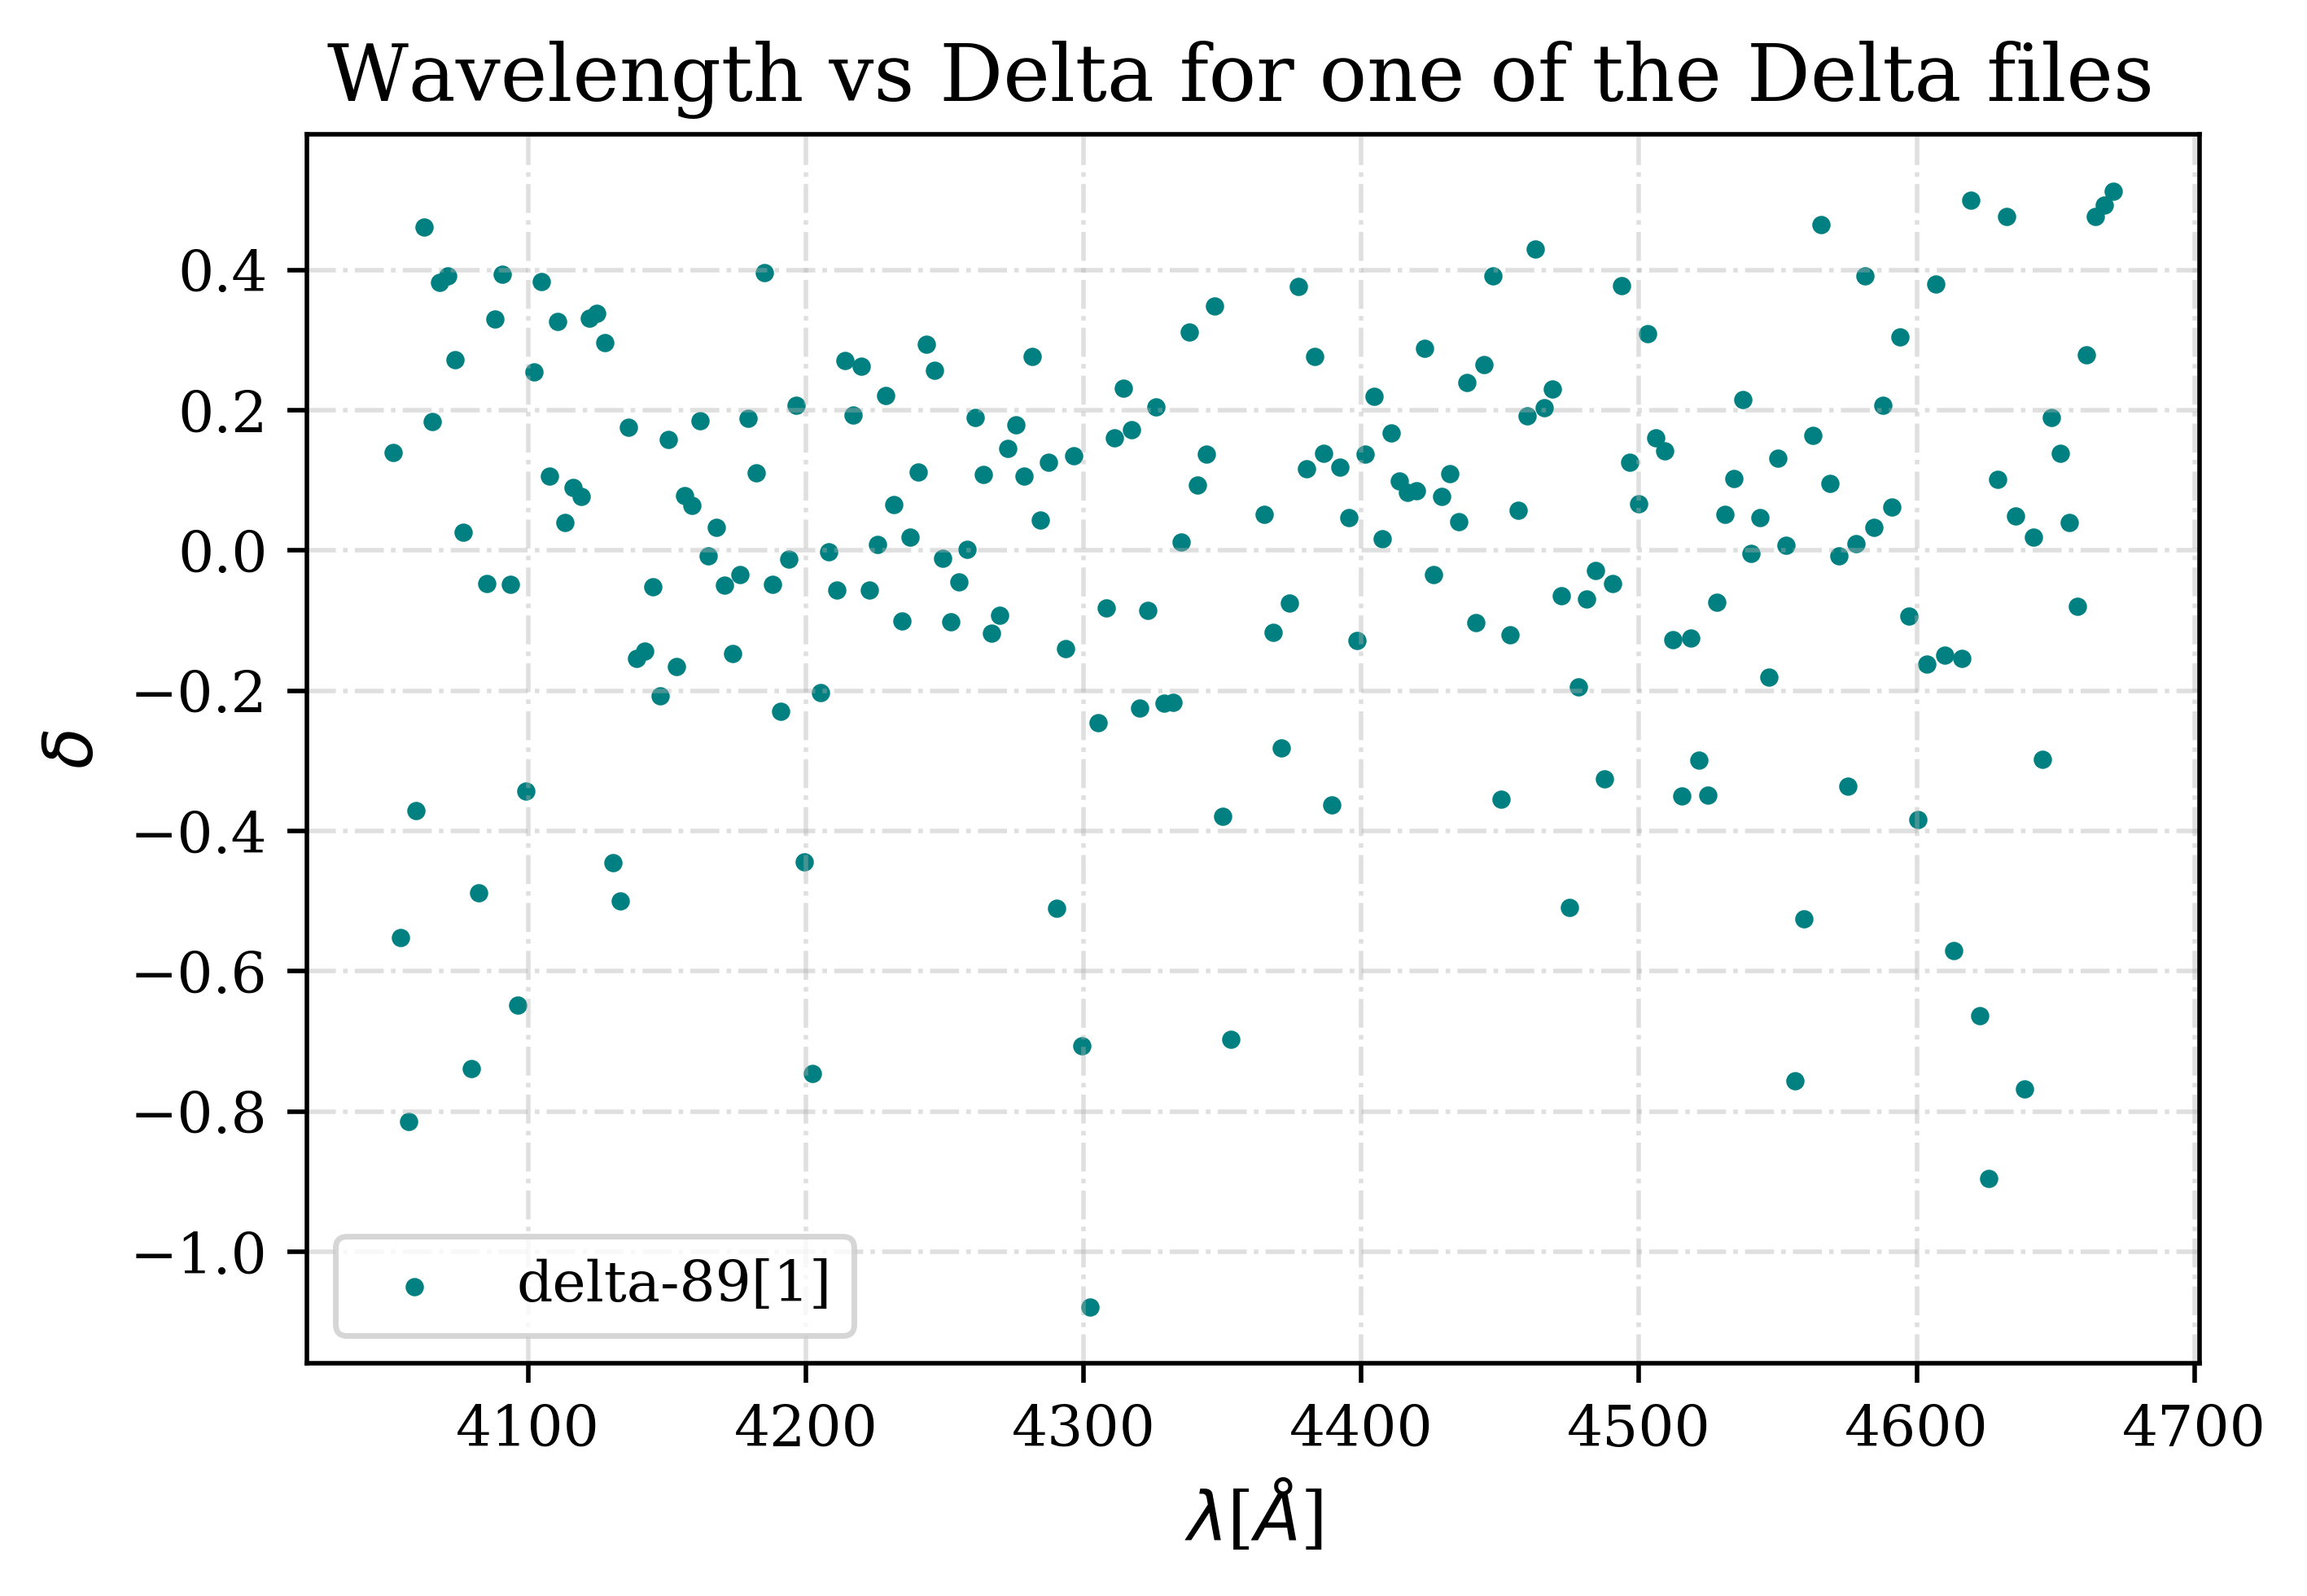

In [43]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Wavelength vs Delta for one of the Delta files ',fontsize=14)
plt.xlabel(r'$\lambda$[${\AA}$]',fontsize=12)
plt.ylabel(r'$\delta$',fontsize=12)
plt.scatter(10**fits_read[1].data['LOGLAM'],fits_read[1].data['DELTA'], color='teal', s=5, label='delta-89[1]')
#props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
#plt.text(0.55,20 , '$H_{0}=$'+str(H_0*1e6)+'$\, km/sMpc$', bbox=props, fontsize=6)
plt.legend();
plt.show()

$$\delta=\frac{F(\lambda)}{\bar{F}}-1$$

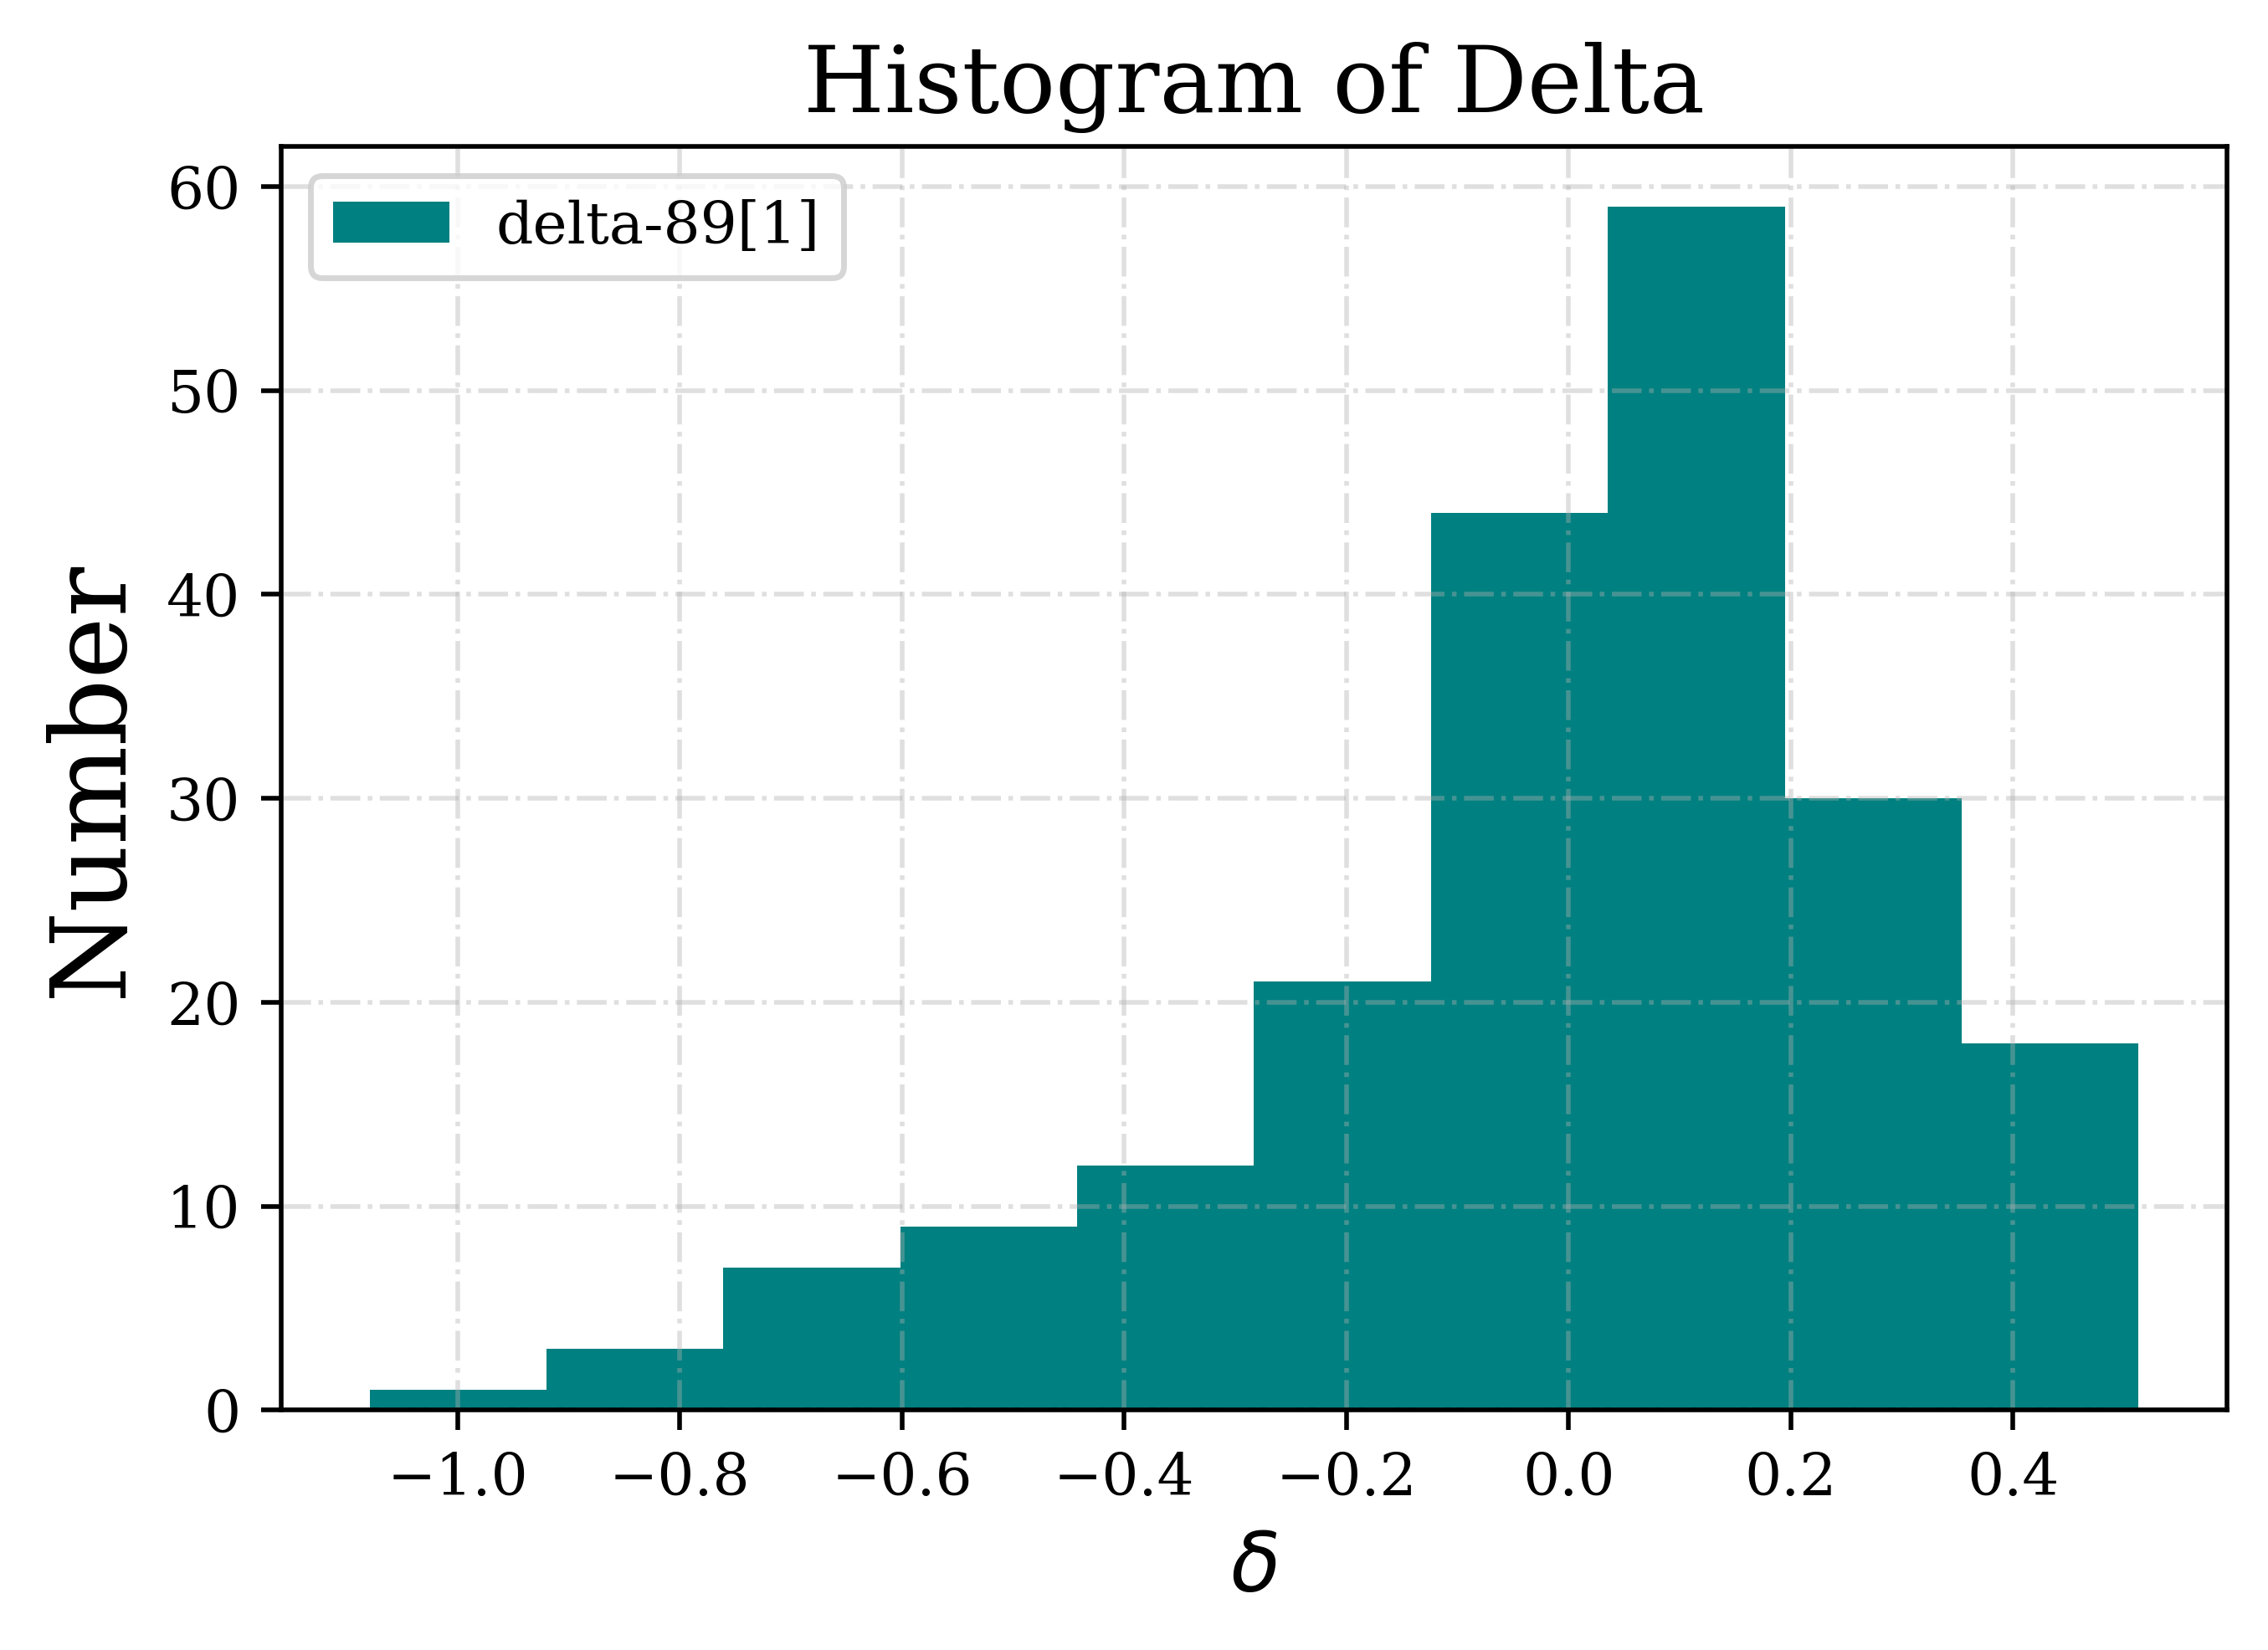

In [44]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Delta',fontsize=16)
plt.xlabel(r'$\delta$',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(fits_read[1].data['DELTA'], color='teal',label='delta-89[1]')
plt.legend();
plt.show()

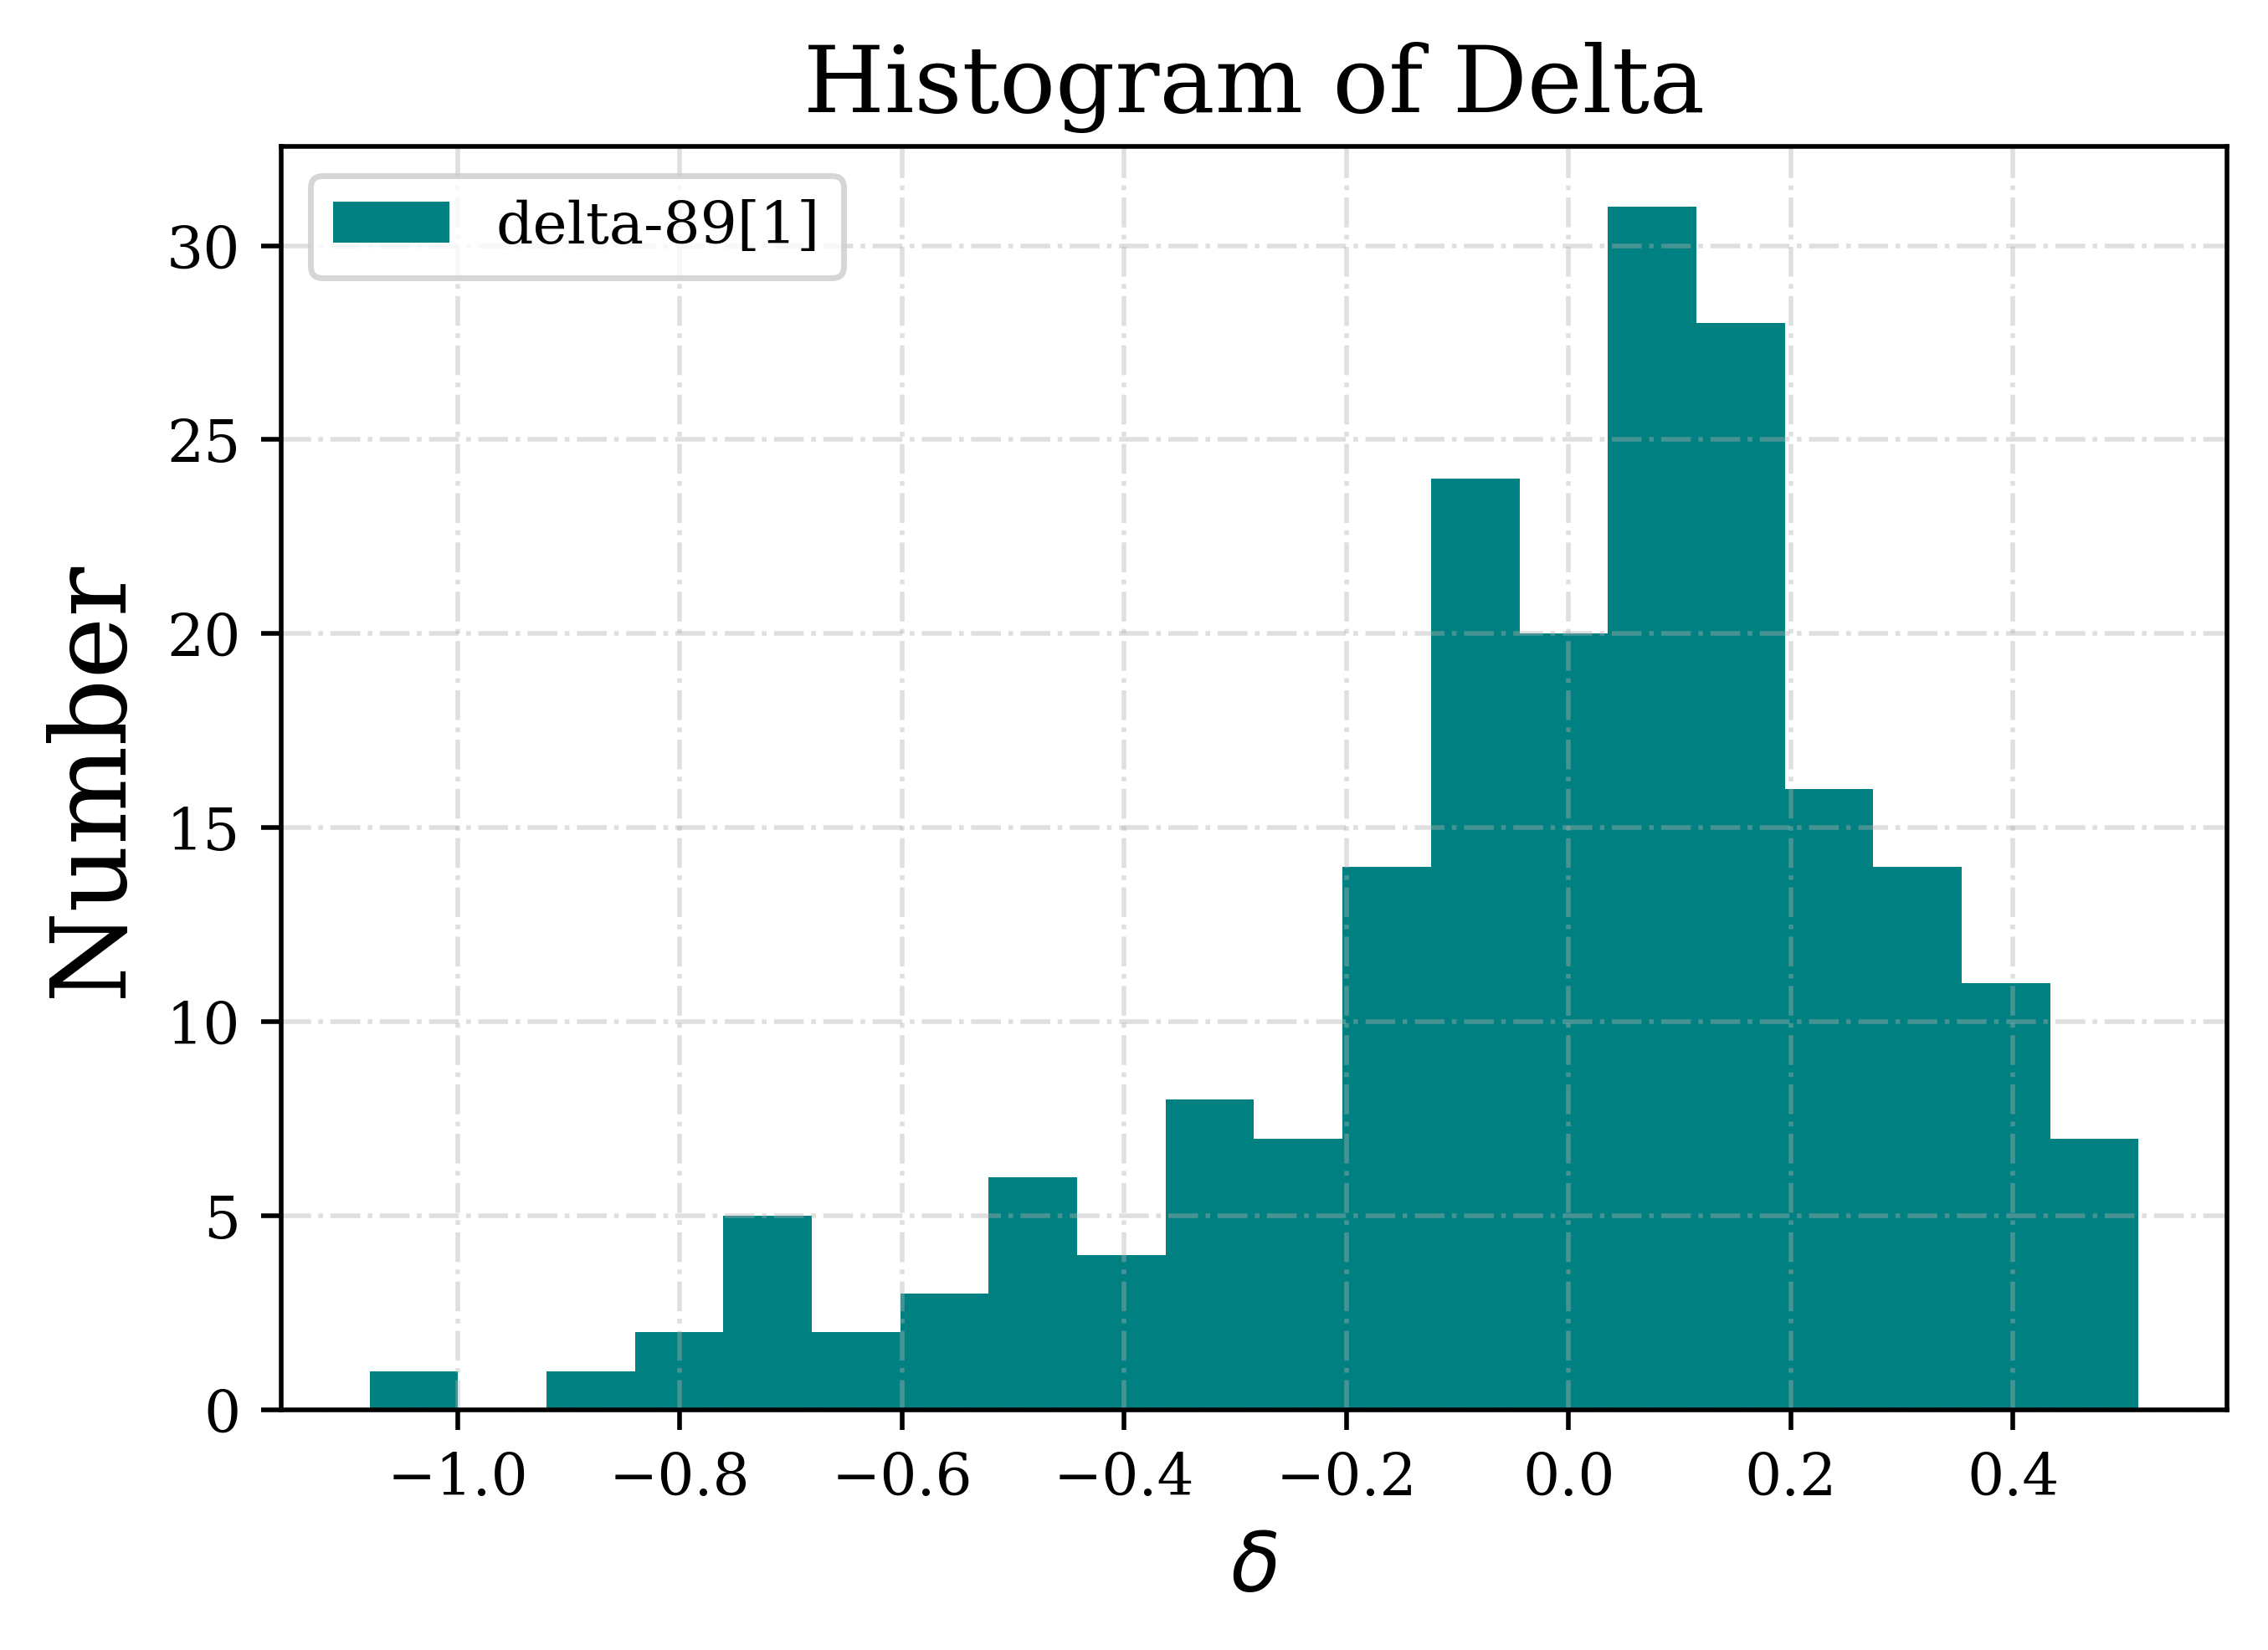

In [45]:
plt.figure()
%matplotlib inline
dpi=500   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram of Delta',fontsize=16)
plt.xlabel(r'$\delta$',fontsize=14)
plt.ylabel(r'Number',fontsize=18)

plt.hist(fits_read[1].data['DELTA'], color='teal',label='delta-89[1]', bins=20)
plt.legend();
plt.show()